# 1) Background

This is our main notebook to train the model and test within our neuromodulated system with goal-driven perception with uncertain goal identity and uncertain goal validity. 

We have modified the PyTorch implementation of EB and c-EB by Sam Greydanus (https://github.com/greydanus/excitationbp/). The code script utils.py in the current directory was modified from his package based on our own network architecture. The two code scripts including *\__*init*\__*.py in the current directory and eb_linear.py in the subdirectory called functions were directly from his package. All the rest code scripts (including load_mnist_data_pair.py, define_model.py, predict_w_cEB.py, train_n_test_model.py, show_cEB_results.py, and regulate_MNIST_pair_uncertainty.py) and two ipython notebook files (including train_n_test_results.ipynb and neuromodulated_goal_driven_perception_results.ipynb) in this entire folder were written completely by us for this project. 

For an in-depth explanation of EB and c-EB, refer to [this paper](https://arxiv.org/abs/1608.00507). Their [original code](https://github.com/jimmie33/Caffe-ExcitationBP) of EB and c-EB is in Caffe.

This ipython notebook was completely written by us, who are anonymous authors of the submitted paper under review.

In [1]:
import torch
import numpy as np
import os, sys, copy ; sys.path.append('..')
from train_n_test_model import train_model
from predict_w_cEB import get_each_ceb_accuracy
from show_cEB_results import print_all_overall_stats, show_cEB_example
from regulate_MNIST_pair_uncertainty import MNIST_uncertainty_task, plot_MNIST_uncertainty, average_probs

reseed = lambda: np.random.seed(seed=1) ; ms = torch.manual_seed(1) # for reproducibility
reseed()

if torch.cuda.is_available():
    useCuda = True
else:
    useCuda = False

print(useCuda)

True


# 2) Train the model

In [2]:
model, dataloader = train_model(total_steps = 4400,test_every = 200,test_pair_num = 2000,toTest = False)


Start to train 4400 steps, each with 256 all-combination pairs.


# 4) Neuromodulated goal-driven perception with uncertainties
Part 4 directly follows Part 2. Part 3, which is independent of Part 4, is in the other ipython notebook file named train_n_test_results.ipynb in the same directory.

In [3]:
ACH_CORRECT=1.20
ACH_INCORRECT=0.85
NE_INCORRECT=1.10
NE_CORRECT=0.85
trialRange=30
trialInterval=400
num_considered=10
num_threshold=8
hasAChLesion=True
hasNELesion=True

## 4.1: Single Valid Cue
Randomly change trial interval within the range (200+/-20) and have a single valid cue for each cue switch, and use one of the validity options: 0.99, 0.85, 0.70

In [4]:
alterValid=False

### 4.1.1: validity_choices=0.99

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
12/4034 = 0.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3149/4034 = 78.1% trials occurred when the predicted digit did not match the cued digit.
    362/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3056/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
873/4034 = 21.6% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


/home/xinyunz5/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


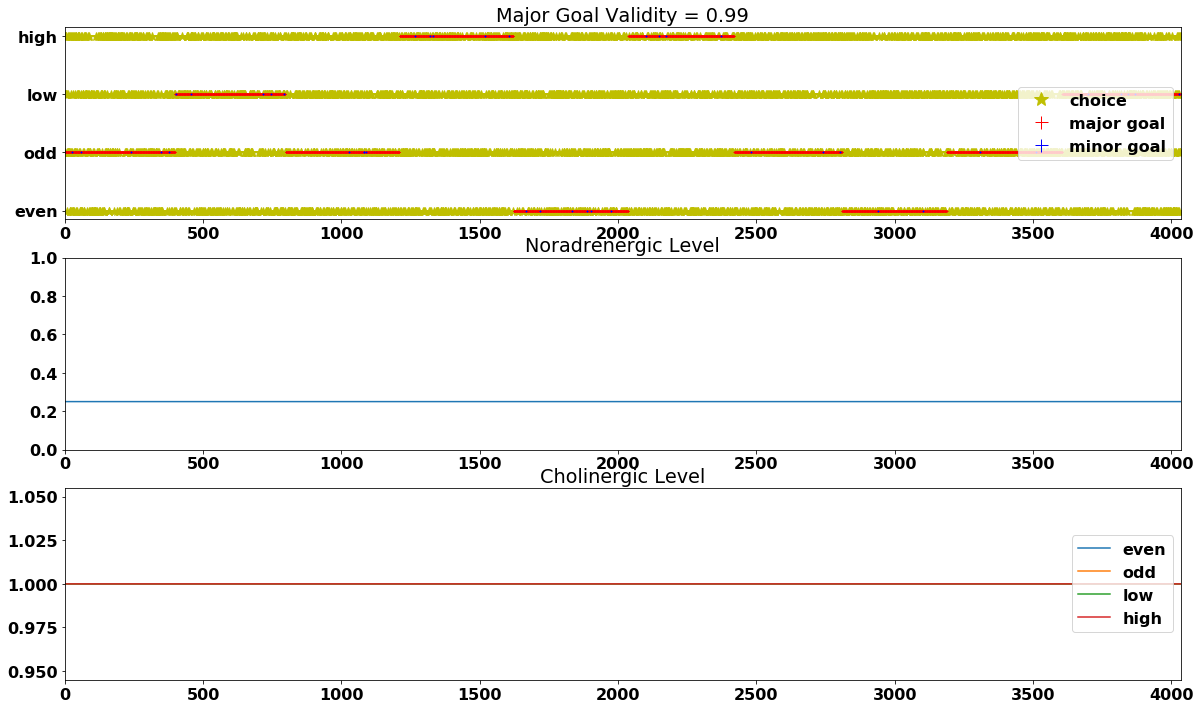

In [5]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_cues=np.array([1,2,1,3,0,3,1,0,1,2]),hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
5/4034 = 0.1% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3107/4034 = 77.0% trials occurred when the predicted digit did not match the cued digit.
    365/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3015/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
922/4034 = 22.9% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 254 389 377 417 427], and mean of lag length (excluding consistently same cue) is 389.6


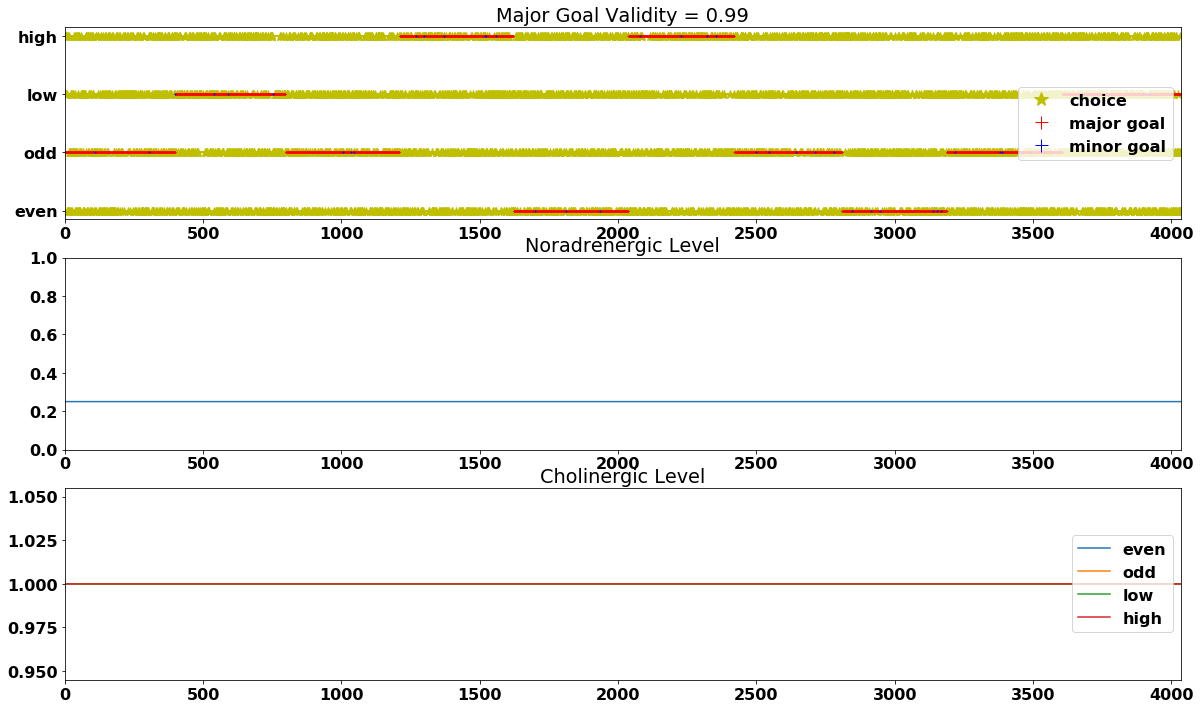

In [6]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
9/4034 = 0.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3152/4034 = 78.1% trials occurred when the predicted digit did not match the cued digit.
    382/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3056/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
873/4034 = 21.6% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


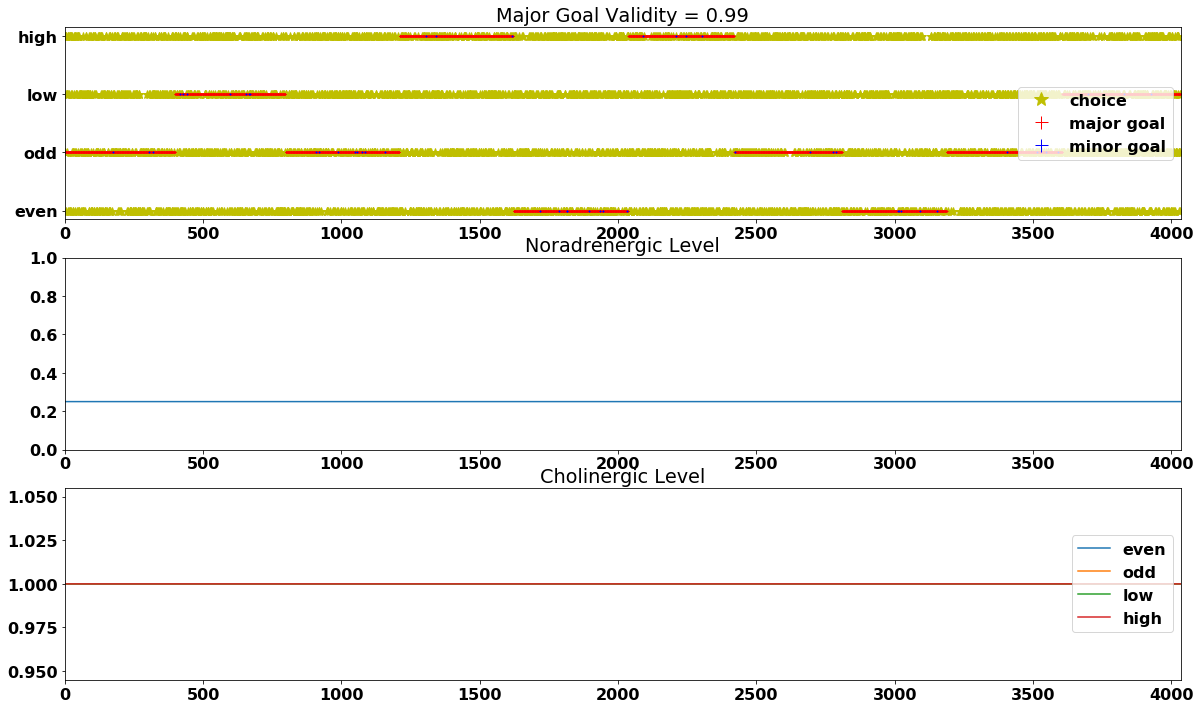

In [7]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
7/4034 = 0.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3083/4034 = 76.4% trials occurred when the predicted digit did not match the cued digit.
    344/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3005/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
944/4034 = 23.4% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


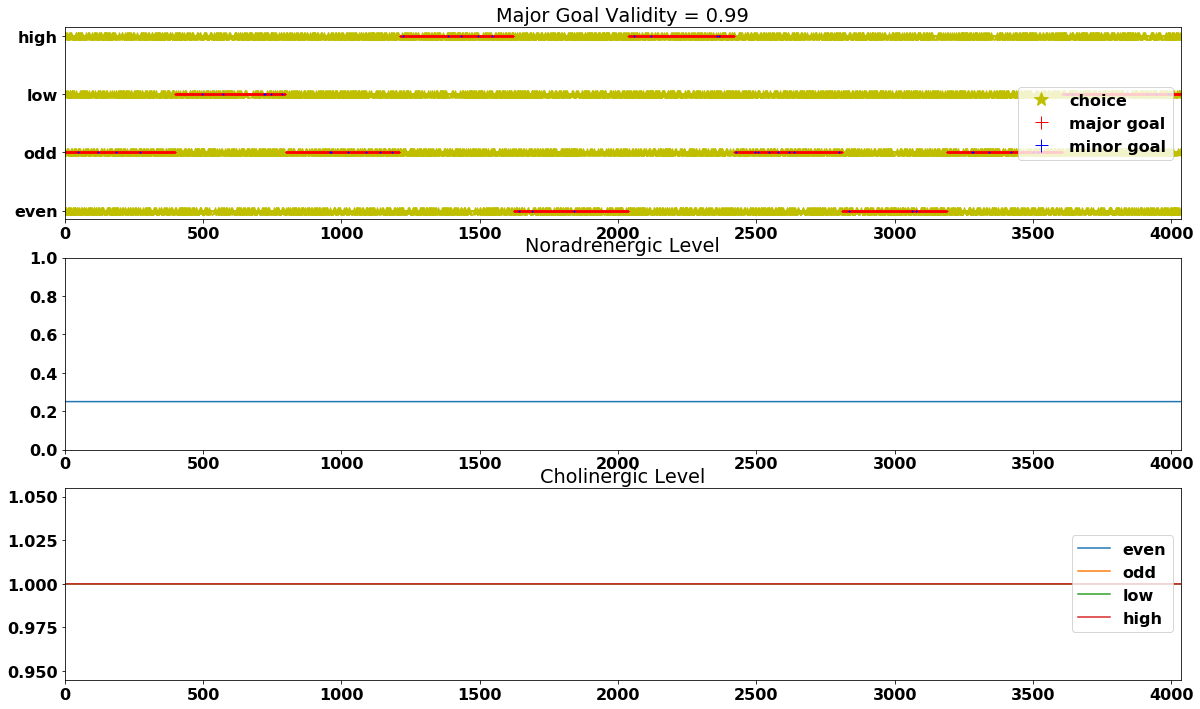

In [8]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
11/4034 = 0.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3044/4034 = 75.5% trials occurred when the predicted digit did not match the cued digit.
    360/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2945/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
979/4034 = 24.3% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 264 377 417 427], and mean of lag length (excluding consistently same cue) is 389.9


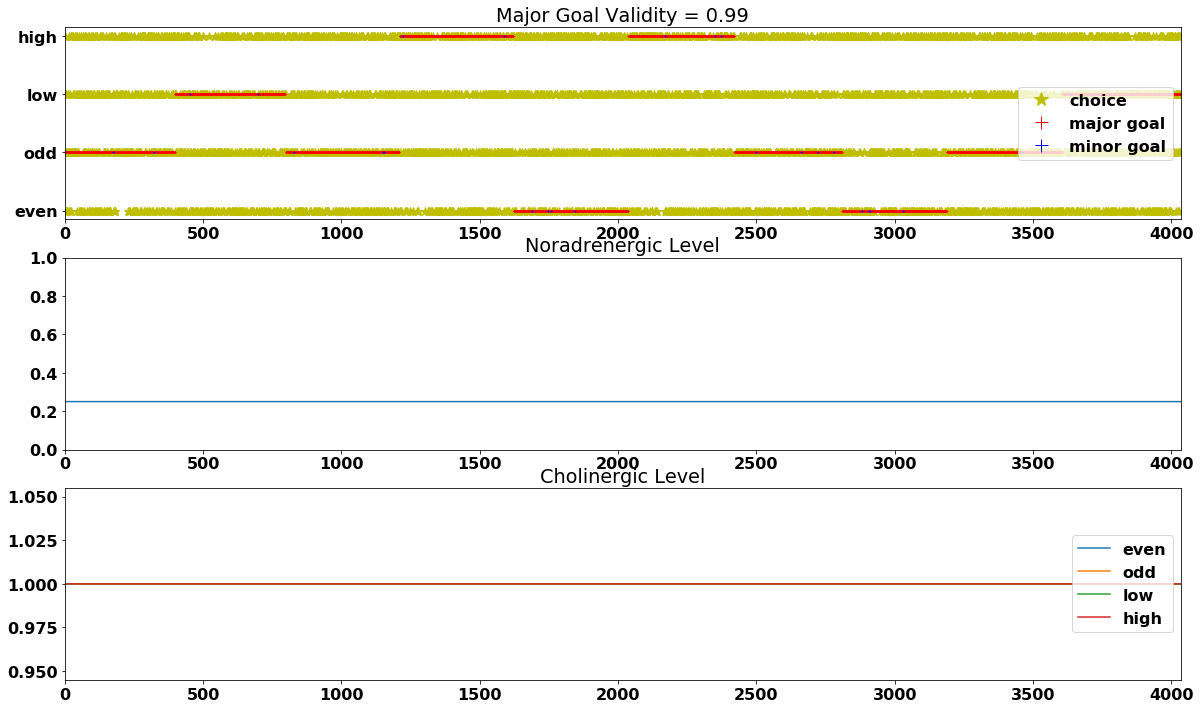

In [9]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
13/4034 = 0.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3087/4034 = 76.5% trials occurred when the predicted digit did not match the cued digit.
    384/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2998/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
934/4034 = 23.2% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


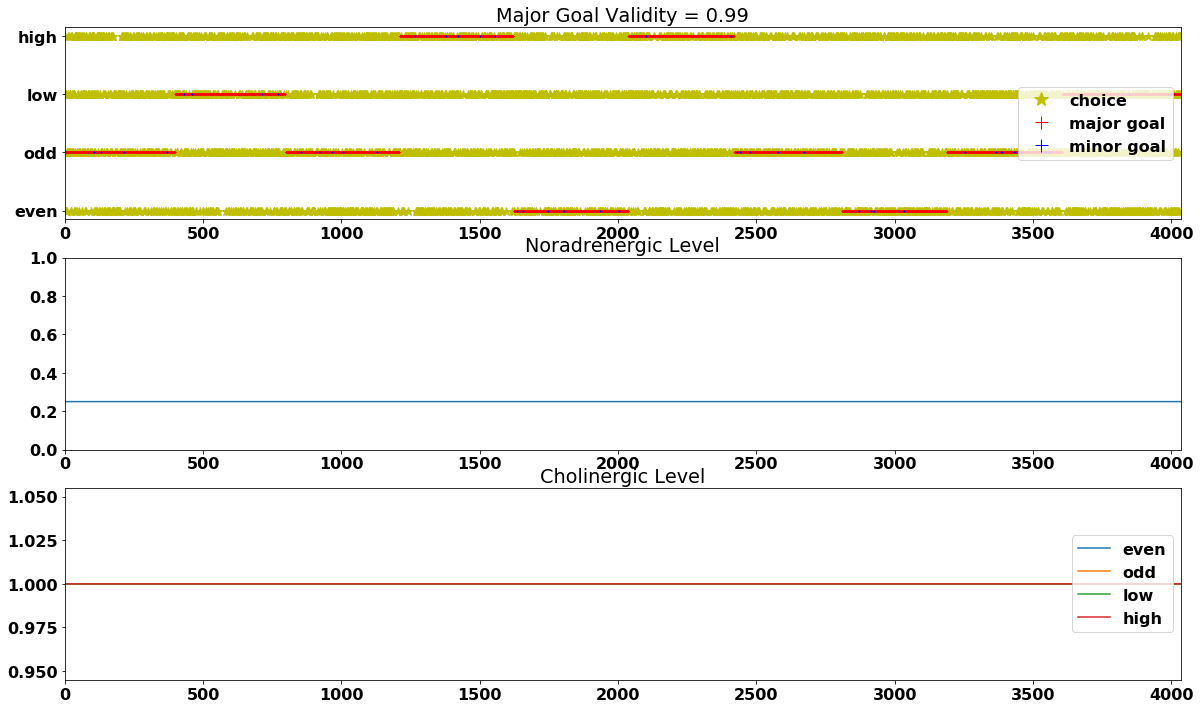

In [10]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
7/4034 = 0.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3116/4034 = 77.2% trials occurred when the predicted digit did not match the cued digit.
    386/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3002/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
911/4034 = 22.6% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411  39 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 364.9


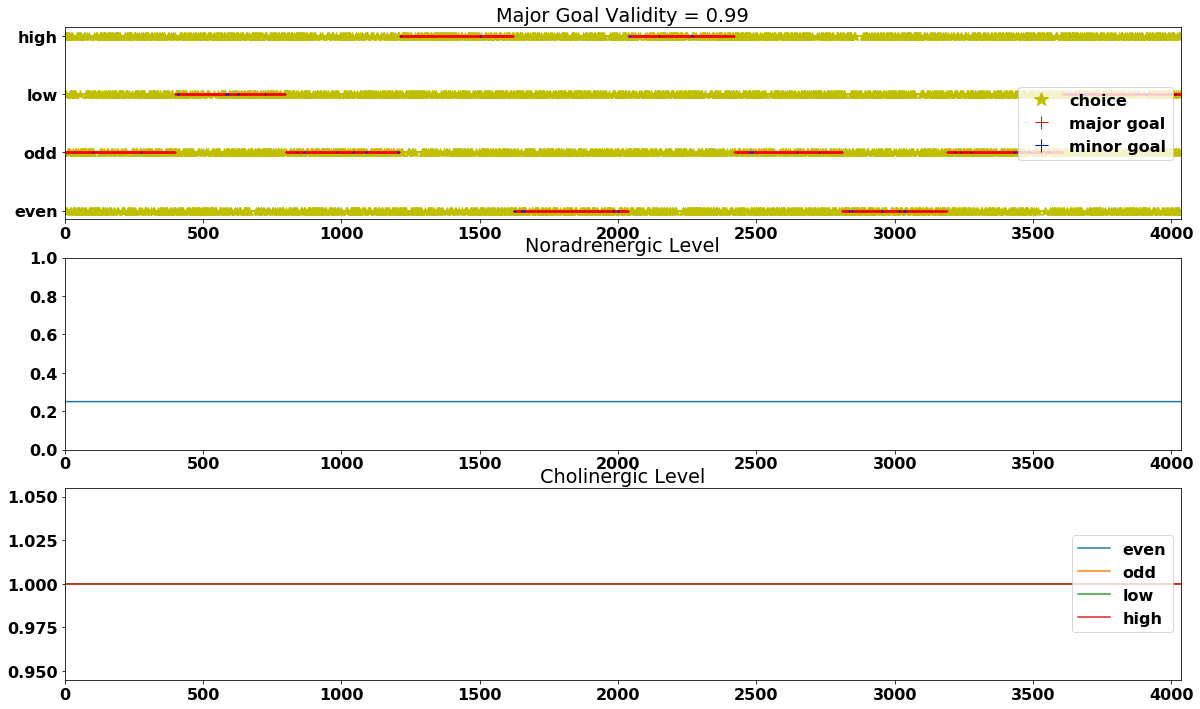

In [11]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
8/4034 = 0.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3105/4034 = 77.0% trials occurred when the predicted digit did not match the cued digit.
    369/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3020/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
921/4034 = 22.8% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 285 414 382 389 377  91 427], and mean of lag length (excluding consistently same cue) is 357.2


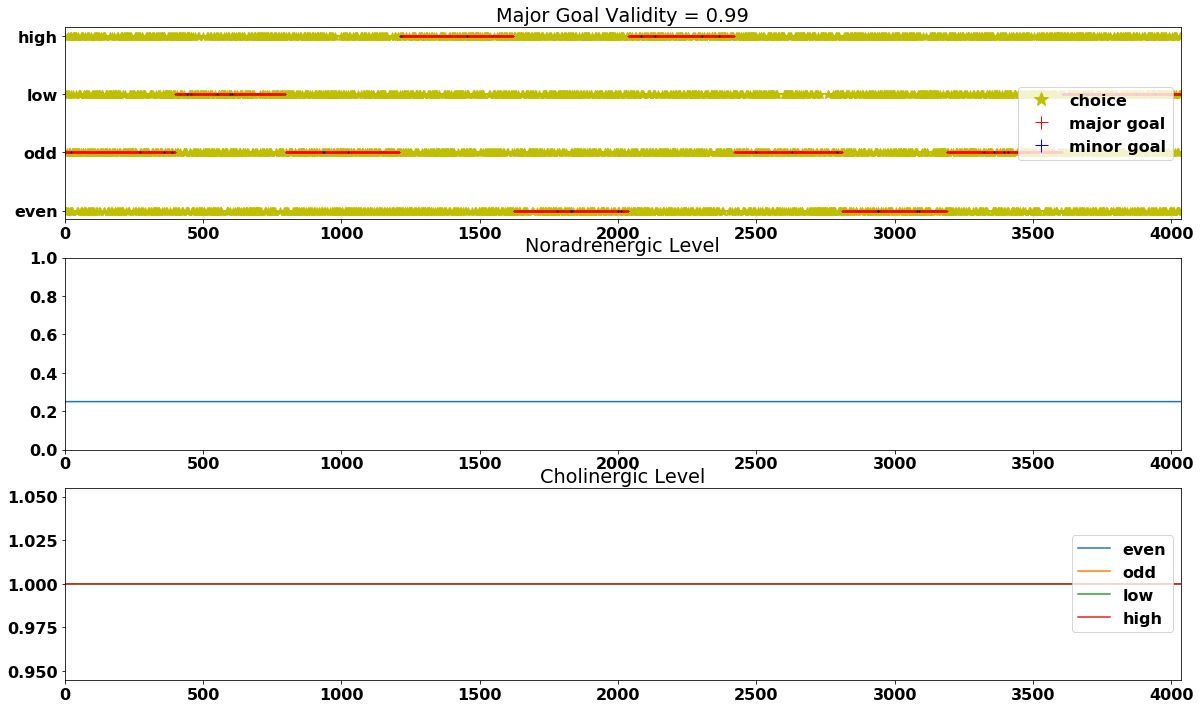

In [12]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
11/4034 = 0.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3154/4034 = 78.2% trials occurred when the predicted digit did not match the cued digit.
    374/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3044/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
869/4034 = 21.5% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 253 414 382 118 377 216 427], and mean of lag length (excluding consistently same cue) is 339.4


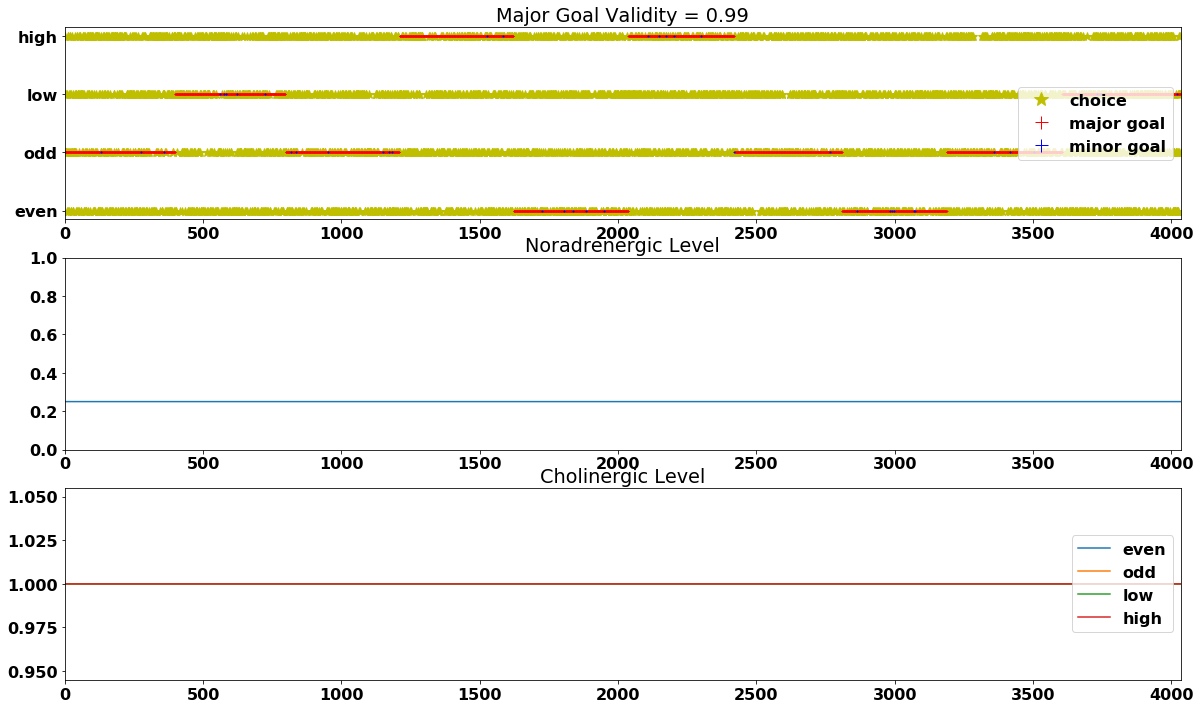

In [13]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
11/4034 = 0.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3096/4034 = 76.7% trials occurred when the predicted digit did not match the cued digit.
    345/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3010/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
927/4034 = 23.0% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


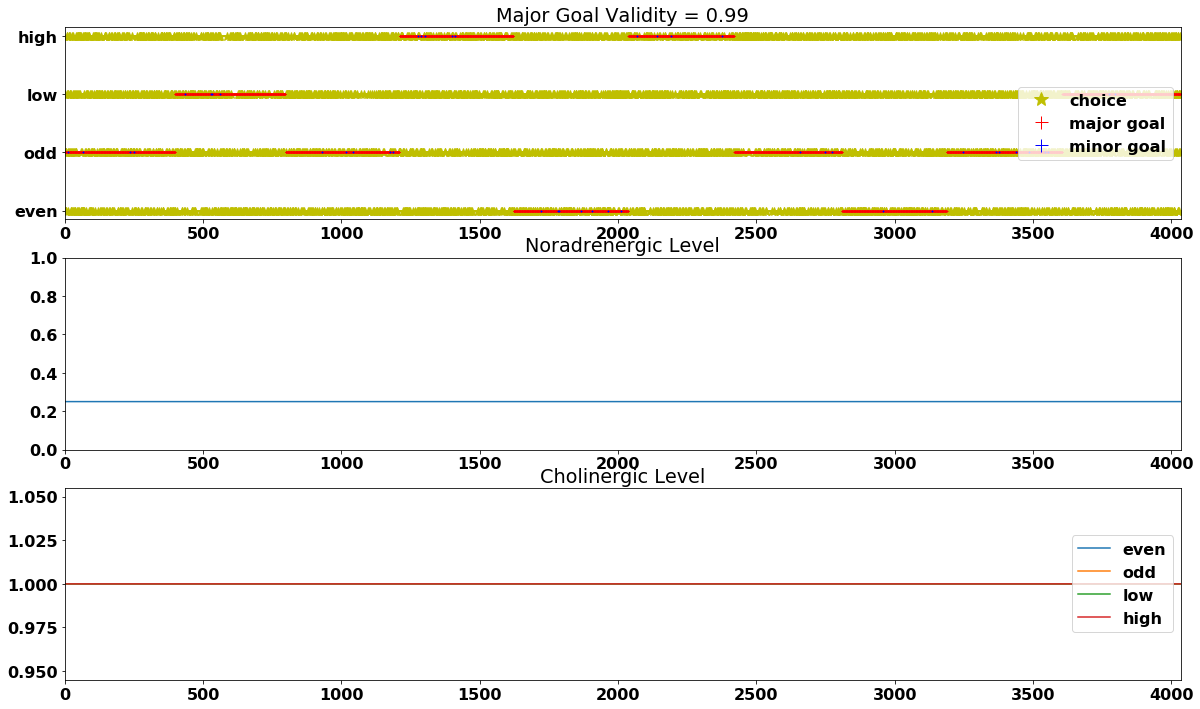

In [14]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [15]:
all_99_case_probs = [all_prob_99_1,all_prob_99_2,all_prob_99_3,all_prob_99_4,all_prob_99_5,\
                     all_prob_99_6,all_prob_99_7,all_prob_99_8,all_prob_99_9,all_prob_99_10]
averages_99 = average_probs(all_99_case_probs)


Average lag length is: 385
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.77077342588002, 0.22689638076351018, 0.0, 0.002330193356470005, 0.7474219137332672, 0.09100148735746158, 0.0]


### 4.1.2: validity_choices=0.85

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
164/4034 = 4.1% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3143/4034 = 77.9% trials occurred when the predicted digit did not match the cued digit.
    373/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3046/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
727/4034 = 18.0% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


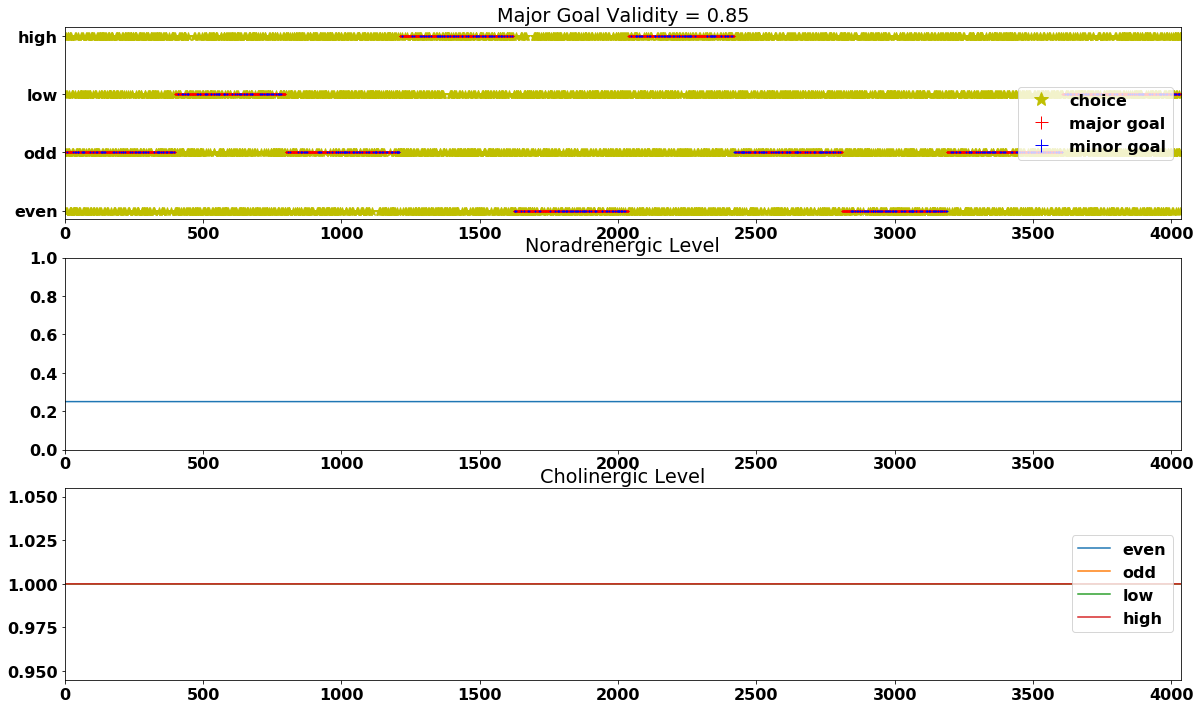

In [16]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
126/4034 = 3.1% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3157/4034 = 78.3% trials occurred when the predicted digit did not match the cued digit.
    366/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3051/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
751/4034 = 18.6% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


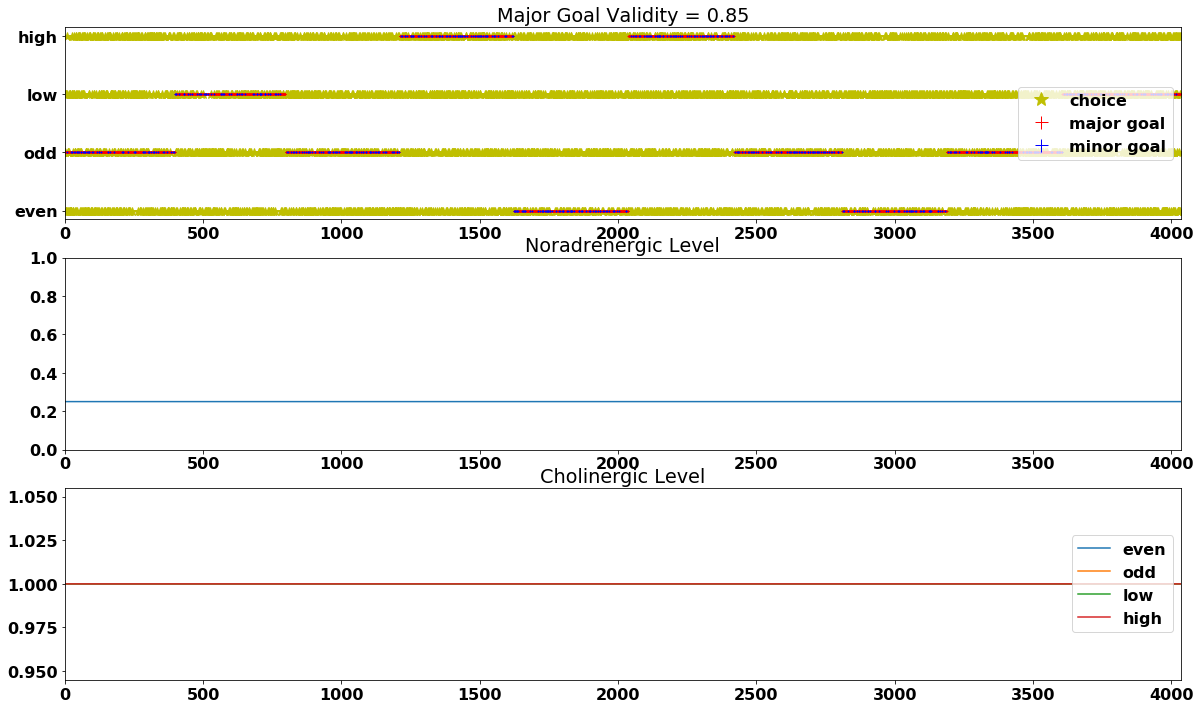

In [17]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
153/4034 = 3.8% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3075/4034 = 76.2% trials occurred when the predicted digit did not match the cued digit.
    338/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2979/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
806/4034 = 20.0% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


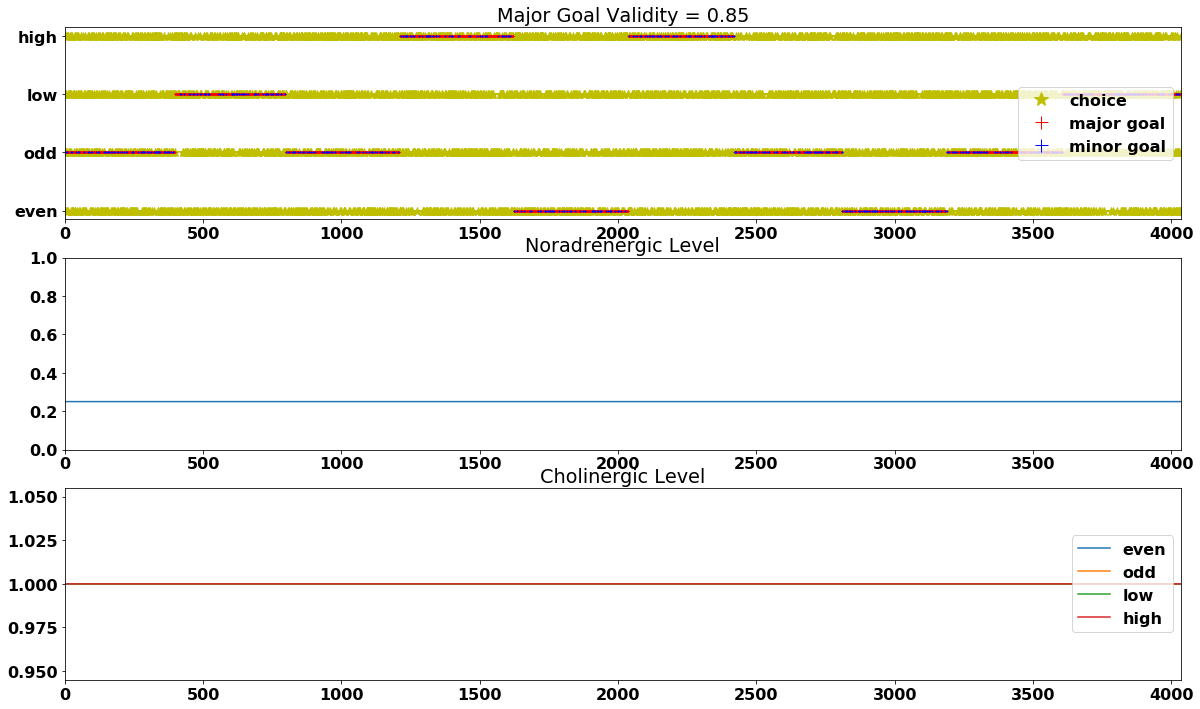

In [18]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
121/4034 = 3.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3146/4034 = 78.0% trials occurred when the predicted digit did not match the cued digit.
    351/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3057/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
767/4034 = 19.0% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


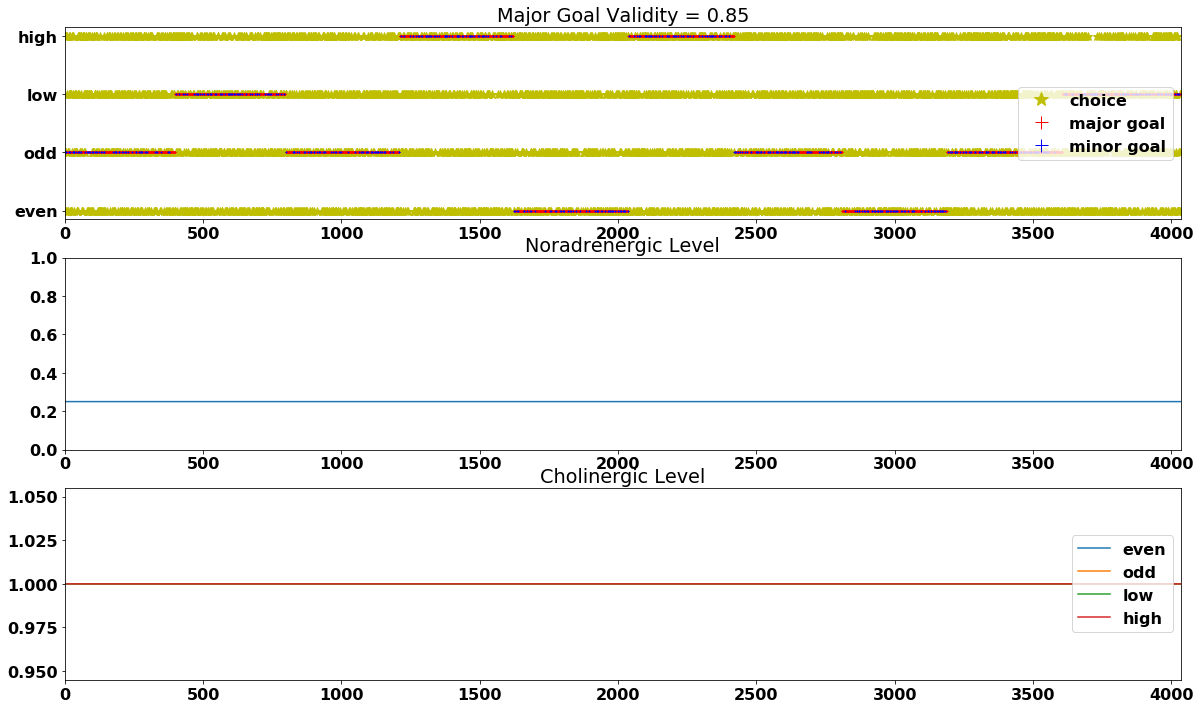

In [19]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
156/4034 = 3.9% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3093/4034 = 76.7% trials occurred when the predicted digit did not match the cued digit.
    356/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3005/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
785/4034 = 19.5% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 265 411 414 382 389 377 417 147], and mean of lag length (excluding consistently same cue) is 359.8


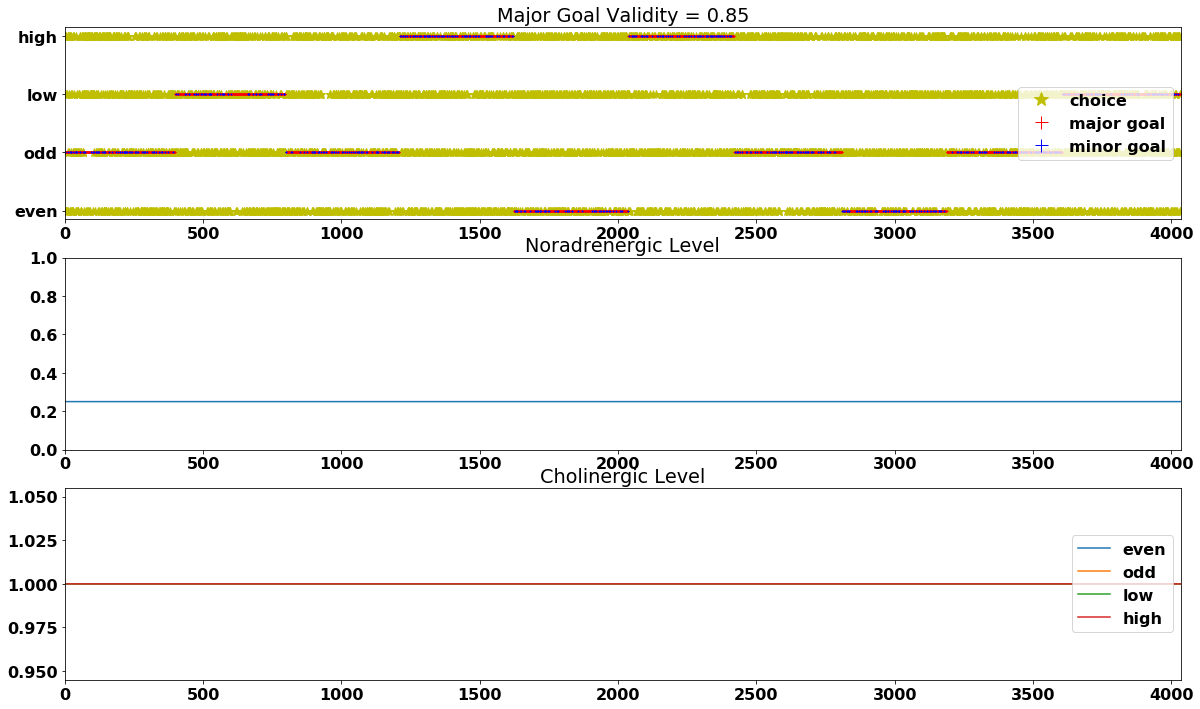

In [20]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
141/4034 = 3.5% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3063/4034 = 75.9% trials occurred when the predicted digit did not match the cued digit.
    373/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2968/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
830/4034 = 20.6% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


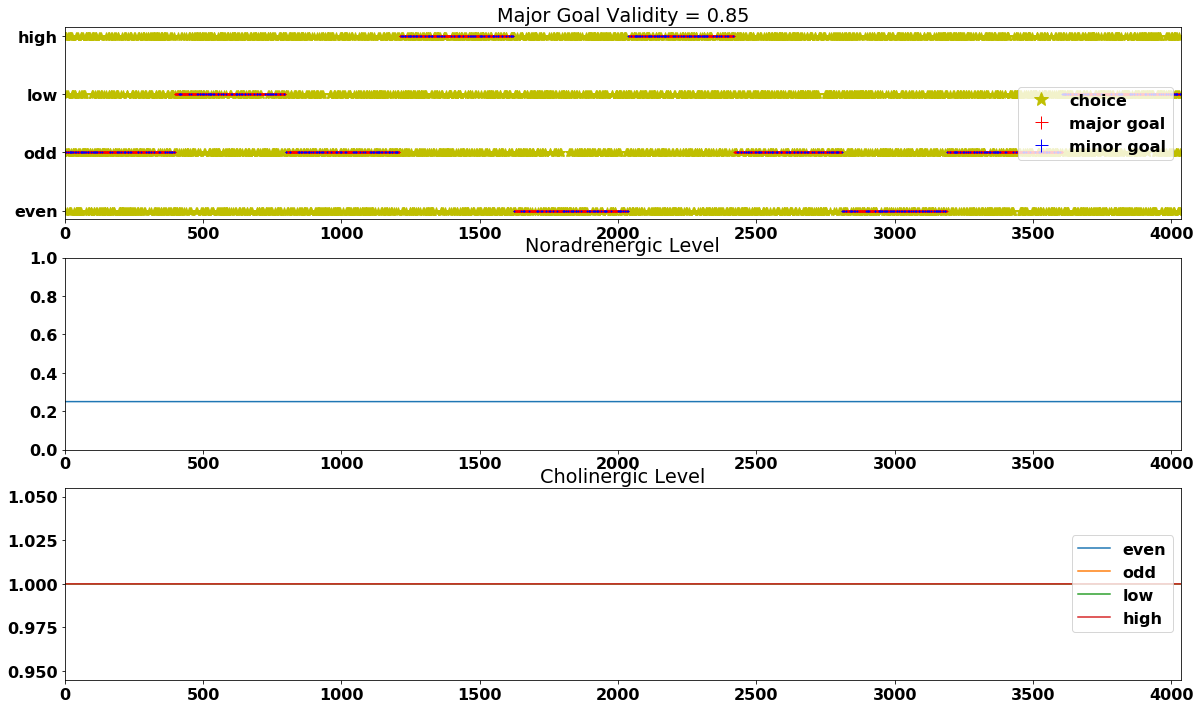

In [21]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
151/4034 = 3.7% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3085/4034 = 76.5% trials occurred when the predicted digit did not match the cued digit.
    361/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2991/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
798/4034 = 19.8% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 375 411  99 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 368.9


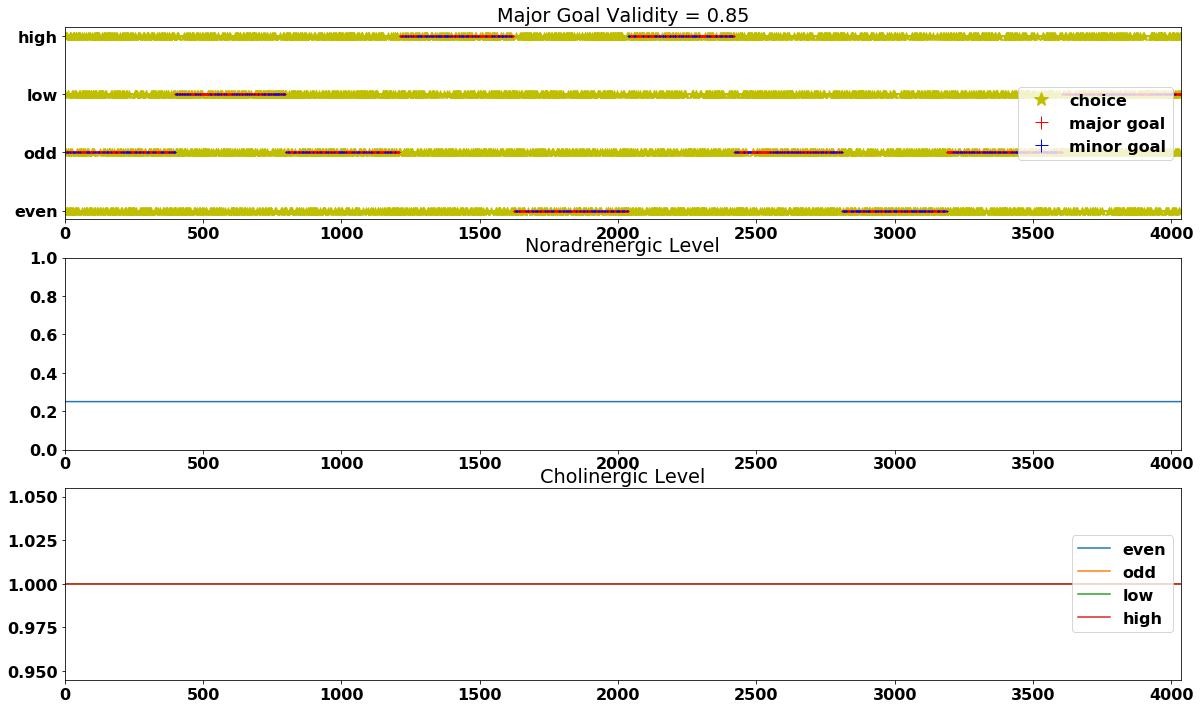

In [22]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
122/4034 = 3.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3152/4034 = 78.1% trials occurred when the predicted digit did not match the cued digit.
    360/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3054/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
760/4034 = 18.8% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417  16], and mean of lag length (excluding consistently same cue) is 361.3


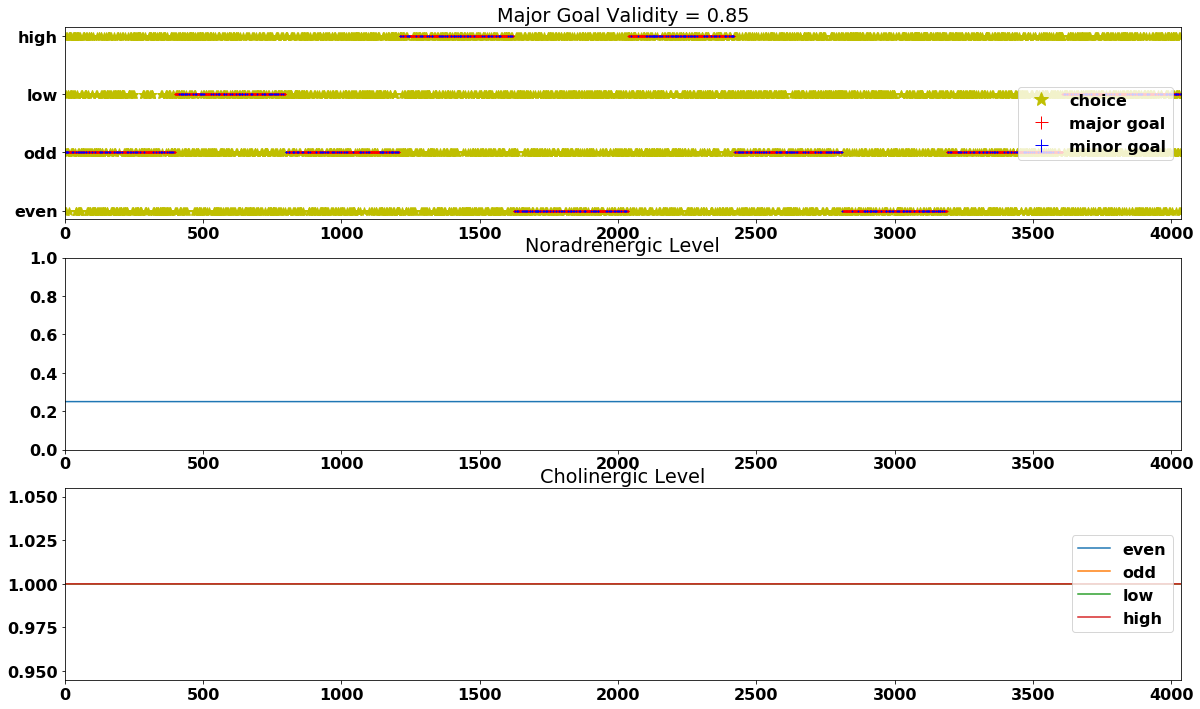

In [23]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
118/4034 = 2.9% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3121/4034 = 77.4% trials occurred when the predicted digit did not match the cued digit.
    383/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3034/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
795/4034 = 19.7% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


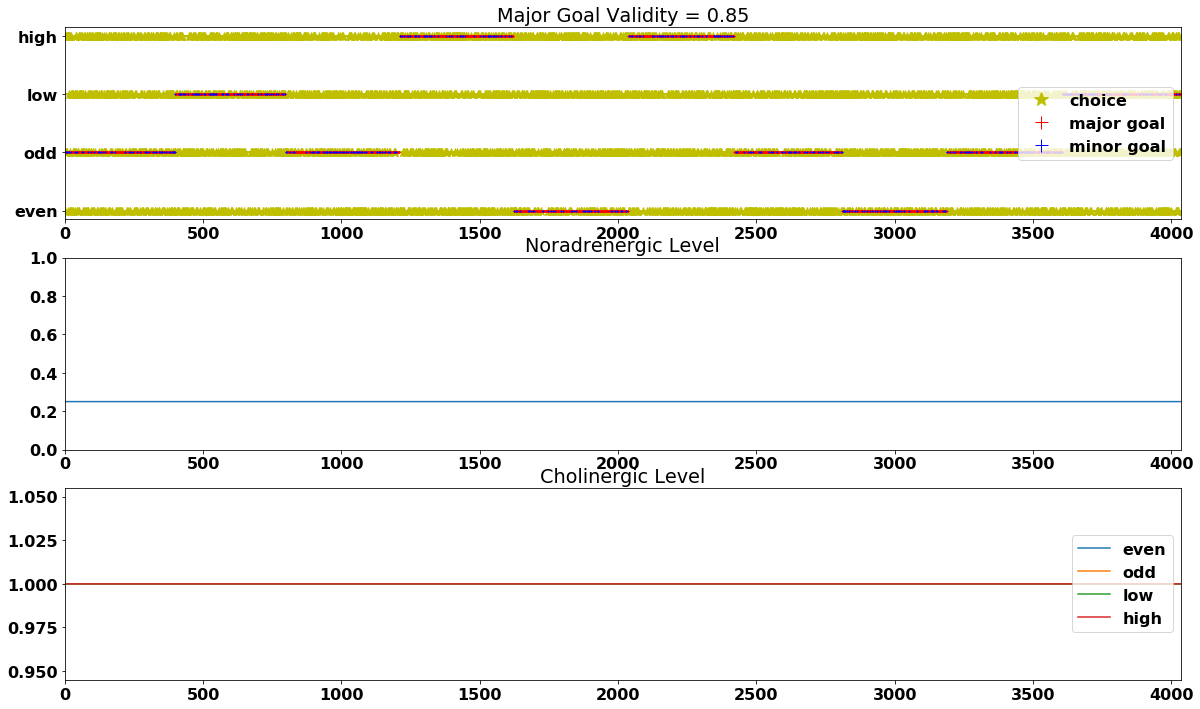

In [24]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
138/4034 = 3.4% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3109/4034 = 77.1% trials occurred when the predicted digit did not match the cued digit.
    377/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3011/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
787/4034 = 19.5% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 167 411 414 207 389 377 417 427], and mean of lag length (excluding consistently same cue) is 360.5


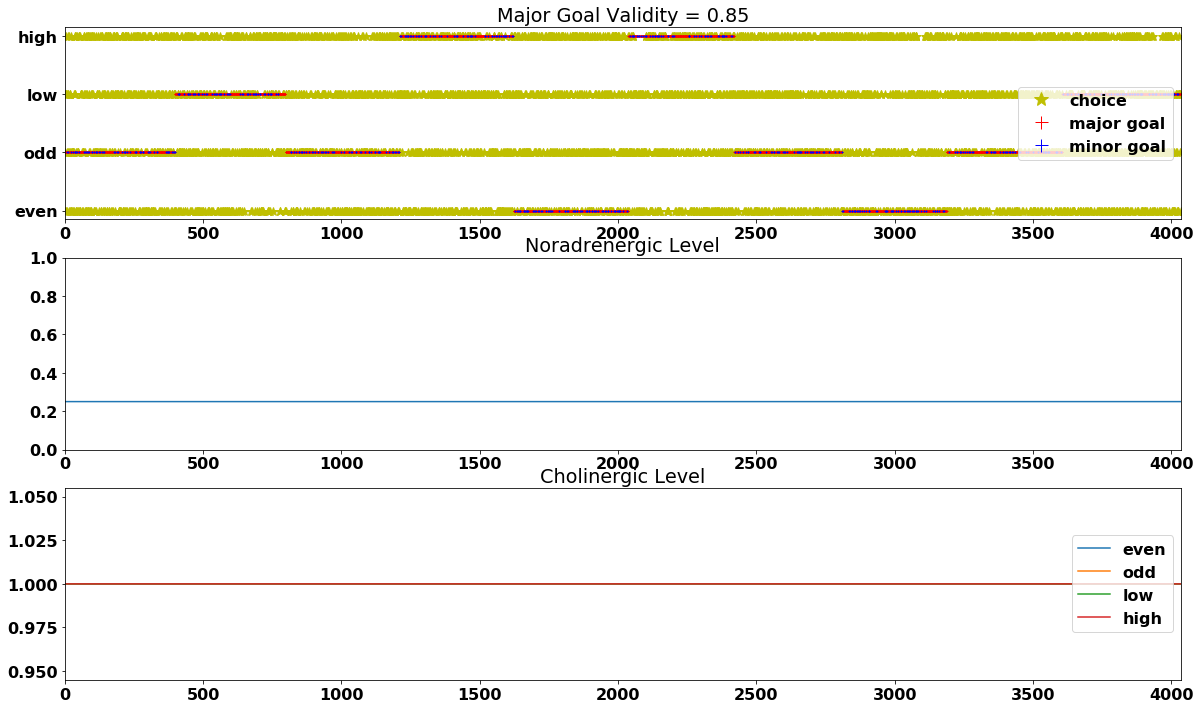

In [25]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [26]:
all_85_case_probs = [all_prob_85_1,all_prob_85_2,all_prob_85_3,all_prob_85_4,all_prob_85_5,\
                     all_prob_85_6,all_prob_85_7,all_prob_85_8,all_prob_85_9,all_prob_85_10]
averages_85 = average_probs(all_85_case_probs)


Average lag length is: 386
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.7720376797223598, 0.19350520575111554, 0.0, 0.03445711452652454, 0.7485374318294495, 0.09018344075359445, 0.0]


### 4.1.3: validity_choices=0.7

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
275/4034 = 6.8% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3135/4034 = 77.7% trials occurred when the predicted digit did not match the cued digit.
    382/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3048/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
624/4034 = 15.5% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


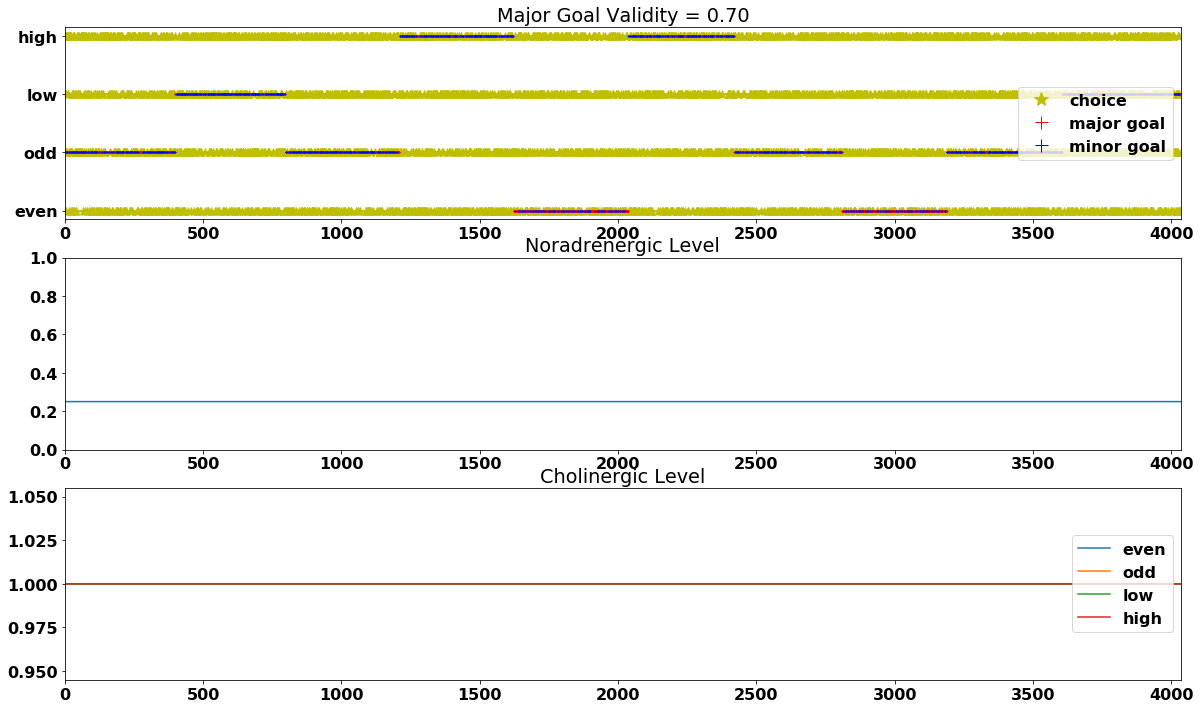

In [27]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
272/4034 = 6.7% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3128/4034 = 77.5% trials occurred when the predicted digit did not match the cued digit.
    357/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3022/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
634/4034 = 15.7% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


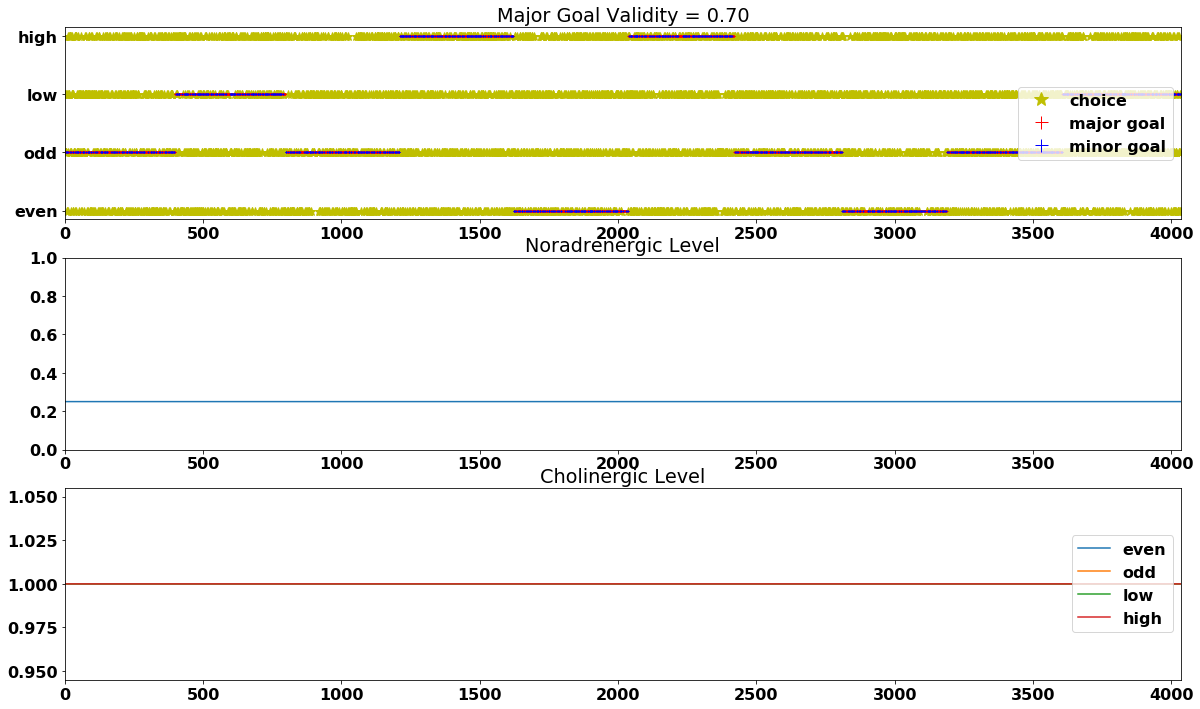

In [28]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
271/4034 = 6.7% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3089/4034 = 76.6% trials occurred when the predicted digit did not match the cued digit.
    348/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2998/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
674/4034 = 16.7% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


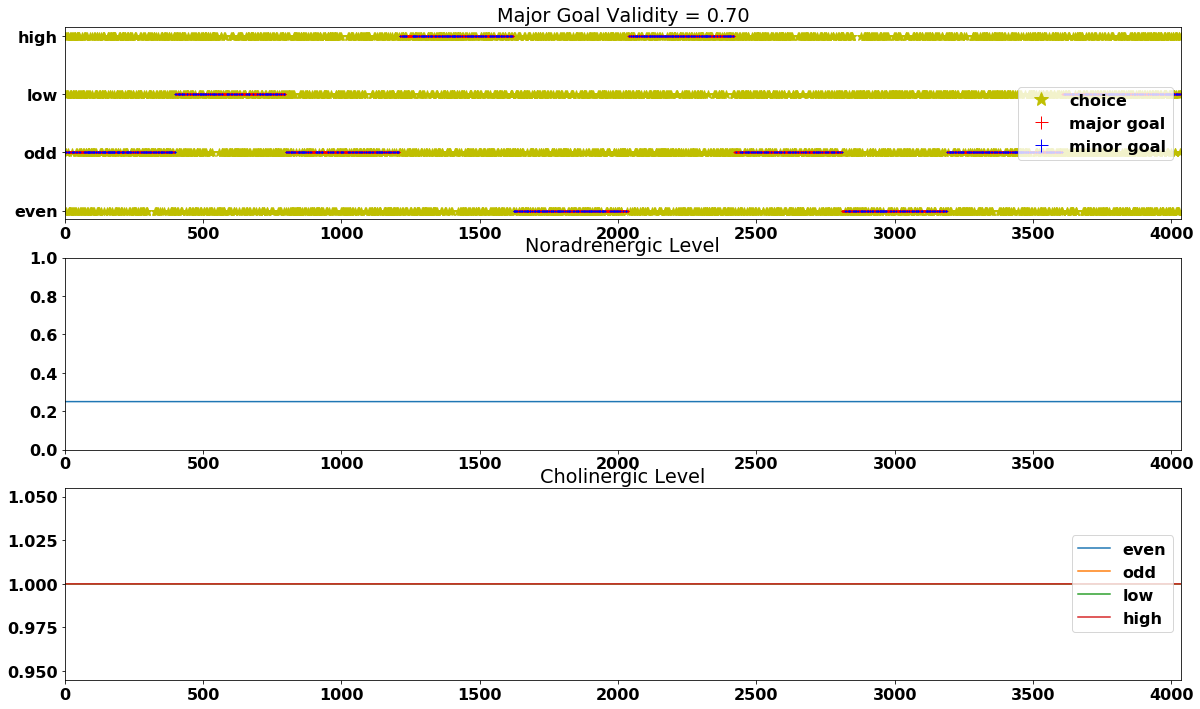

In [29]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
293/4034 = 7.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3105/4034 = 77.0% trials occurred when the predicted digit did not match the cued digit.
    379/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3012/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
636/4034 = 15.8% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 85 398 411 411 414 211 389 377 417 427], and mean of lag length (excluding consistently same cue) is 383.8888888888889


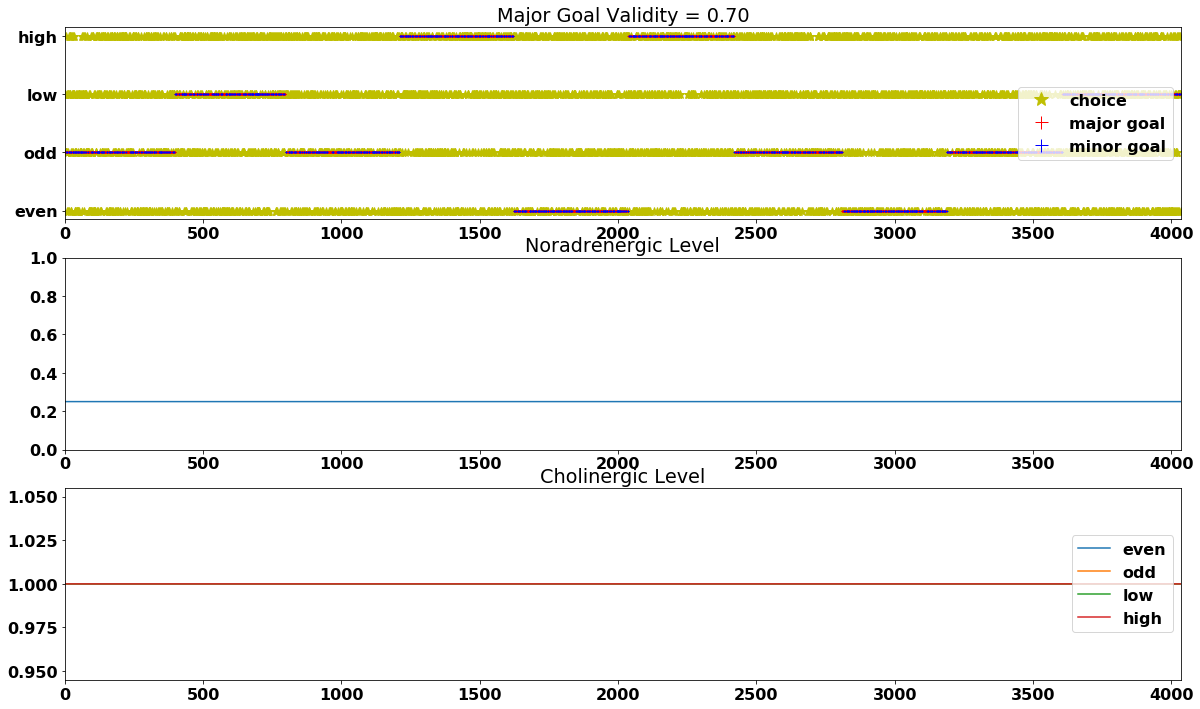

In [30]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
254/4034 = 6.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3131/4034 = 77.6% trials occurred when the predicted digit did not match the cued digit.
    382/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3048/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
649/4034 = 16.1% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 222 377 417 427], and mean of lag length (excluding consistently same cue) is 385.7


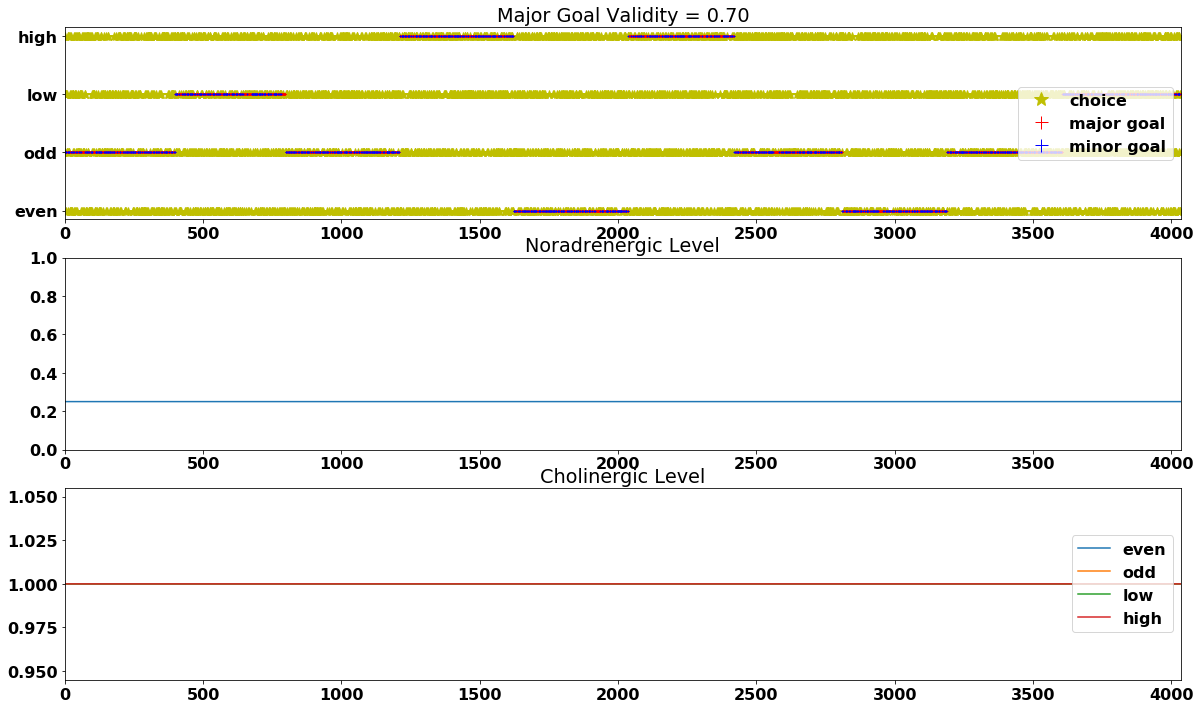

In [31]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
242/4034 = 6.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3129/4034 = 77.6% trials occurred when the predicted digit did not match the cued digit.
    359/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3039/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
663/4034 = 16.4% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


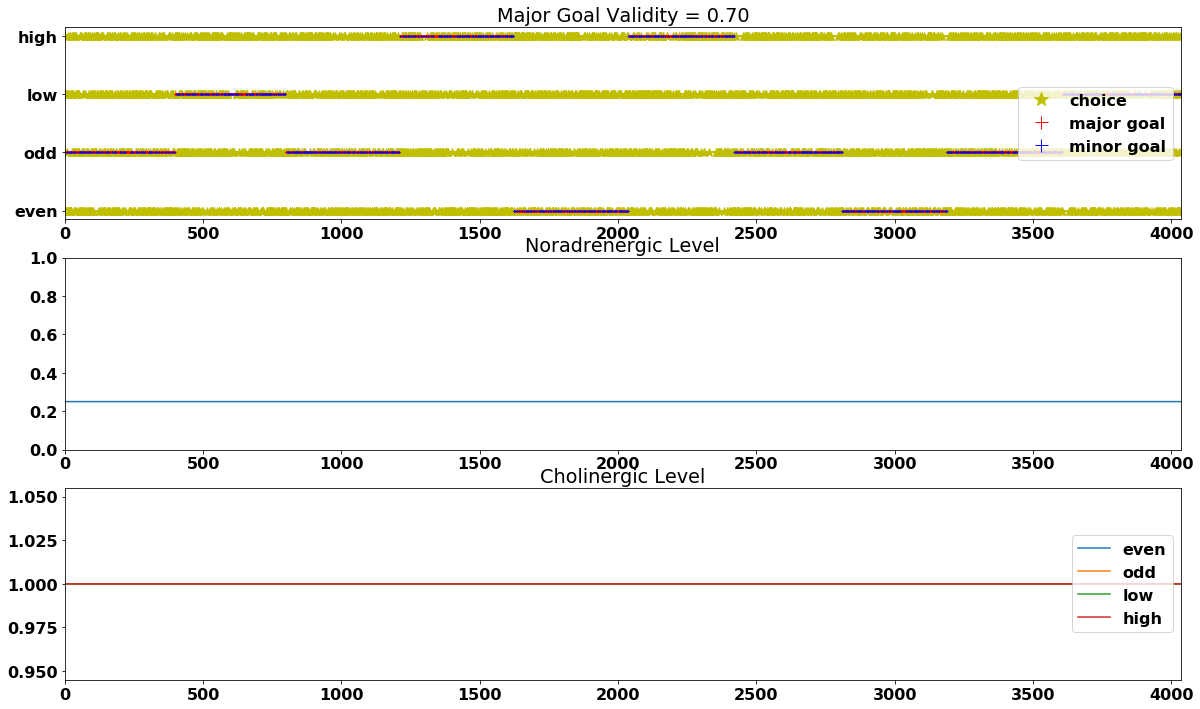

In [32]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
281/4034 = 7.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3128/4034 = 77.5% trials occurred when the predicted digit did not match the cued digit.
    376/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3043/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
625/4034 = 15.5% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


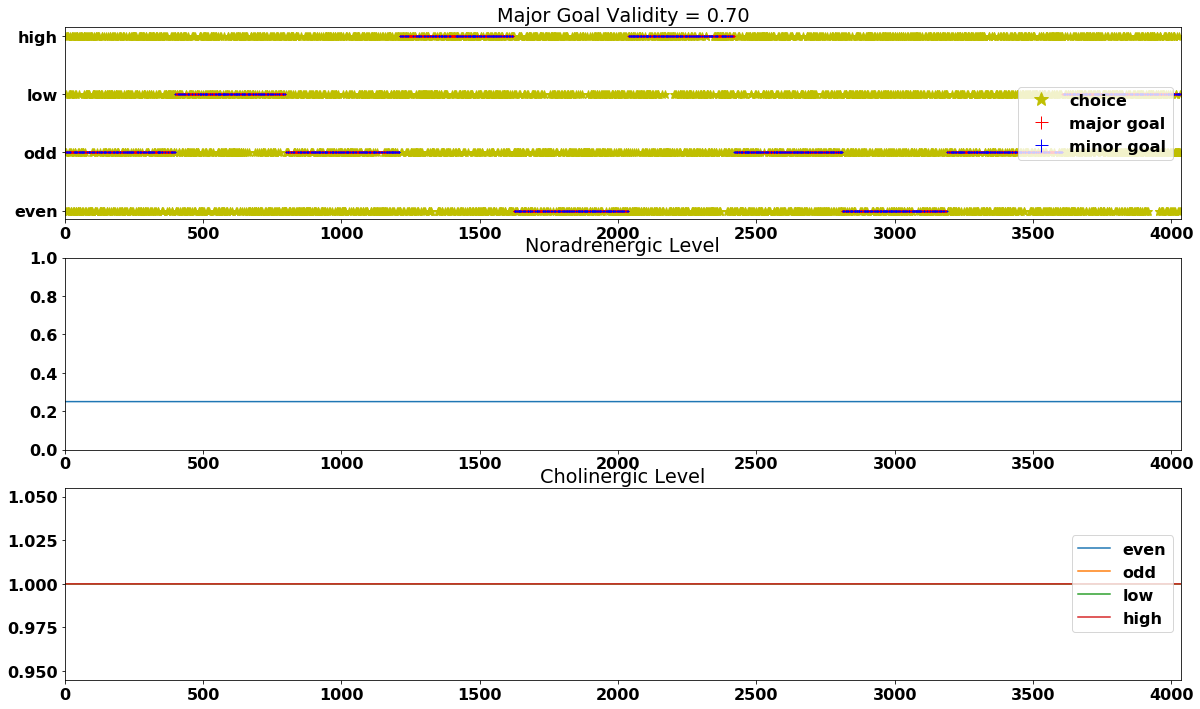

In [33]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
277/4034 = 6.9% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3121/4034 = 77.4% trials occurred when the predicted digit did not match the cued digit.
    352/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3038/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
636/4034 = 15.8% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


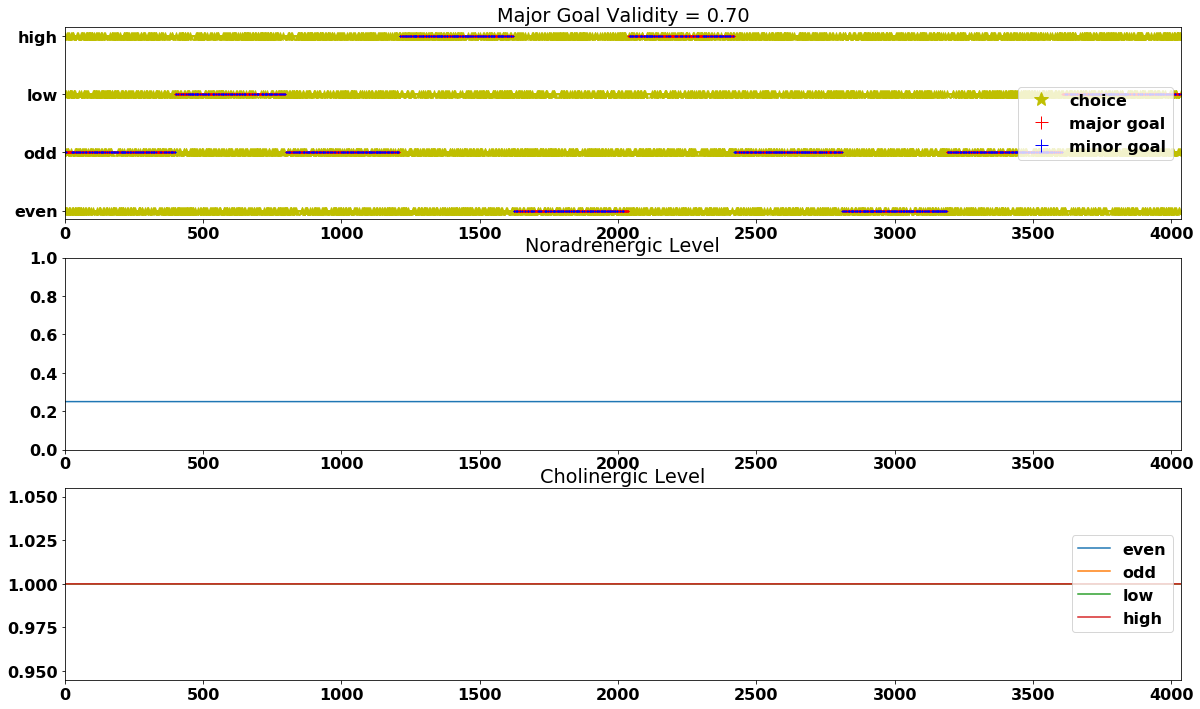

In [34]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
239/4034 = 5.9% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3182/4034 = 78.9% trials occurred when the predicted digit did not match the cued digit.
    365/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3098/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
613/4034 = 15.2% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417  71], and mean of lag length (excluding consistently same cue) is 366.8


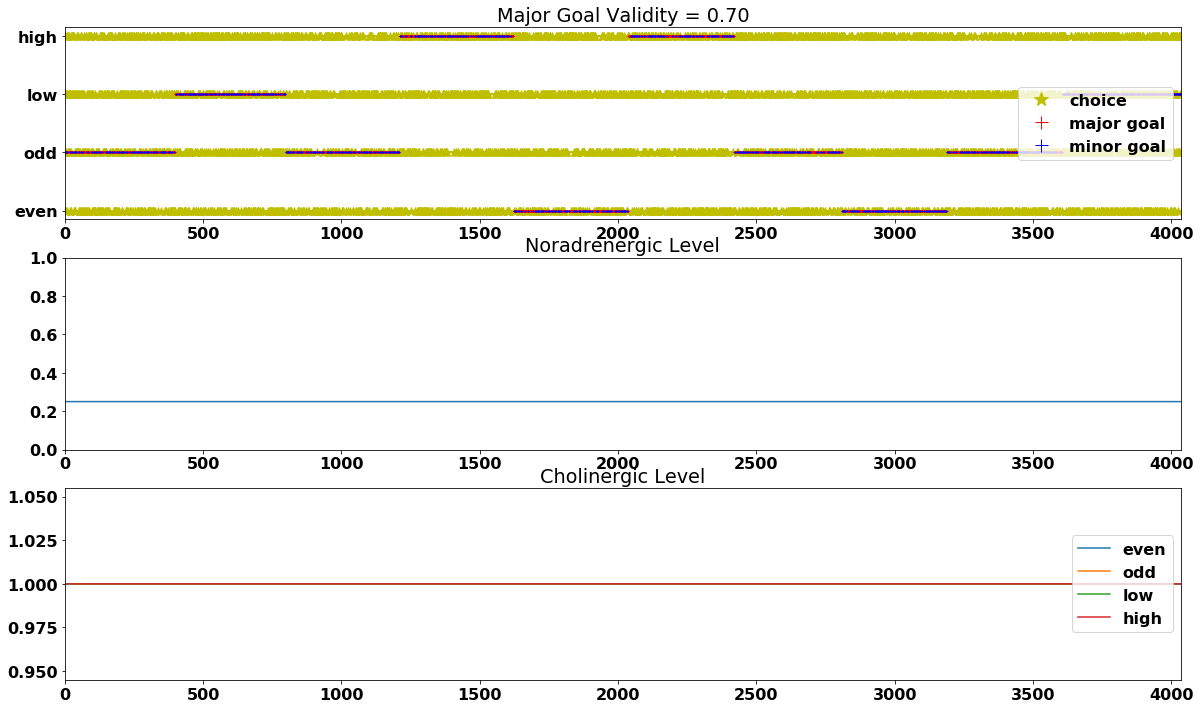

In [35]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
292/4034 = 7.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3120/4034 = 77.3% trials occurred when the predicted digit did not match the cued digit.
    379/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3032/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
622/4034 = 15.4% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


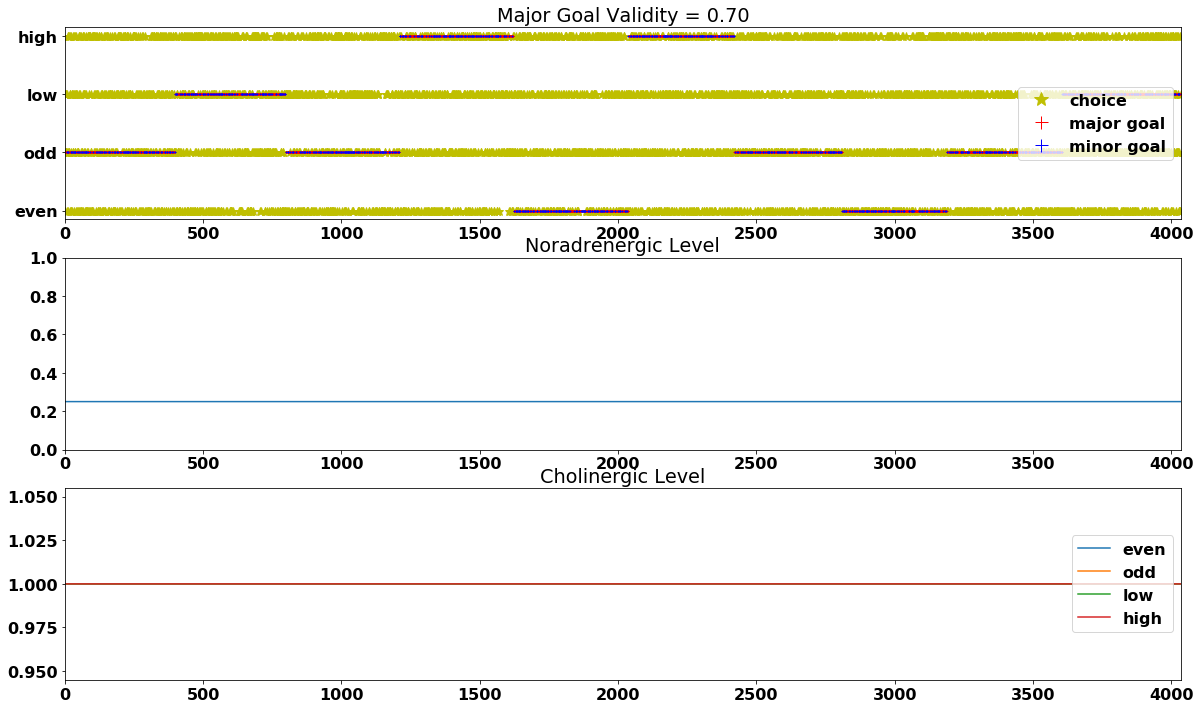

In [36]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [37]:
all_70_case_probs = [all_prob_70_1,all_prob_70_2,all_prob_70_3,all_prob_70_4,all_prob_70_5,\
                     all_prob_70_6,all_prob_70_7,all_prob_70_8,all_prob_70_9,all_prob_70_10]
averages_70 = average_probs(all_70_case_probs)


Average lag length is: 395
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.7751115518096182, 0.15805651958353992, 0.0, 0.06683192860684184, 0.7530490827962321, 0.0911998016856718, 0.0]


### 4.1.4: validity_choices=[0.99, 0.85, 0.70]

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
94/4034 = 2.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3115/4034 = 77.2% trials occurred when the predicted digit did not match the cued digit.
    356/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3012/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
825/4034 = 20.5% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [394 398 411 411 295 382 389 150 417 427], and mean of lag length (excluding consistently same cue) is 364.44444444444446


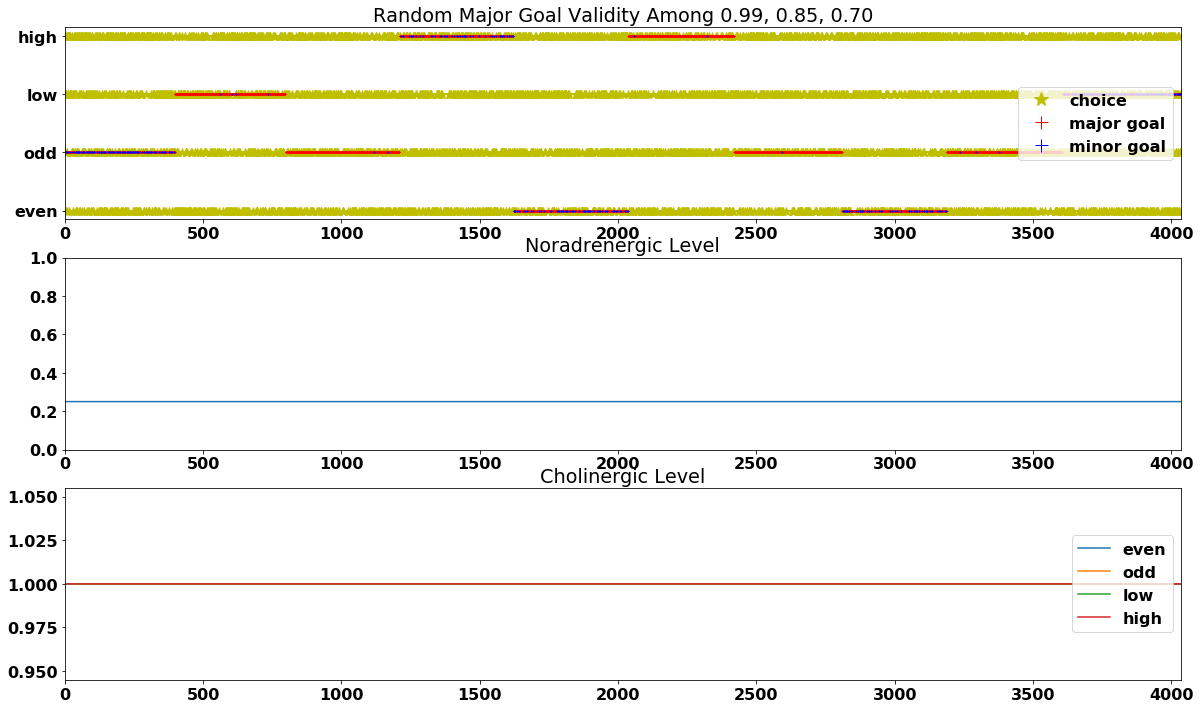

In [38]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
44/4034 = 1.1% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3187/4034 = 79.0% trials occurred when the predicted digit did not match the cued digit.
    369/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3089/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
803/4034 = 19.9% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


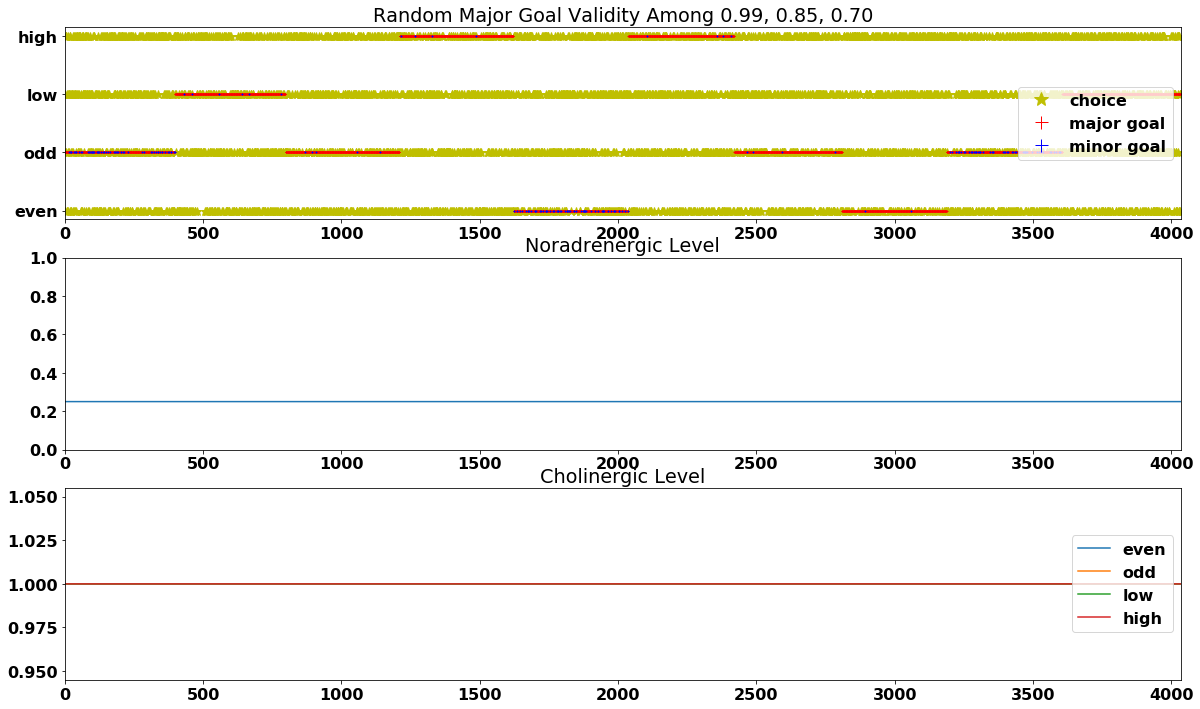

In [39]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
169/4034 = 4.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3112/4034 = 77.1% trials occurred when the predicted digit did not match the cued digit.
    383/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3021/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
753/4034 = 18.7% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 296 417 427], and mean of lag length (excluding consistently same cue) is 394.3


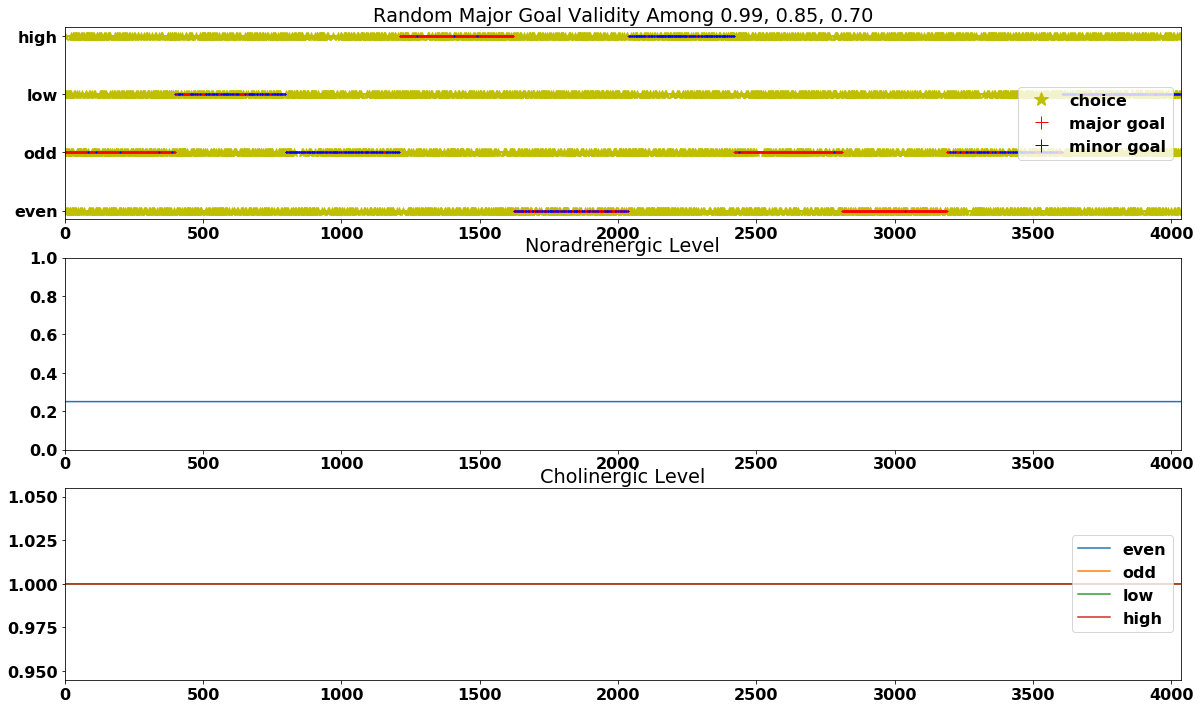

In [40]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
208/4034 = 5.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3112/4034 = 77.1% trials occurred when the predicted digit did not match the cued digit.
    389/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3010/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
714/4034 = 17.7% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


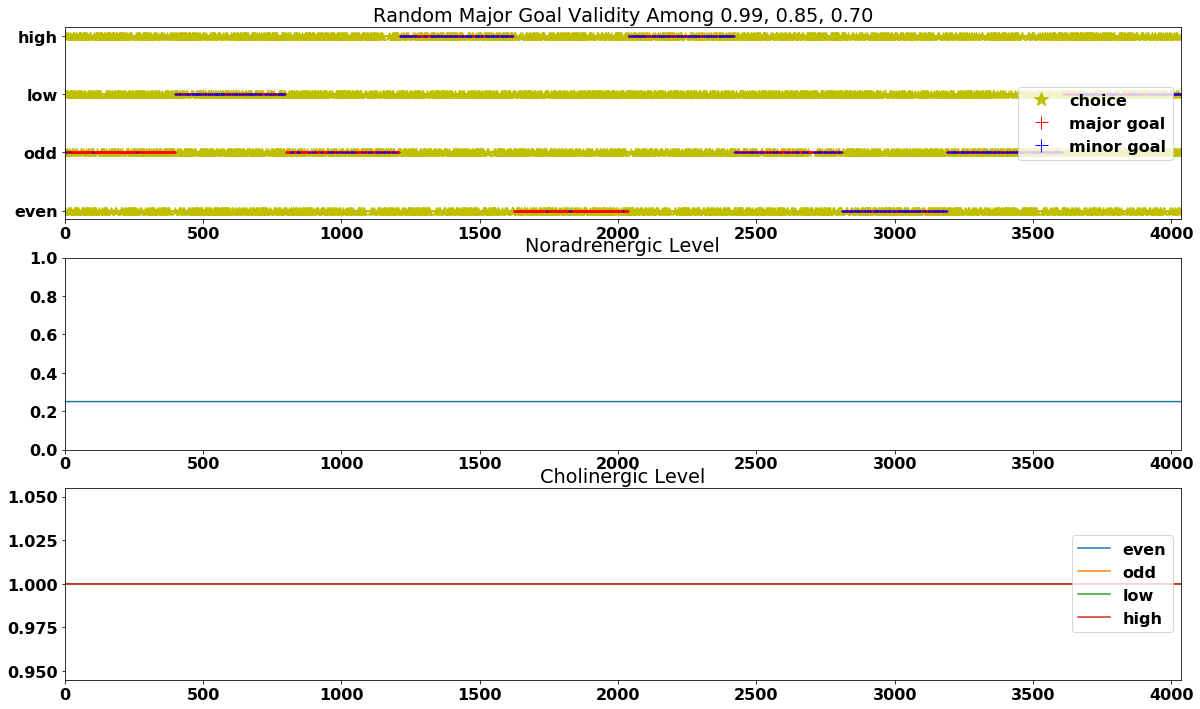

In [41]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
163/4034 = 4.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3104/4034 = 76.9% trials occurred when the predicted digit did not match the cued digit.
    341/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3037/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
767/4034 = 19.0% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411  74 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 368.4


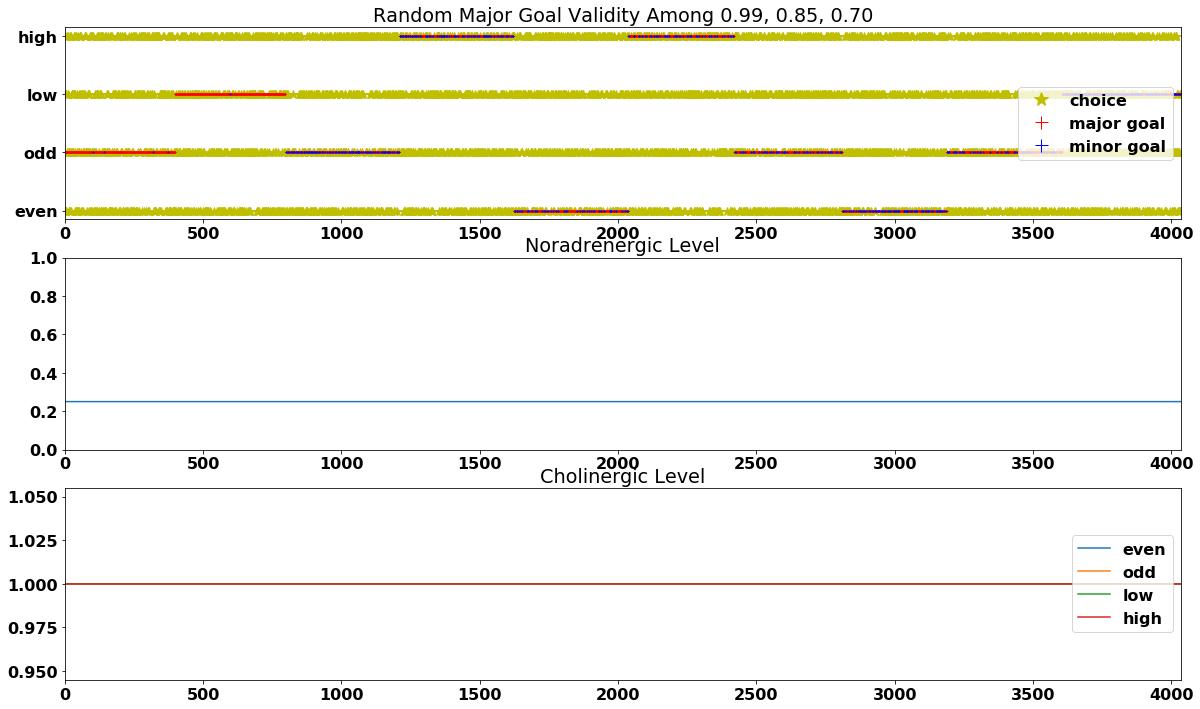

In [42]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
131/4034 = 3.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3101/4034 = 76.9% trials occurred when the predicted digit did not match the cued digit.
    365/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3004/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
802/4034 = 19.9% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 121 411 411 414 382  14 377 417 427], and mean of lag length (excluding consistently same cue) is 337.2


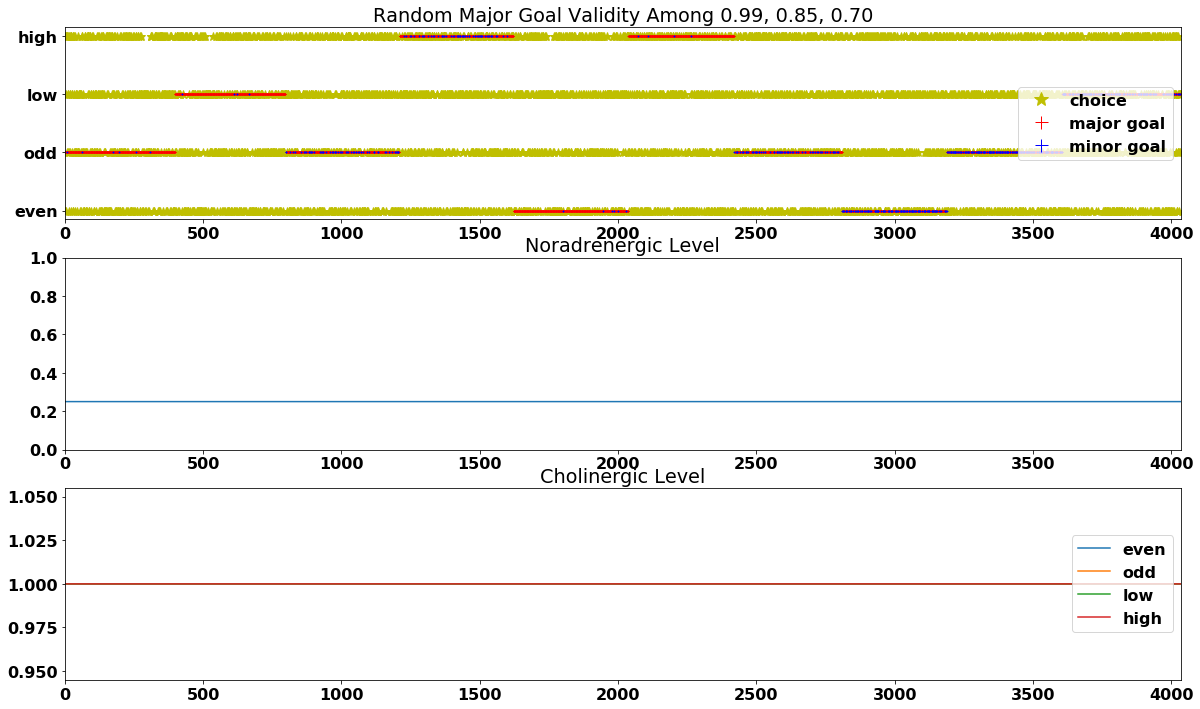

In [43]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
153/4034 = 3.8% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3103/4034 = 76.9% trials occurred when the predicted digit did not match the cued digit.
    339/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3031/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
778/4034 = 19.3% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 381 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 399.4


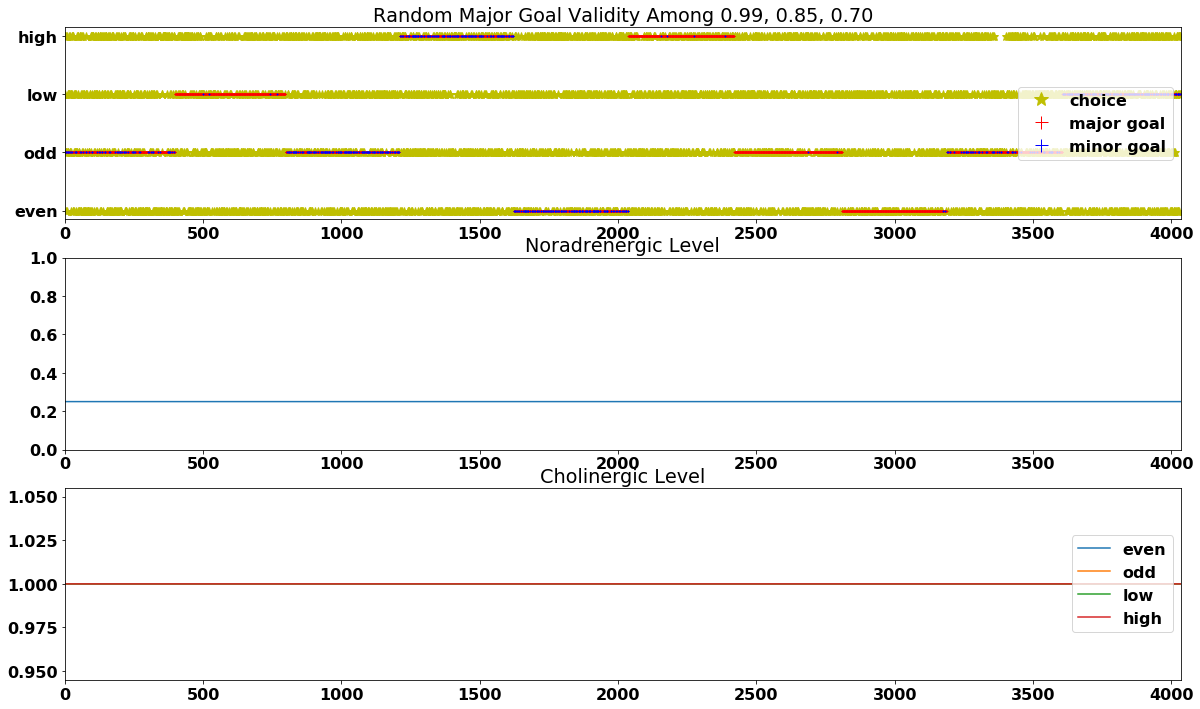

In [44]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
106/4034 = 2.6% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3112/4034 = 77.1% trials occurred when the predicted digit did not match the cued digit.
    390/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3029/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
816/4034 = 20.2% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 222 417 427], and mean of lag length (excluding consistently same cue) is 386.9


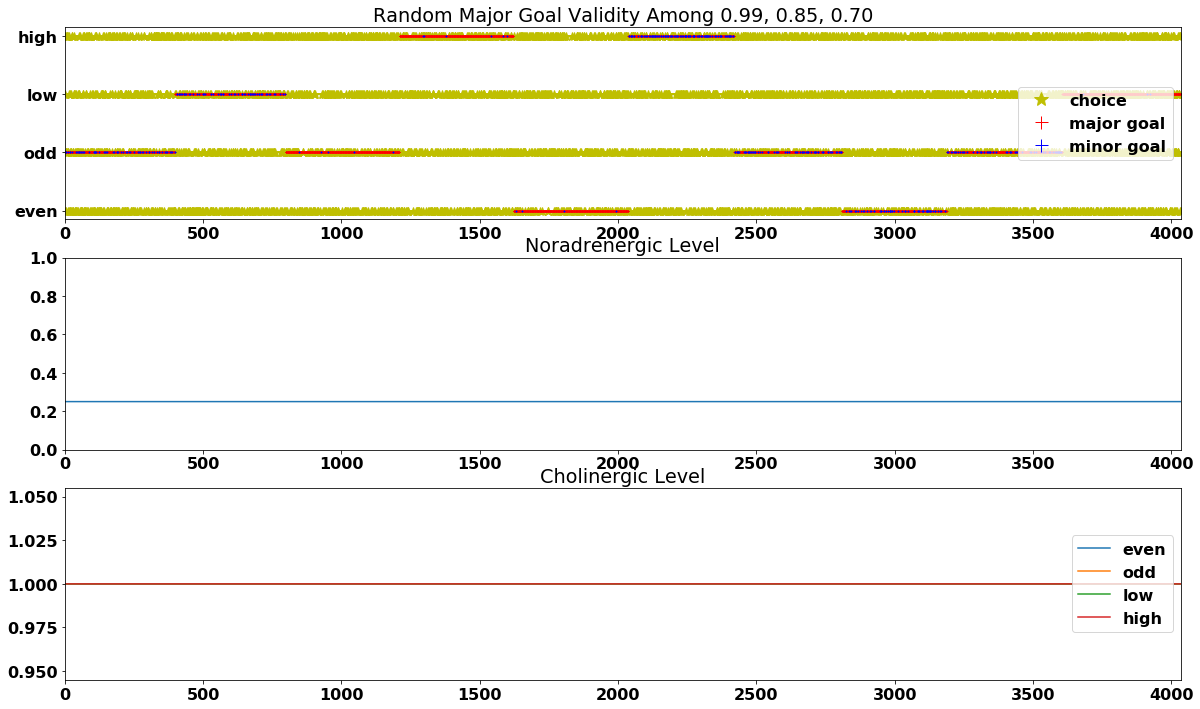

In [45]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
139/4034 = 3.4% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3110/4034 = 77.1% trials occurred when the predicted digit did not match the cued digit.
    344/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3017/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
785/4034 = 19.5% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [398 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.4


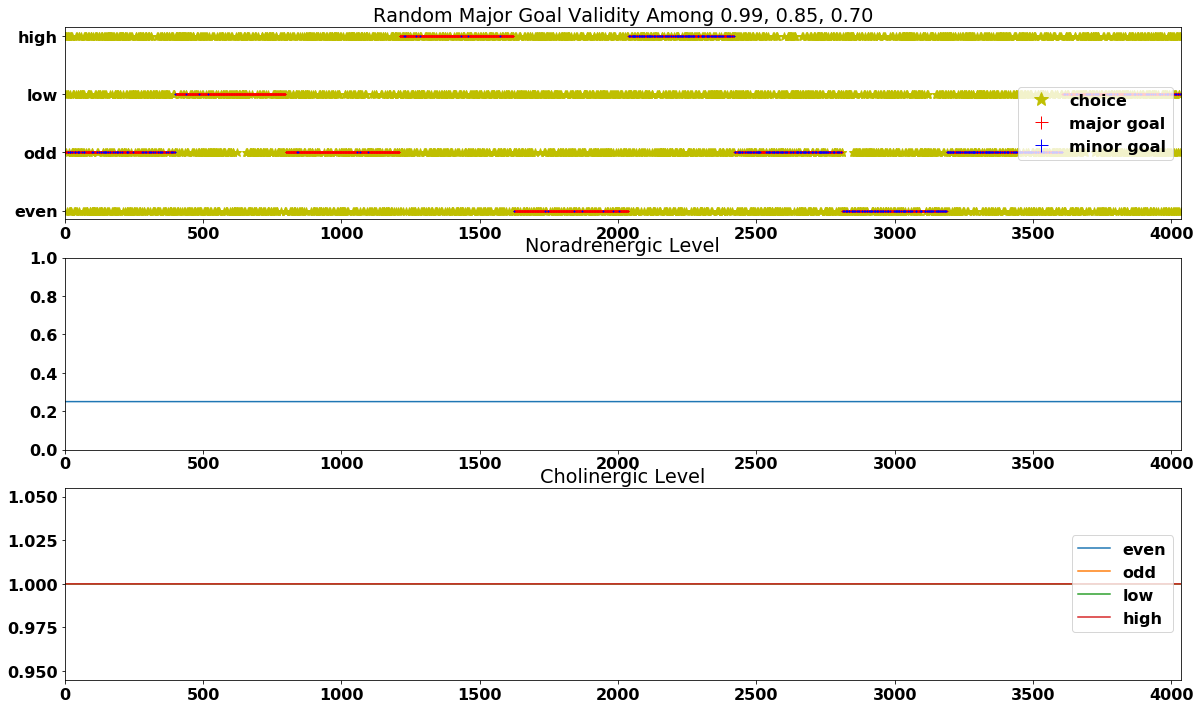

In [46]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
171/4034 = 4.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3141/4034 = 77.9% trials occurred when the predicted digit did not match the cued digit.
    374/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3042/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
722/4034 = 17.9% trials occurred when the predicted digit matches the major cued digit and is valid
0/4034 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [386 398 411 411 414 382 389 377 417 427], and mean of lag length (excluding consistently same cue) is 402.8888888888889


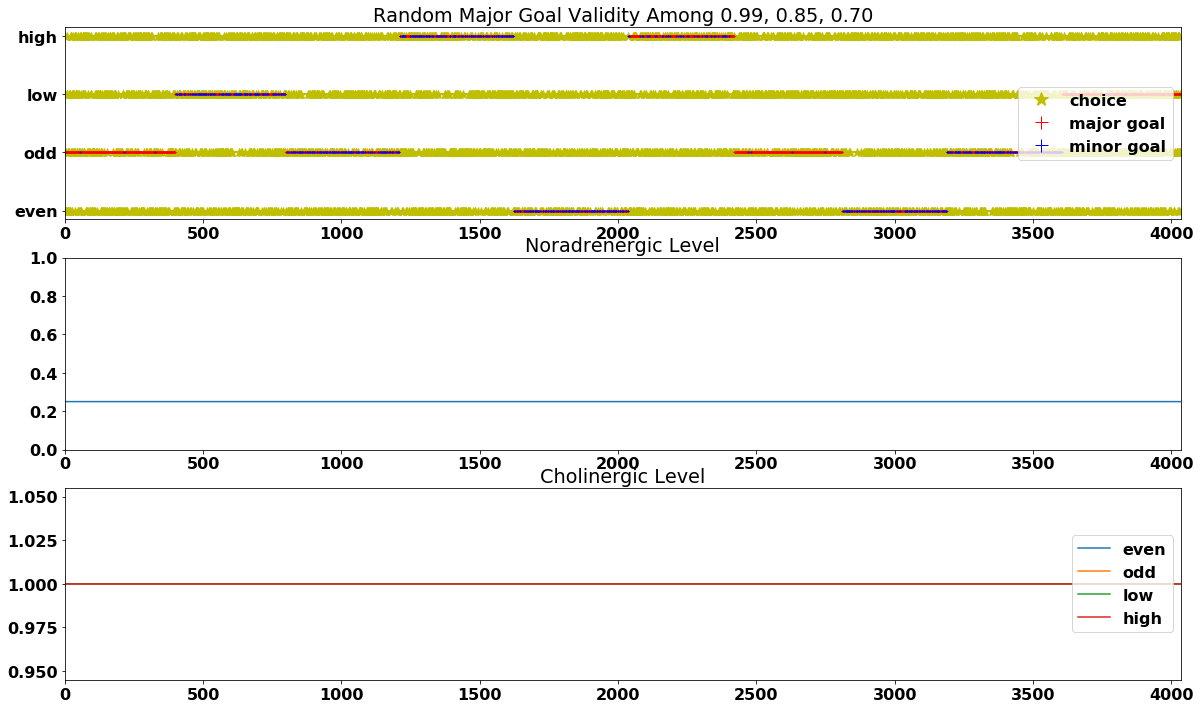

In [47]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [48]:
all_multi_case_probs = [all_prob_multi_1,all_prob_multi_2,all_prob_multi_3,all_prob_multi_4,all_prob_multi_5,\
                        all_prob_multi_6,all_prob_multi_7,all_prob_multi_8,all_prob_multi_9,all_prob_multi_10]
averages_multi = average_probs(all_multi_case_probs)


Average lag length is: 386
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.7733515121467526, 0.19248884481903816, 0.0, 0.03415964303420922, 0.7509172037679723, 0.09048091224590978, 0.0]


## 4.2: Two Possibly Valid Cues
Randomly change trial interval within the range (200+/-20) and have two possibly valid cues for each cue switch, and use one of the validity options: 0.99, 0.85, 0.70

In [49]:
alterValid=True

### 4.2.1: validity_choices=0.99

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3112/4034 = 77.1% trials occurred when the predicted digit did not match the cued digit.
    377/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3005/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
910/4034 = 22.6% trials occurred when the predicted digit matches the major cued digit and is valid
12/4034 = 0.3% trials occurred when the predicted digit matches the minor cued digit and is valid
9/4034 = 0.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag leng

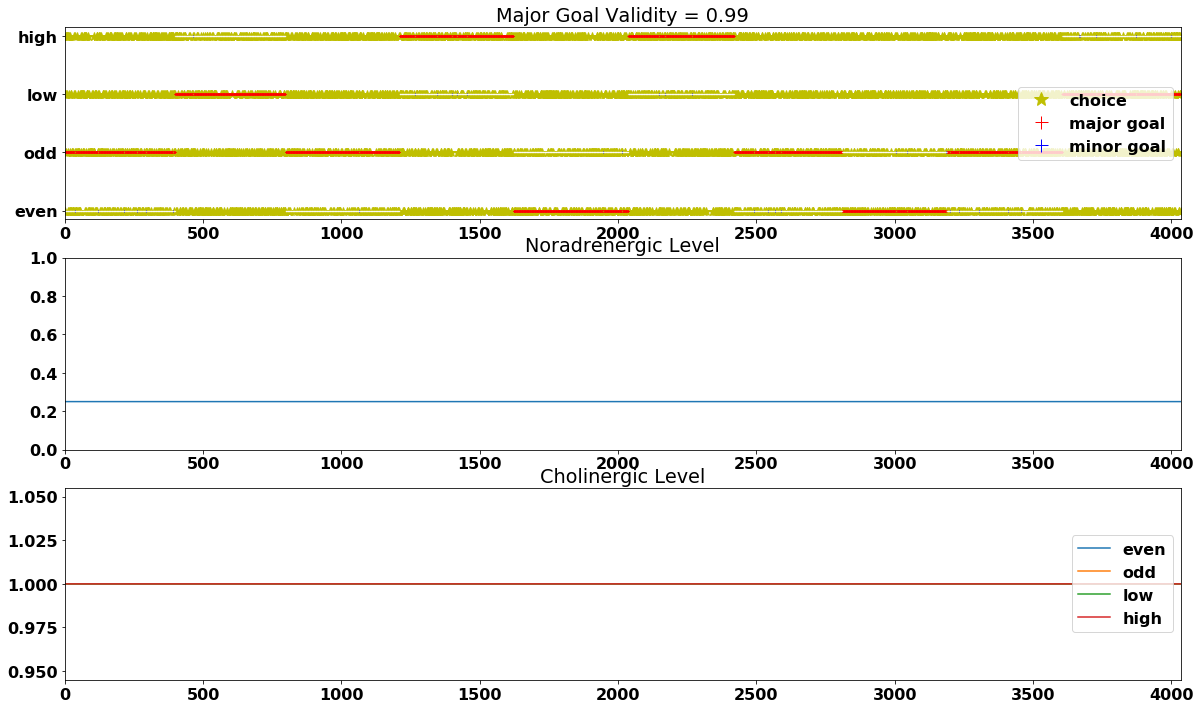

In [50]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_1a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3151/4034 = 78.1% trials occurred when the predicted digit did not match the cued digit.
    357/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3057/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
877/4034 = 21.7% trials occurred when the predicted digit matches the major cued digit and is valid
6/4034 = 0.1% trials occurred when the predicted digit matches the minor cued digit and is valid
14/4034 = 0.3% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag leng

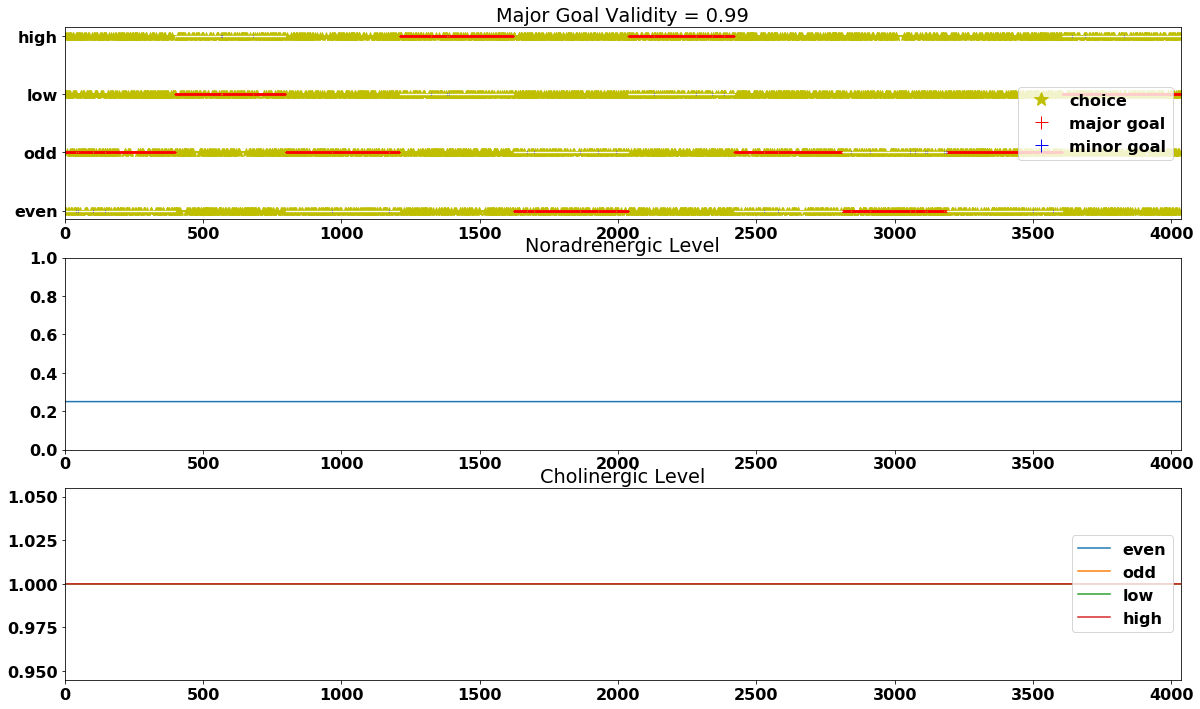

In [51]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_2a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3138/4034 = 77.8% trials occurred when the predicted digit did not match the cued digit.
    350/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3041/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
888/4034 = 22.0% trials occurred when the predicted digit matches the major cued digit and is valid
8/4034 = 0.2% trials occurred when the predicted digit matches the minor cued digit and is valid
8/4034 = 0.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag lengt

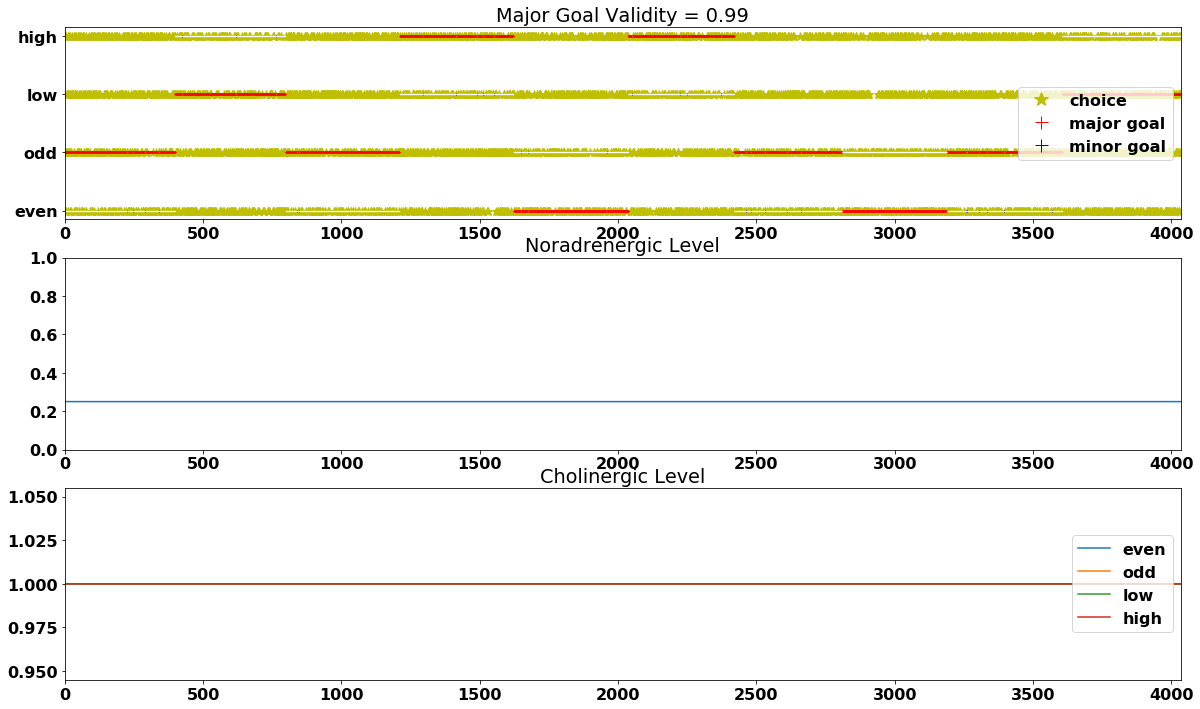

In [52]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_3a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3117/4034 = 77.3% trials occurred when the predicted digit did not match the cued digit.
    365/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3028/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
909/4034 = 22.5% trials occurred when the predicted digit matches the major cued digit and is valid
8/4034 = 0.2% trials occurred when the predicted digit matches the minor cued digit and is valid
8/4034 = 0.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag lengt

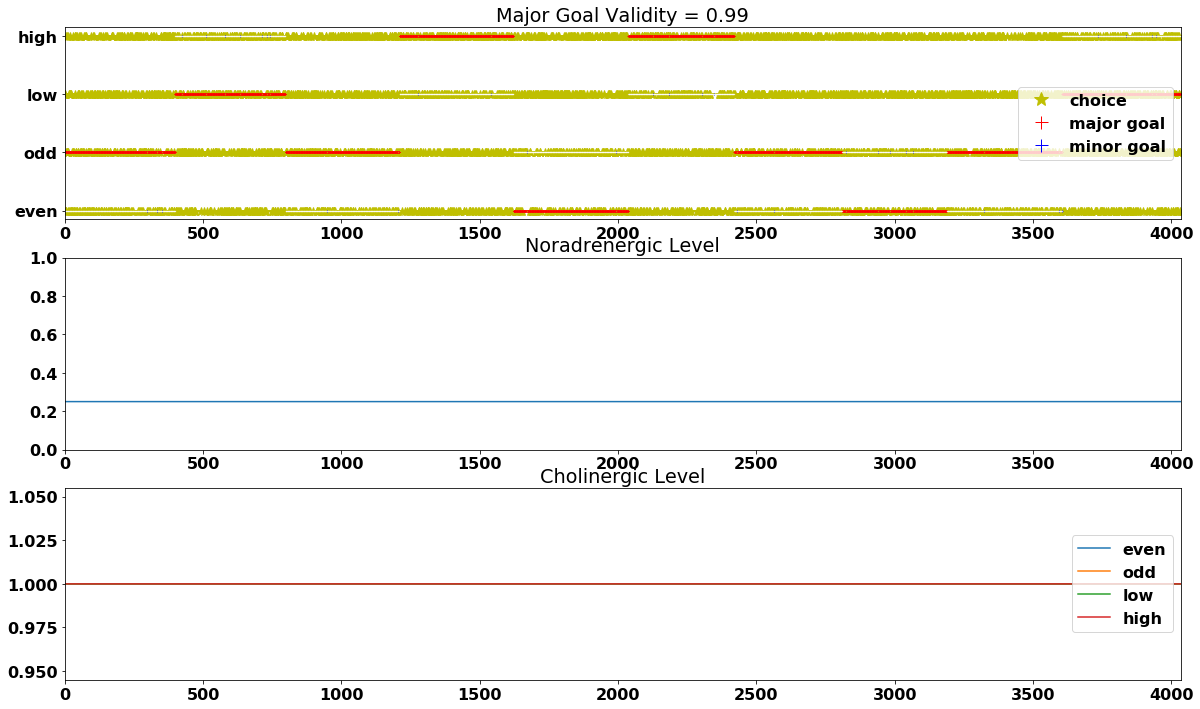

In [53]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_4a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3134/4034 = 77.7% trials occurred when the predicted digit did not match the cued digit.
    357/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3048/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
893/4034 = 22.1% trials occurred when the predicted digit matches the major cued digit and is valid
7/4034 = 0.2% trials occurred when the predicted digit matches the minor cued digit and is valid
13/4034 = 0.3% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag leng

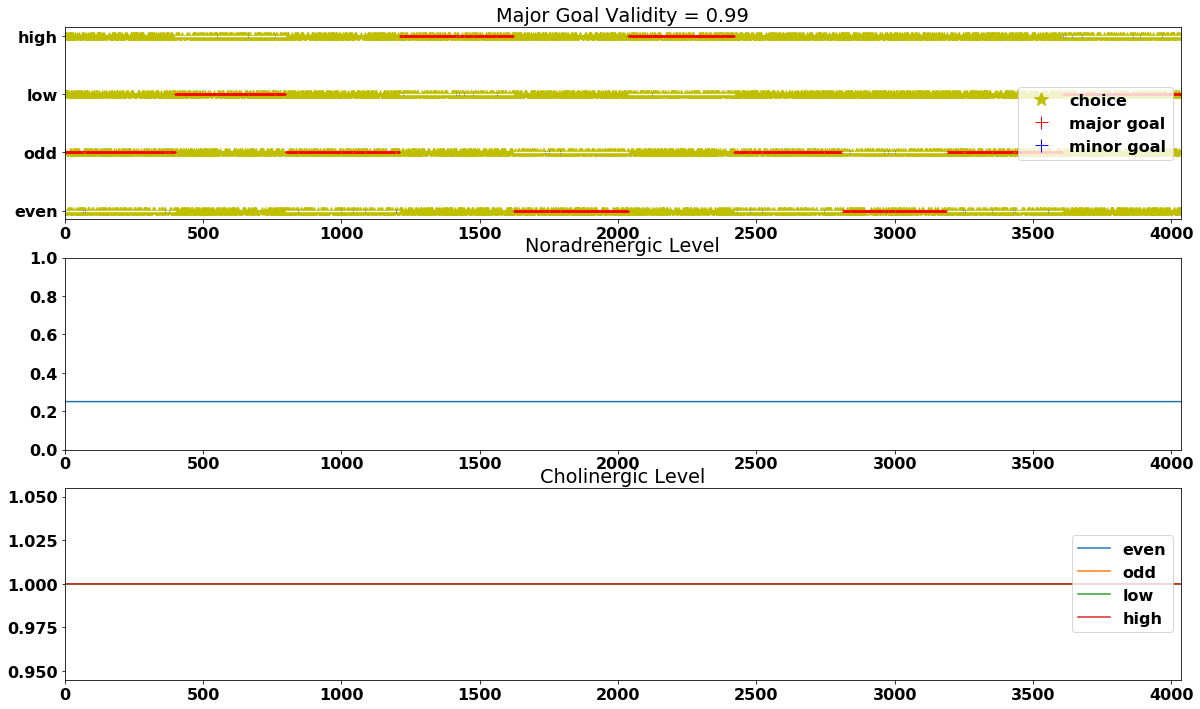

In [54]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_5a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3126/4034 = 77.5% trials occurred when the predicted digit did not match the cued digit.
    373/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3031/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
898/4034 = 22.3% trials occurred when the predicted digit matches the major cued digit and is valid
10/4034 = 0.2% trials occurred when the predicted digit matches the minor cued digit and is valid
4/4034 = 0.1% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag leng

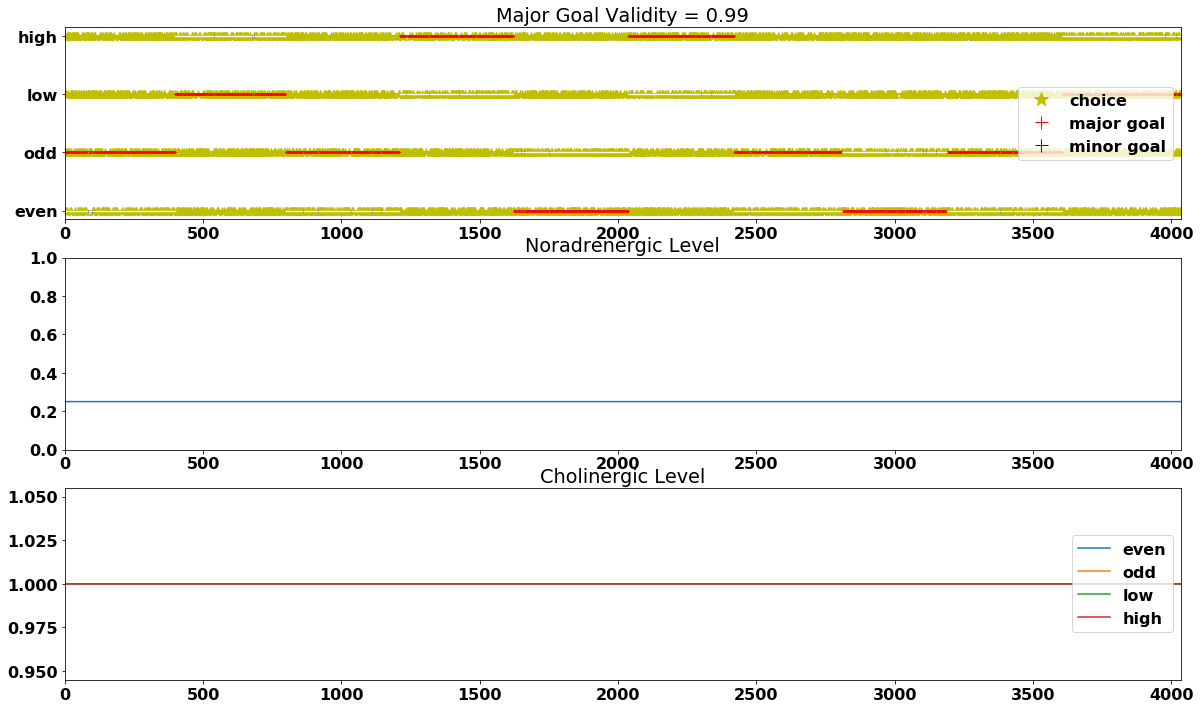

In [55]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_6a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3113/4034 = 77.2% trials occurred when the predicted digit did not match the cued digit.
    346/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3025/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
910/4034 = 22.6% trials occurred when the predicted digit matches the major cued digit and is valid
11/4034 = 0.3% trials occurred when the predicted digit matches the minor cued digit and is valid
12/4034 = 0.3% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

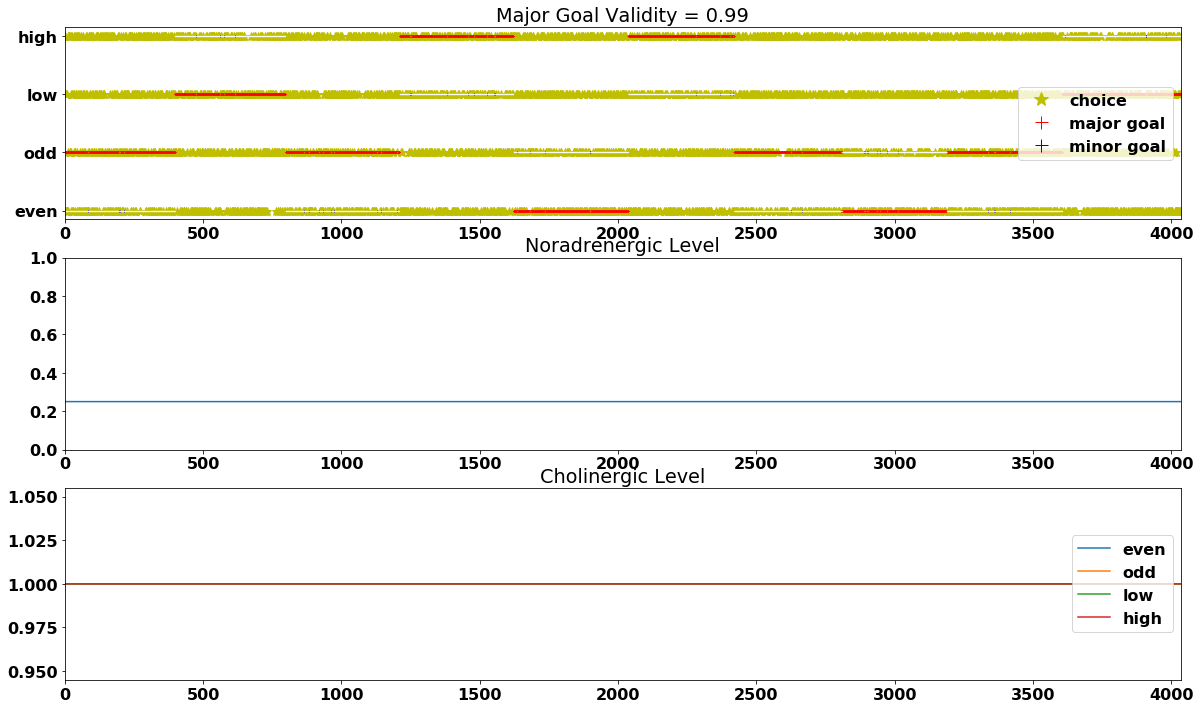

In [56]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_7a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3103/4034 = 76.9% trials occurred when the predicted digit did not match the cued digit.
    354/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3010/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
924/4034 = 22.9% trials occurred when the predicted digit matches the major cued digit and is valid
7/4034 = 0.2% trials occurred when the predicted digit matches the minor cued digit and is valid
8/4034 = 0.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag lengt

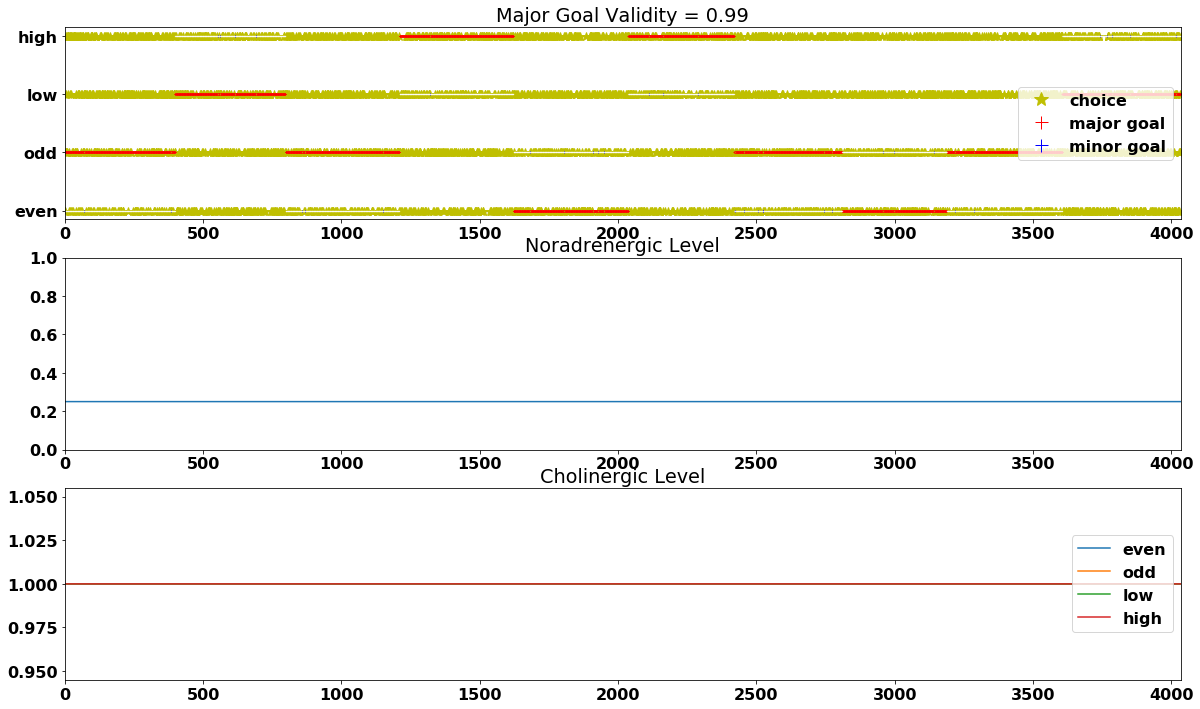

In [57]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_8a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3097/4034 = 76.8% trials occurred when the predicted digit did not match the cued digit.
    365/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3004/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
927/4034 = 23.0% trials occurred when the predicted digit matches the major cued digit and is valid
10/4034 = 0.2% trials occurred when the predicted digit matches the minor cued digit and is valid
8/4034 = 0.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag leng

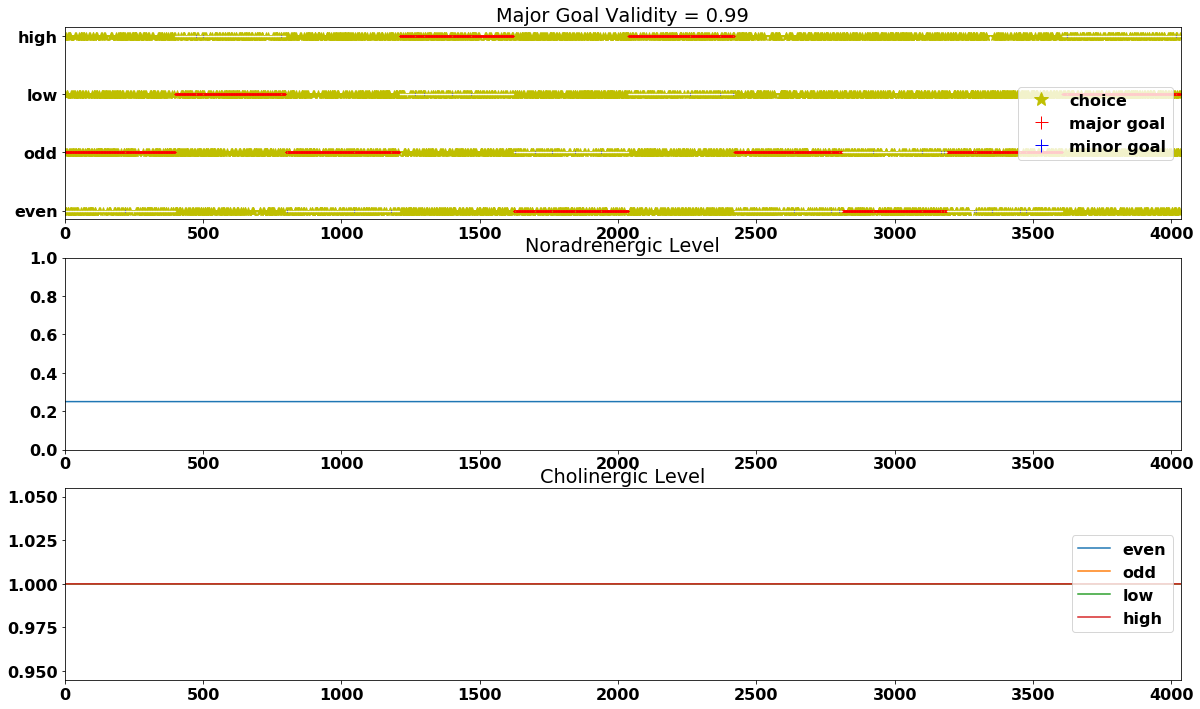

In [58]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_9a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3099/4034 = 76.8% trials occurred when the predicted digit did not match the cued digit.
    387/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2997/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
920/4034 = 22.8% trials occurred when the predicted digit matches the major cued digit and is valid
15/4034 = 0.4% trials occurred when the predicted digit matches the minor cued digit and is valid
8/4034 = 0.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag leng

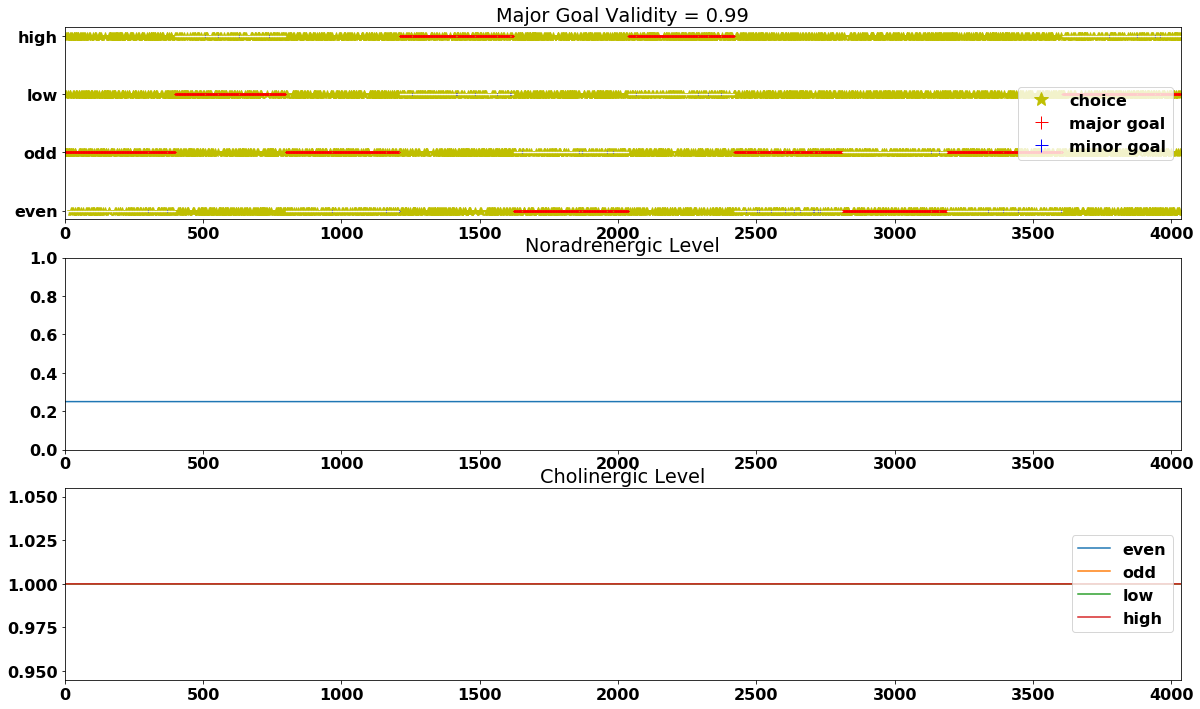

In [59]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_10a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


In [60]:
all_99a_case_probs = [all_prob_99_1a,all_prob_99_2a,all_prob_99_3a,all_prob_99_4a,all_prob_99_5a,\
                      all_prob_99_6a,all_prob_99_7a,all_prob_99_8a,all_prob_99_9a,all_prob_99_10a]
averages_99a = average_probs(all_99a_case_probs)


Average lag length is: 388
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.7731779871095686, 0.2244918195339613, 0.002330193356470005, 0.0, 0.7497768963807635, 0.09000991571641051, 0.002280614774417452]


### 4.2.2: validity_choices=0.85

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3085/4034 = 76.5% trials occurred when the predicted digit did not match the cued digit.
    376/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3006/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
809/4034 = 20.1% trials occurred when the predicted digit matches the major cued digit and is valid
140/4034 = 3.5% trials occurred when the predicted digit matches the minor cued digit and is valid
136/4034 = 3.4% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

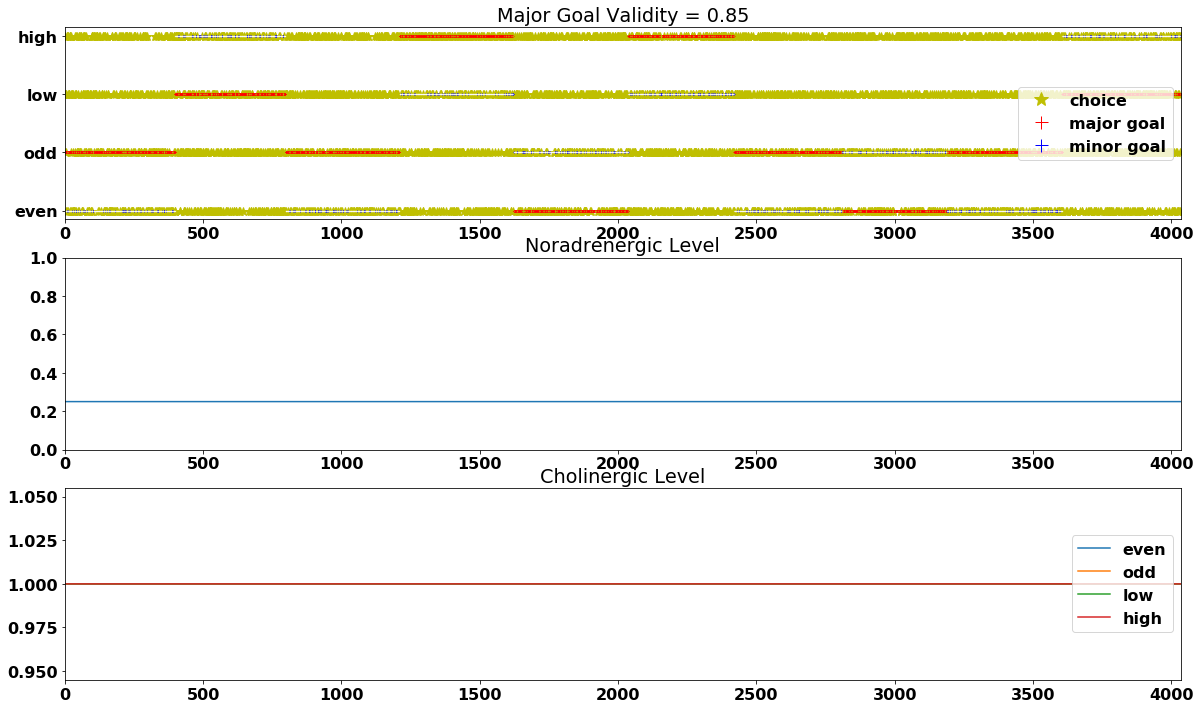

In [61]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_1a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3105/4034 = 77.0% trials occurred when the predicted digit did not match the cued digit.
    339/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3031/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
787/4034 = 19.5% trials occurred when the predicted digit matches the major cued digit and is valid
142/4034 = 3.5% trials occurred when the predicted digit matches the minor cued digit and is valid
130/4034 = 3.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

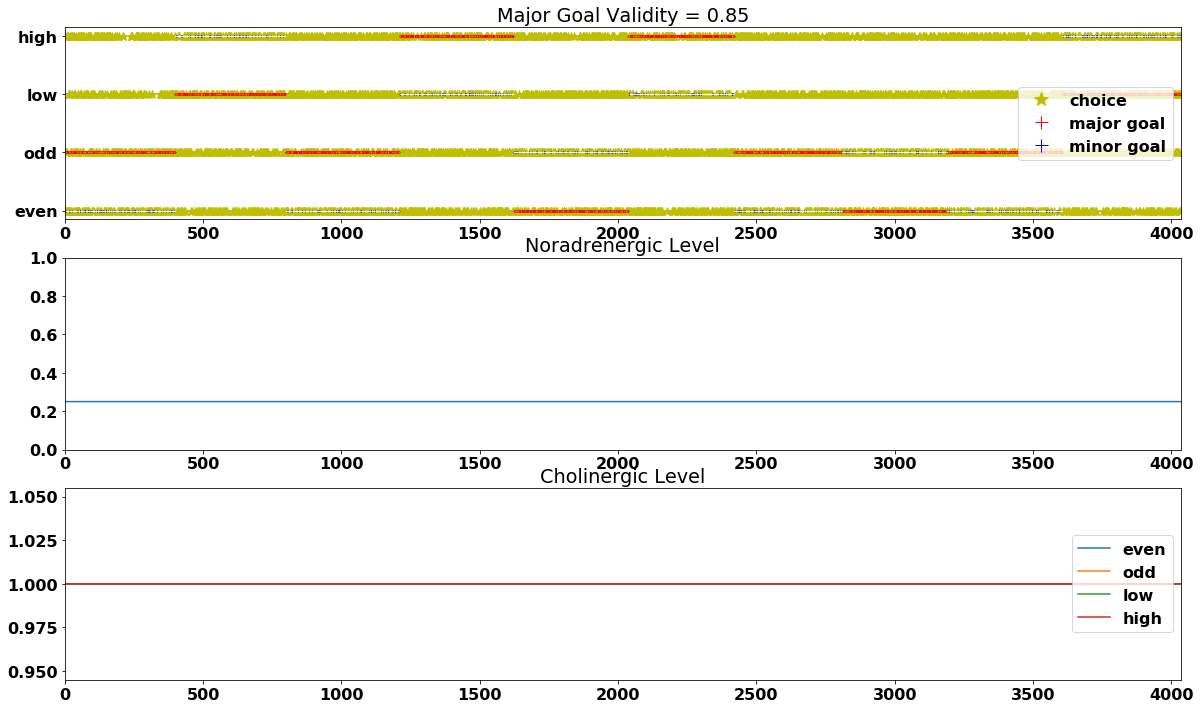

In [62]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_2a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3139/4034 = 77.8% trials occurred when the predicted digit did not match the cued digit.
    417/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3041/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
773/4034 = 19.2% trials occurred when the predicted digit matches the major cued digit and is valid
122/4034 = 3.0% trials occurred when the predicted digit matches the minor cued digit and is valid
155/4034 = 3.8% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

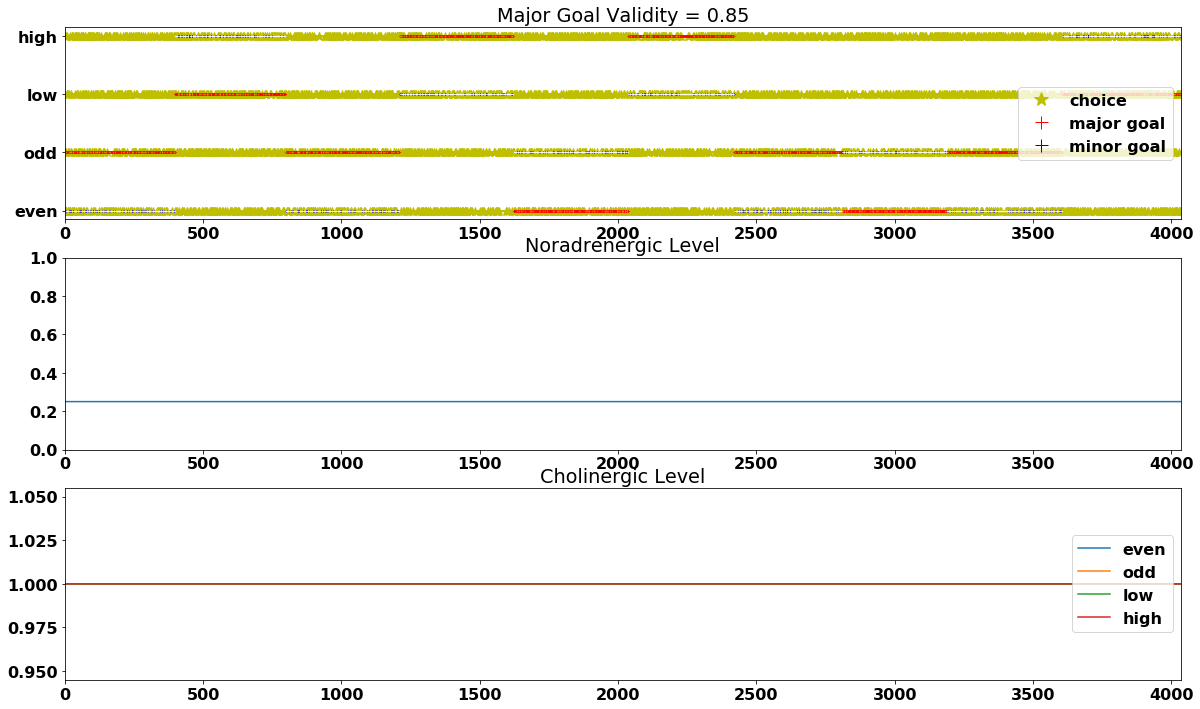

In [63]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_3a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3087/4034 = 76.5% trials occurred when the predicted digit did not match the cued digit.
    373/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2987/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
825/4034 = 20.5% trials occurred when the predicted digit matches the major cued digit and is valid
122/4034 = 3.0% trials occurred when the predicted digit matches the minor cued digit and is valid
114/4034 = 2.8% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

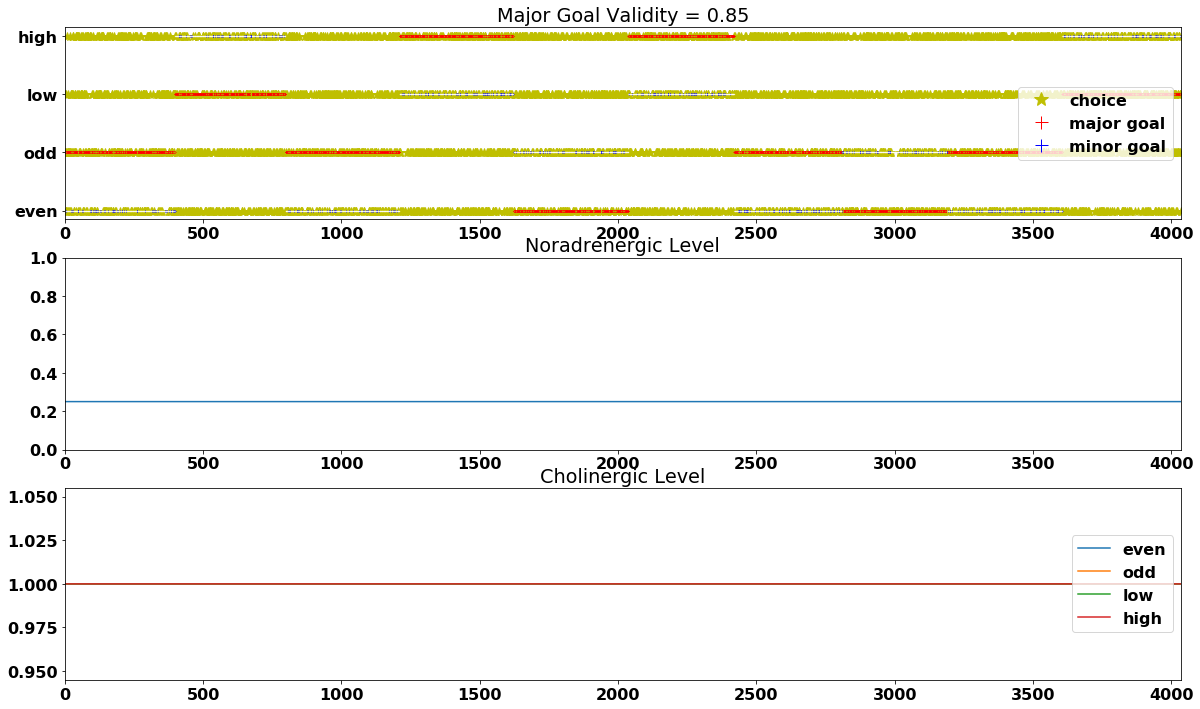

In [64]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_4a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3089/4034 = 76.6% trials occurred when the predicted digit did not match the cued digit.
    398/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2980/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
799/4034 = 19.8% trials occurred when the predicted digit matches the major cued digit and is valid
146/4034 = 3.6% trials occurred when the predicted digit matches the minor cued digit and is valid
160/4034 = 4.0% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

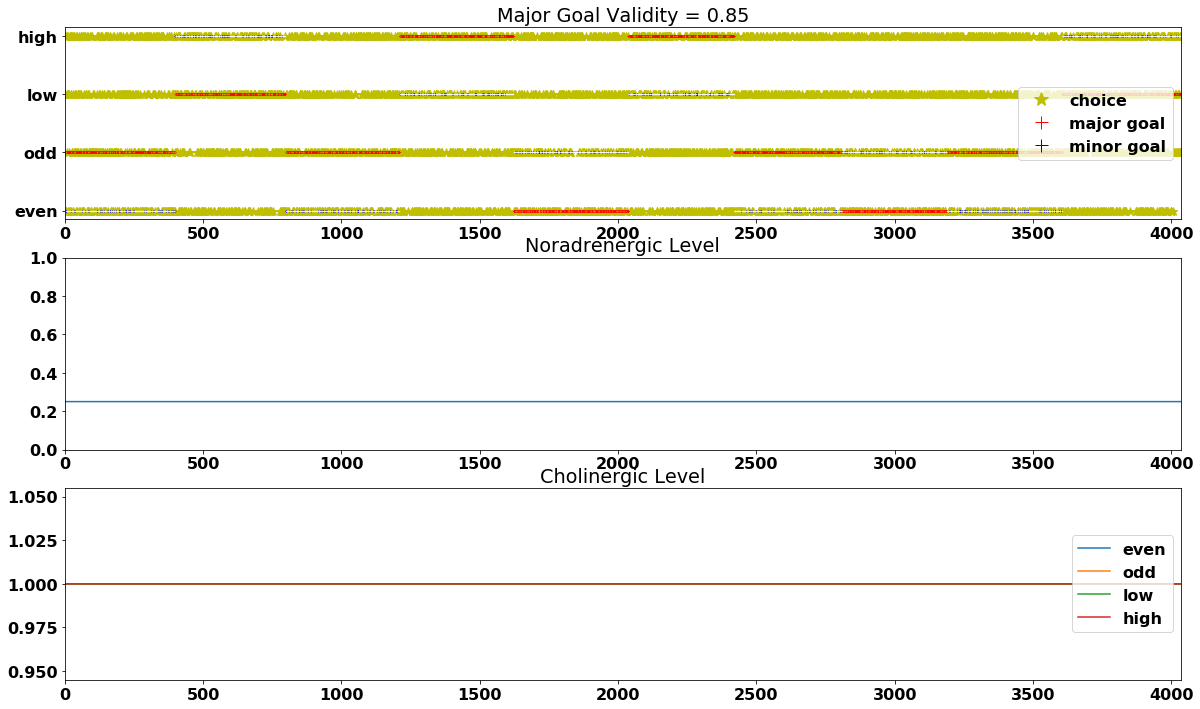

In [65]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_5a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3110/4034 = 77.1% trials occurred when the predicted digit did not match the cued digit.
    330/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3034/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
780/4034 = 19.3% trials occurred when the predicted digit matches the major cued digit and is valid
144/4034 = 3.6% trials occurred when the predicted digit matches the minor cued digit and is valid
128/4034 = 3.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

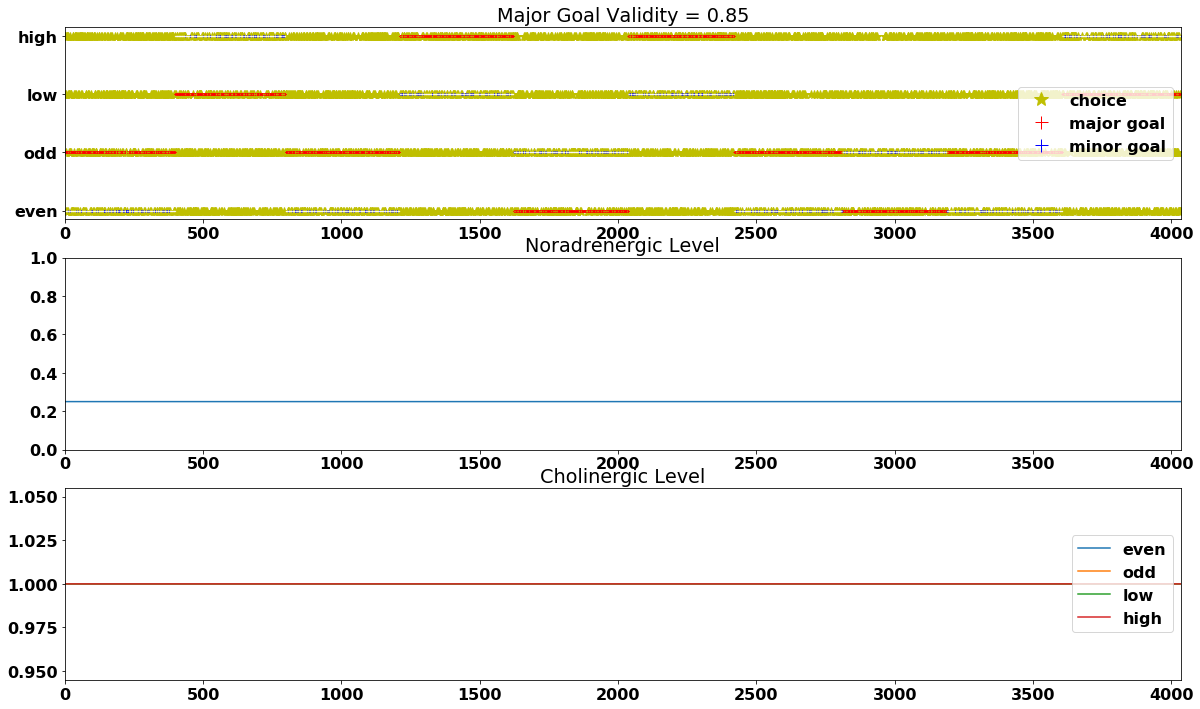

In [66]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_6a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3081/4034 = 76.4% trials occurred when the predicted digit did not match the cued digit.
    340/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3016/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
815/4034 = 20.2% trials occurred when the predicted digit matches the major cued digit and is valid
138/4034 = 3.4% trials occurred when the predicted digit matches the minor cued digit and is valid
127/4034 = 3.1% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

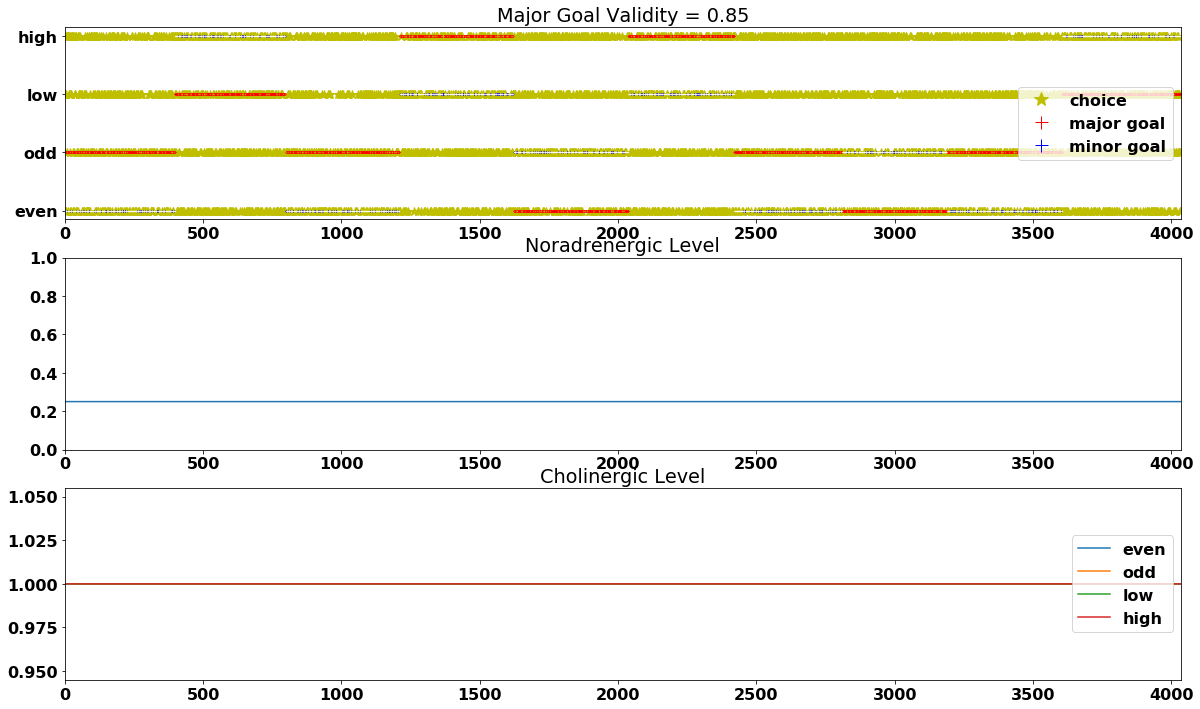

In [67]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_7a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3168/4034 = 78.5% trials occurred when the predicted digit did not match the cued digit.
    360/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3072/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
724/4034 = 17.9% trials occurred when the predicted digit matches the major cued digit and is valid
142/4034 = 3.5% trials occurred when the predicted digit matches the minor cued digit and is valid
140/4034 = 3.5% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

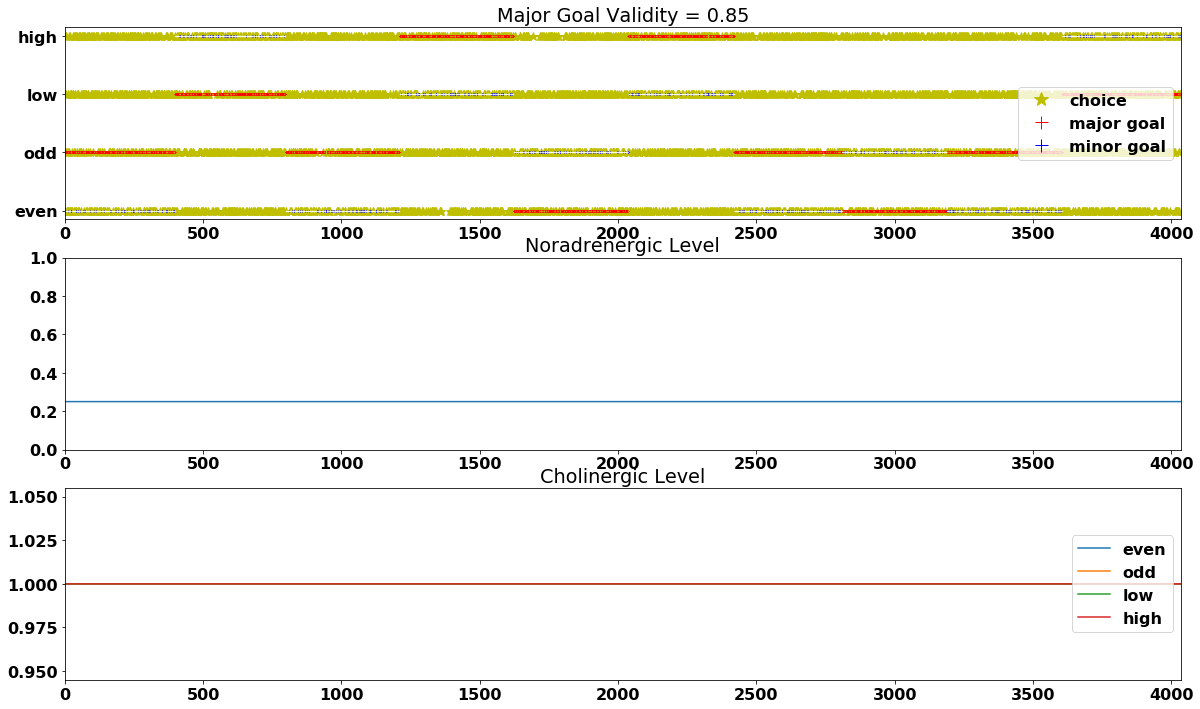

In [68]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_8a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3161/4034 = 78.4% trials occurred when the predicted digit did not match the cued digit.
    370/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3056/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
750/4034 = 18.6% trials occurred when the predicted digit matches the major cued digit and is valid
123/4034 = 3.0% trials occurred when the predicted digit matches the minor cued digit and is valid
131/4034 = 3.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

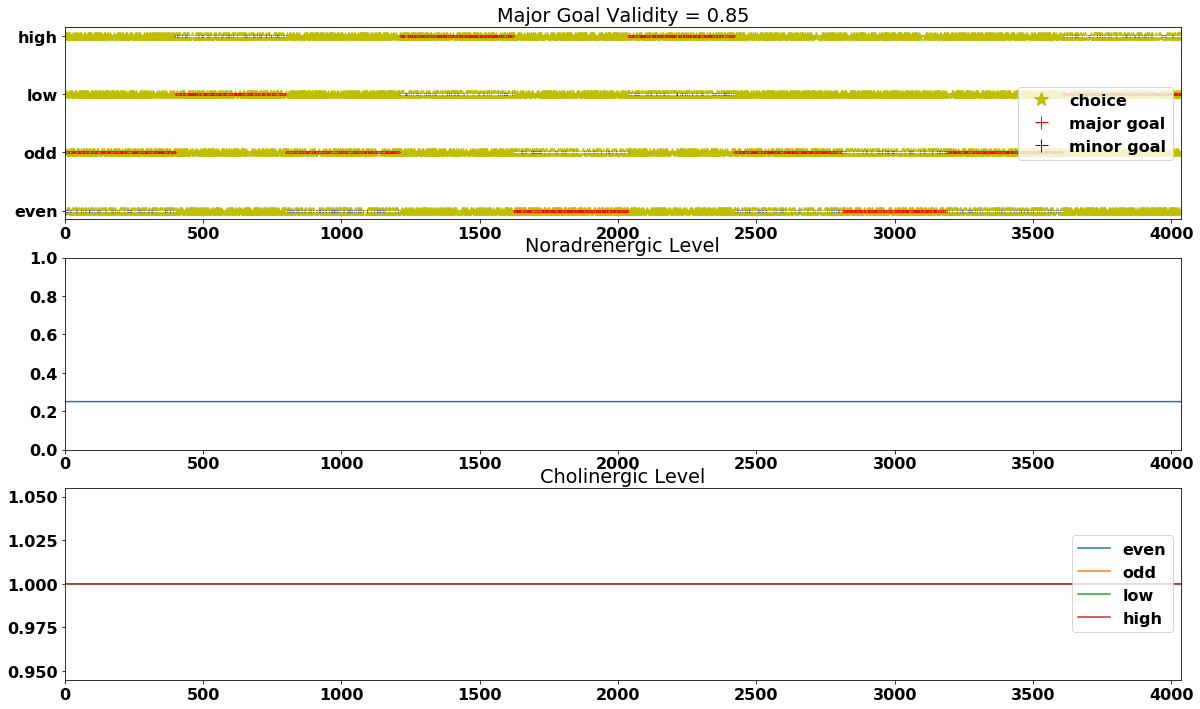

In [69]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_9a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3132/4034 = 77.6% trials occurred when the predicted digit did not match the cued digit.
    372/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3026/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
762/4034 = 18.9% trials occurred when the predicted digit matches the major cued digit and is valid
140/4034 = 3.5% trials occurred when the predicted digit matches the minor cued digit and is valid
131/4034 = 3.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

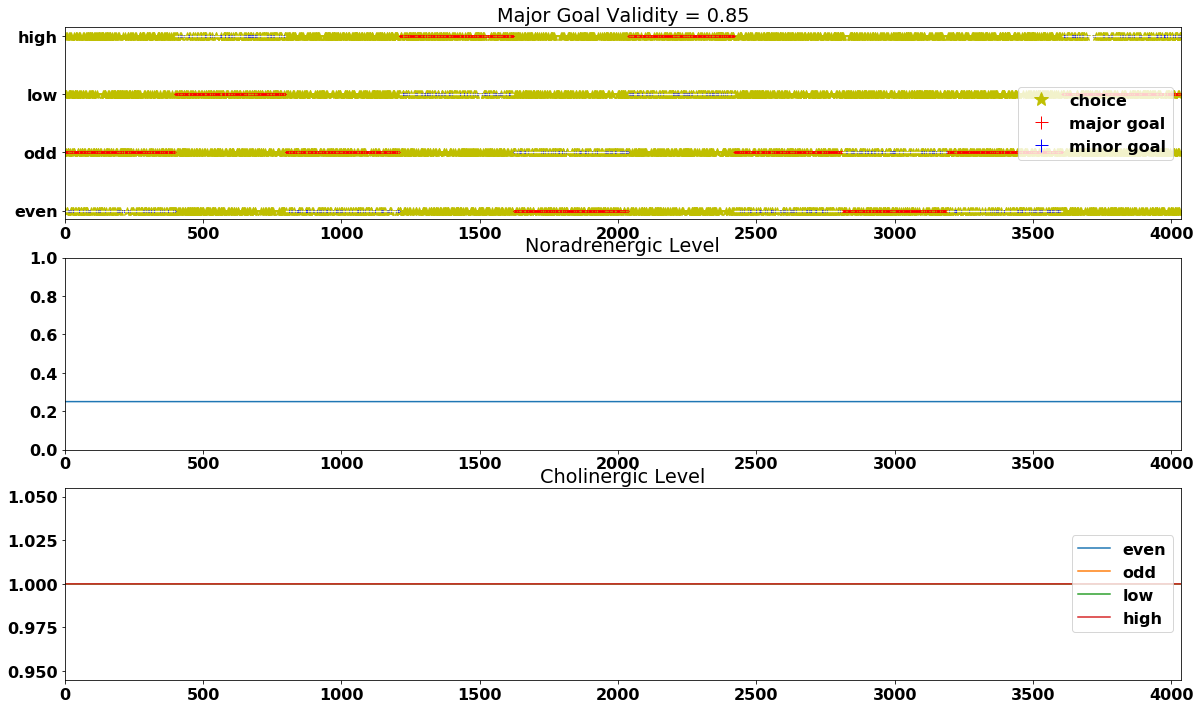

In [70]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_10a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


In [71]:
all_85a_case_probs = [all_prob_85_1a,all_prob_85_2a,all_prob_85_3a,all_prob_85_4a,all_prob_85_5a,\
                      all_prob_85_6a,all_prob_85_7a,all_prob_85_8a,all_prob_85_9a,all_prob_85_10a]
averages_85a = average_probs(all_85a_case_probs)


Average lag length is: 387
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.7723599405057014, 0.19395141298958846, 0.033688646504709964, 0.0, 0.7498512642538424, 0.09110064452156667, 0.03351512146752603]


### 4.2.3: validity_choices=0.7

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3089/4034 = 76.6% trials occurred when the predicted digit did not match the cued digit.
    384/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2988/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
635/4034 = 15.7% trials occurred when the predicted digit matches the major cued digit and is valid
310/4034 = 7.7% trials occurred when the predicted digit matches the minor cued digit and is valid
260/4034 = 6.4% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

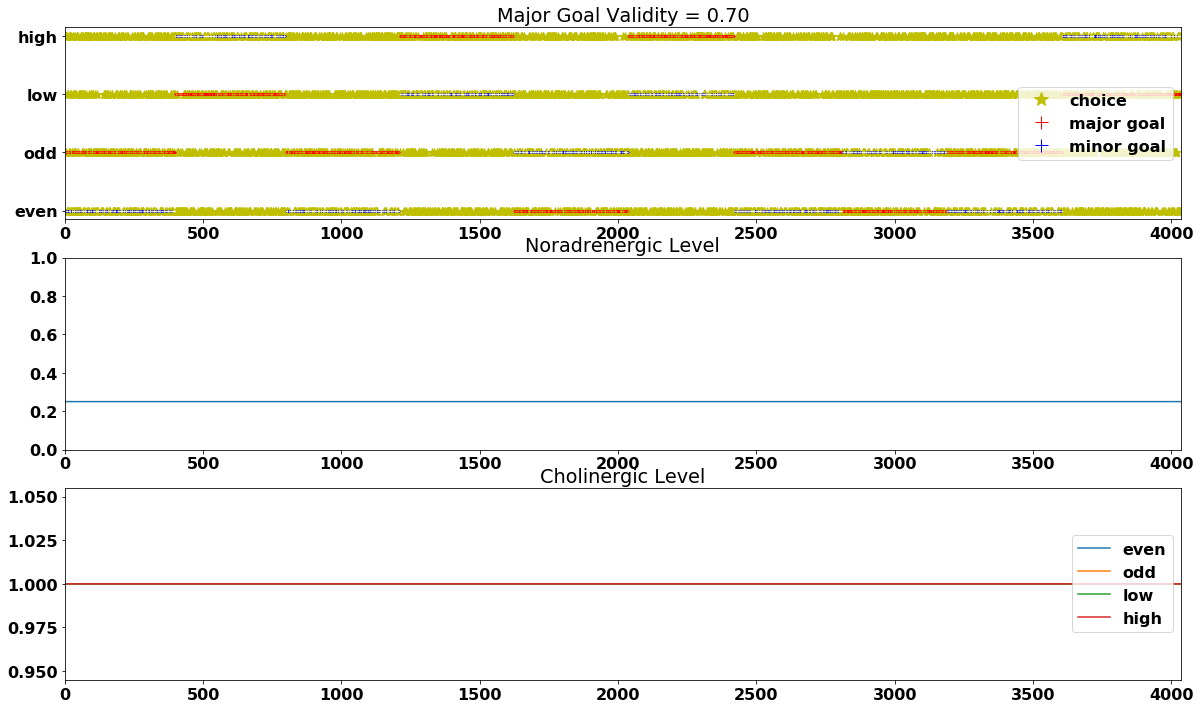

In [72]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_1a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3081/4034 = 76.4% trials occurred when the predicted digit did not match the cued digit.
    361/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2972/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
672/4034 = 16.7% trials occurred when the predicted digit matches the major cued digit and is valid
281/4034 = 7.0% trials occurred when the predicted digit matches the minor cued digit and is valid
279/4034 = 6.9% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

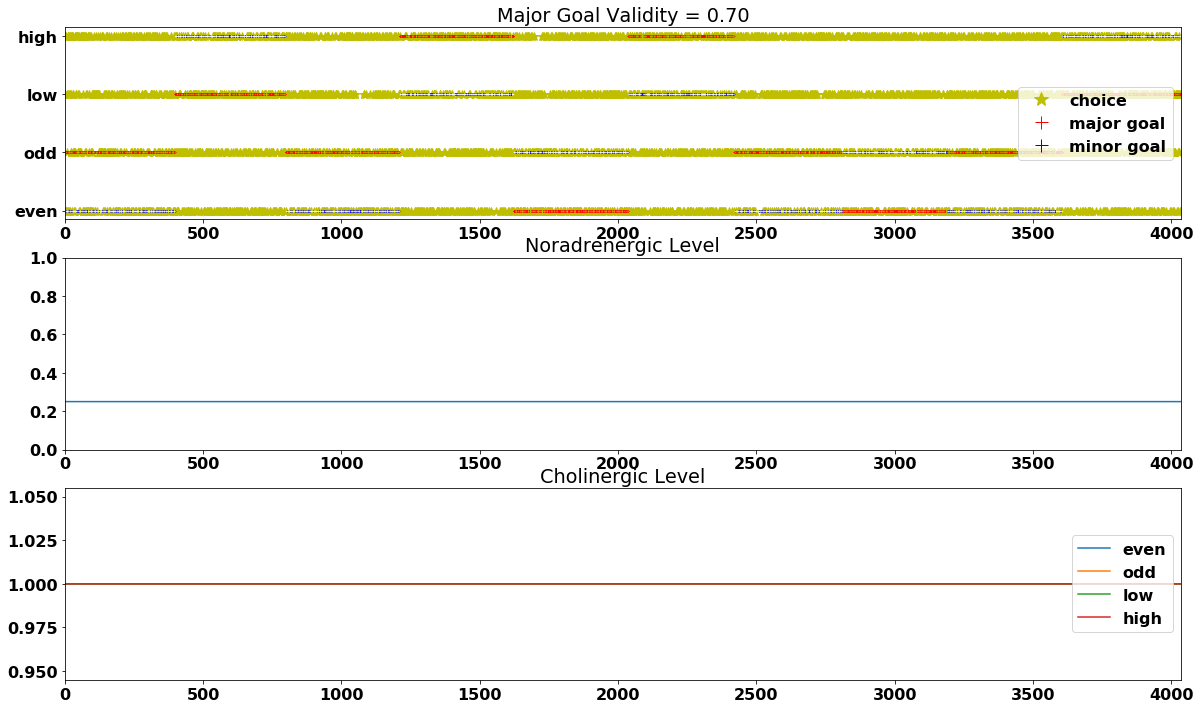

In [73]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_2a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3079/4034 = 76.3% trials occurred when the predicted digit did not match the cued digit.
    343/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2997/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
669/4034 = 16.6% trials occurred when the predicted digit matches the major cued digit and is valid
286/4034 = 7.1% trials occurred when the predicted digit matches the minor cued digit and is valid
286/4034 = 7.1% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

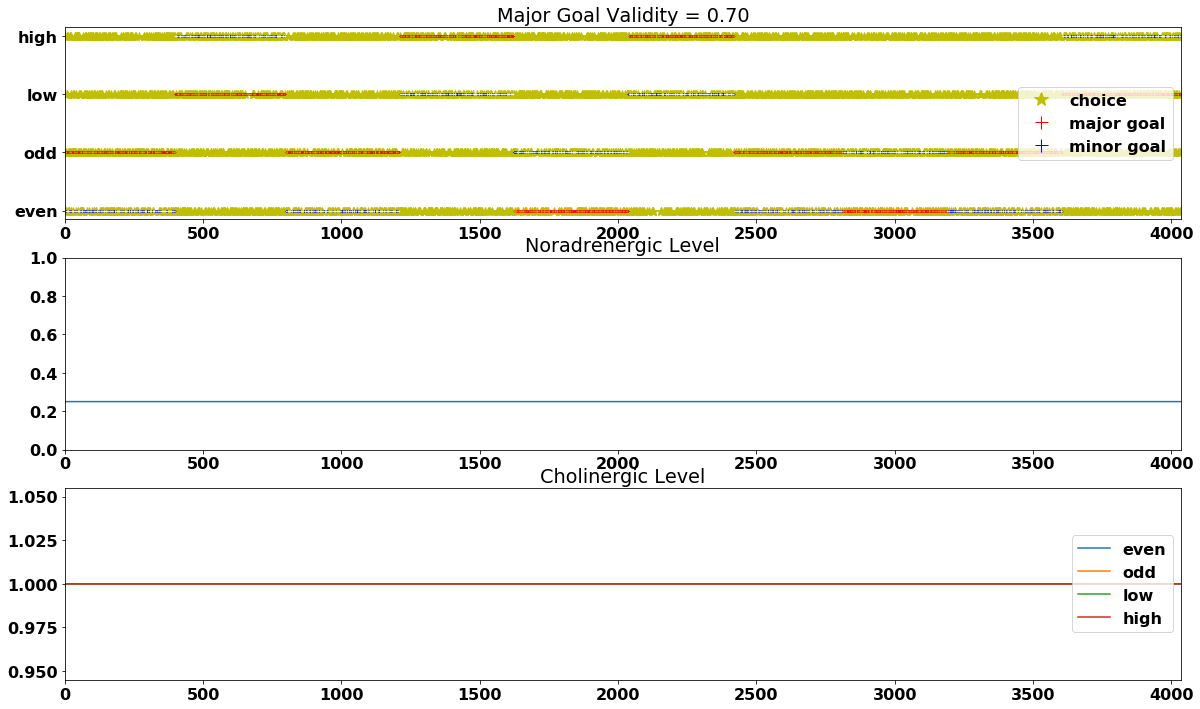

In [74]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_3a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3129/4034 = 77.6% trials occurred when the predicted digit did not match the cued digit.
    361/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3051/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
637/4034 = 15.8% trials occurred when the predicted digit matches the major cued digit and is valid
268/4034 = 6.6% trials occurred when the predicted digit matches the minor cued digit and is valid
263/4034 = 6.5% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

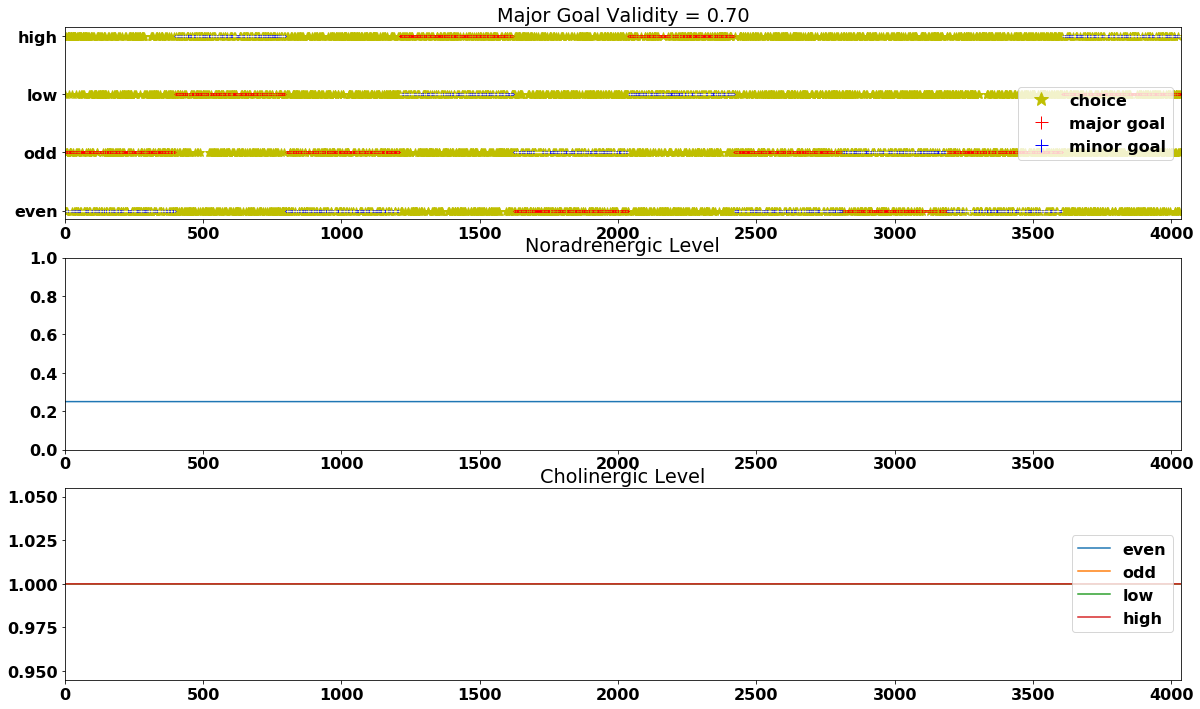

In [75]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_4a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3103/4034 = 76.9% trials occurred when the predicted digit did not match the cued digit.
    342/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3003/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
649/4034 = 16.1% trials occurred when the predicted digit matches the major cued digit and is valid
282/4034 = 7.0% trials occurred when the predicted digit matches the minor cued digit and is valid
276/4034 = 6.8% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

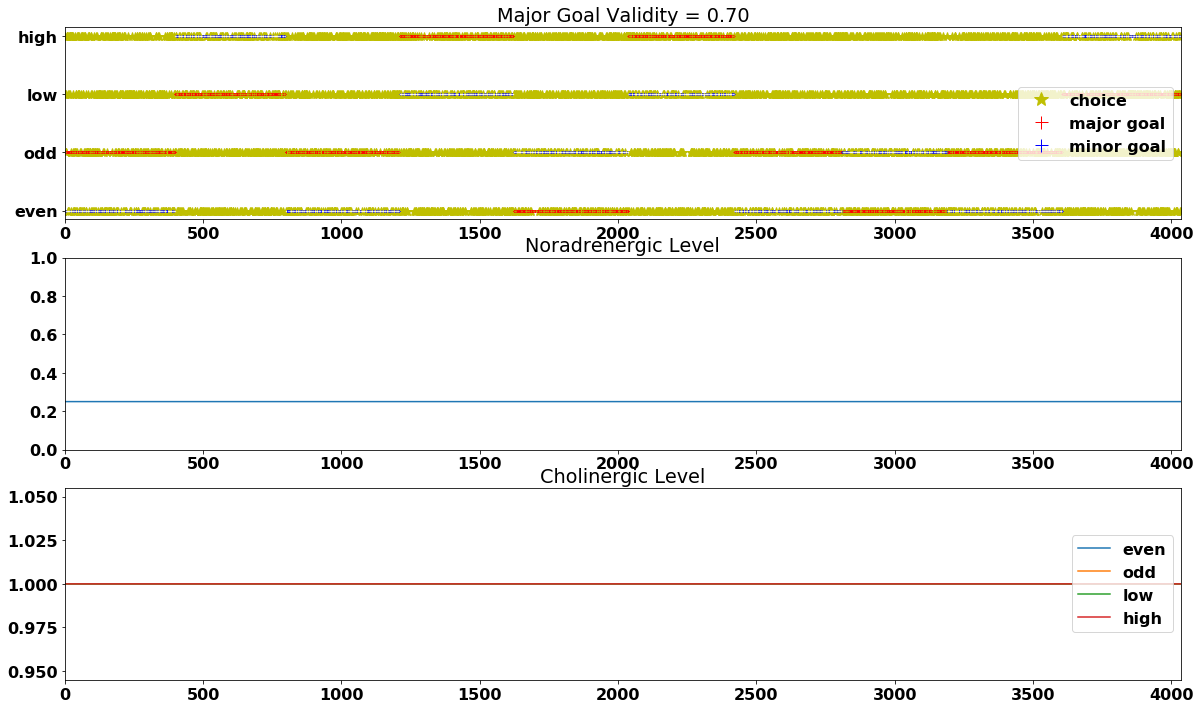

In [76]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_5a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3117/4034 = 77.3% trials occurred when the predicted digit did not match the cued digit.
    356/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3024/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
630/4034 = 15.6% trials occurred when the predicted digit matches the major cued digit and is valid
287/4034 = 7.1% trials occurred when the predicted digit matches the minor cued digit and is valid
285/4034 = 7.1% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

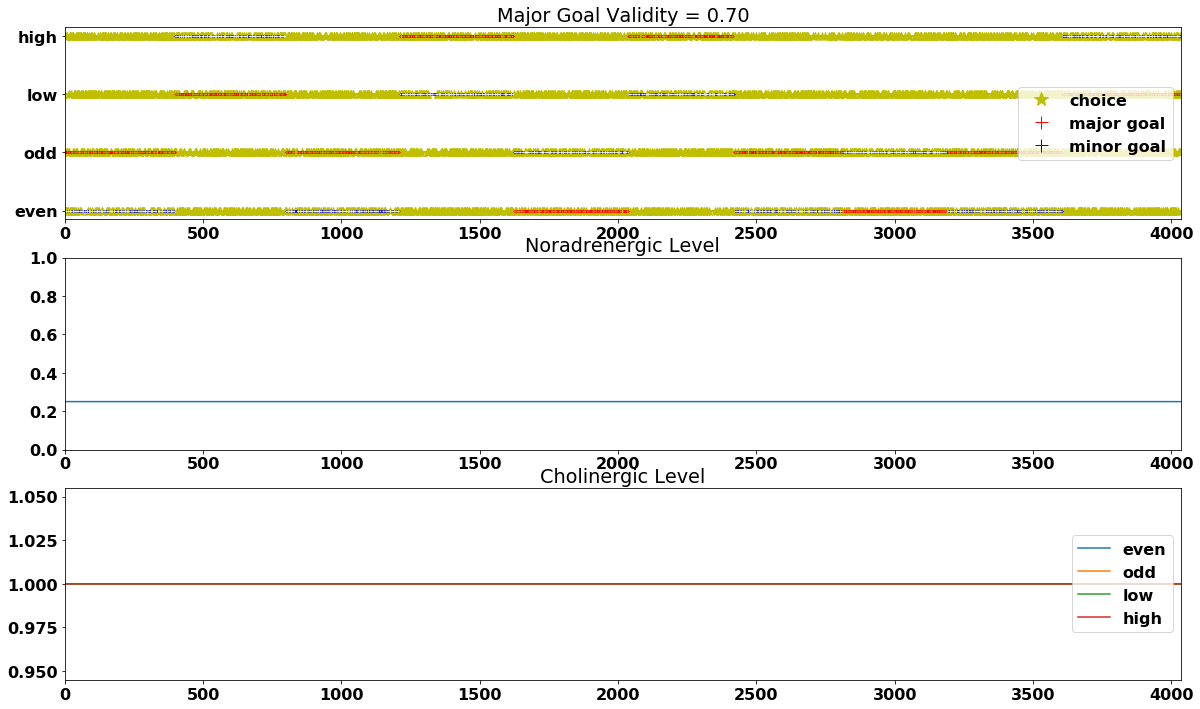

In [77]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_6a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3153/4034 = 78.2% trials occurred when the predicted digit did not match the cued digit.
    377/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3065/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
657/4034 = 16.3% trials occurred when the predicted digit matches the major cued digit and is valid
224/4034 = 5.6% trials occurred when the predicted digit matches the minor cued digit and is valid
279/4034 = 6.9% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

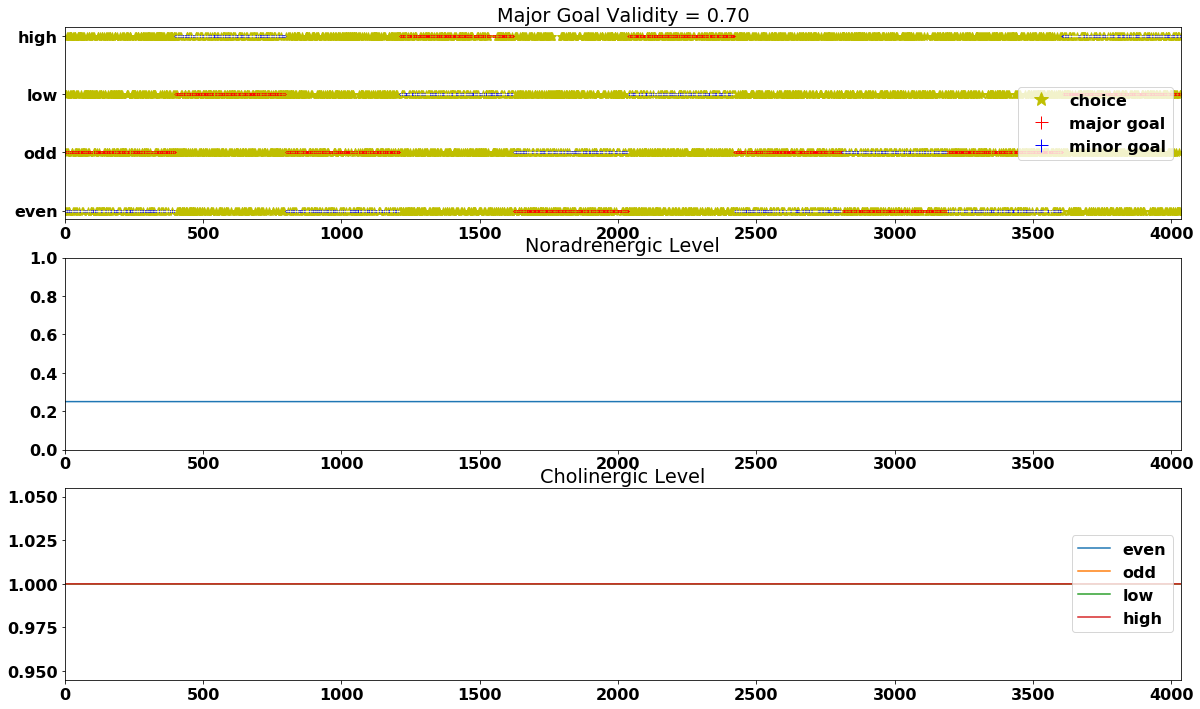

In [78]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_7a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3075/4034 = 76.2% trials occurred when the predicted digit did not match the cued digit.
    397/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2970/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
657/4034 = 16.3% trials occurred when the predicted digit matches the major cued digit and is valid
302/4034 = 7.5% trials occurred when the predicted digit matches the minor cued digit and is valid
234/4034 = 5.8% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

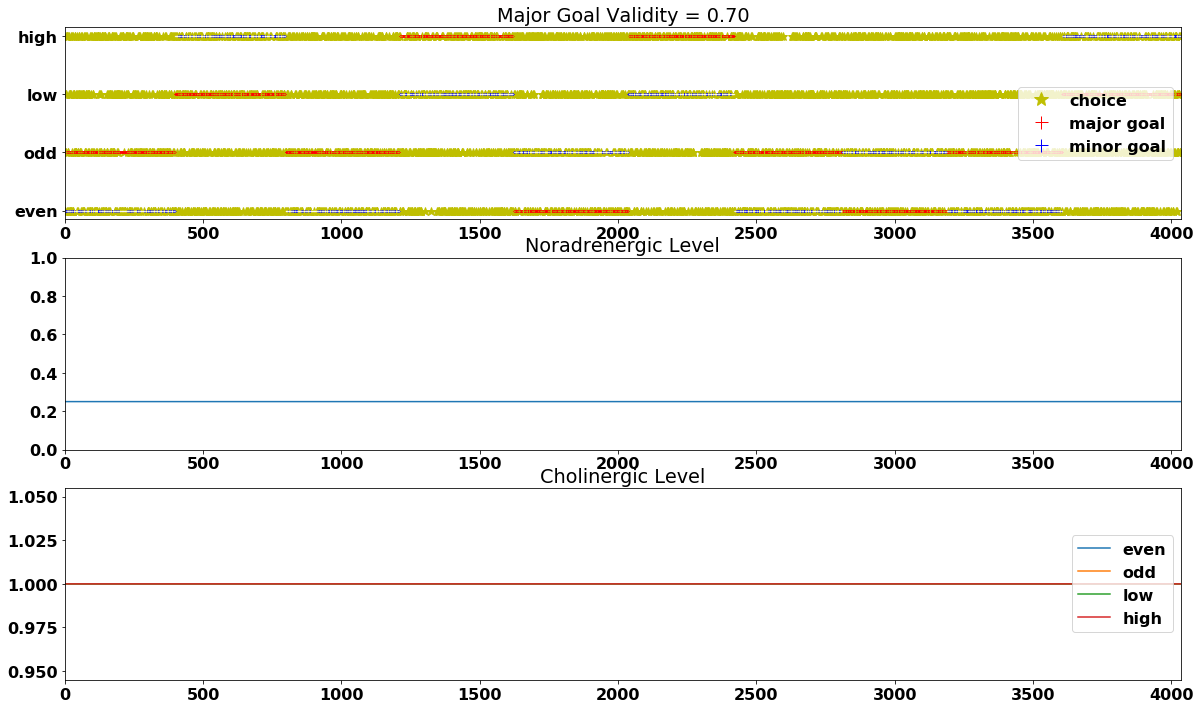

In [79]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_8a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3069/4034 = 76.1% trials occurred when the predicted digit did not match the cued digit.
    369/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2984/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
693/4034 = 17.2% trials occurred when the predicted digit matches the major cued digit and is valid
272/4034 = 6.7% trials occurred when the predicted digit matches the minor cued digit and is valid
260/4034 = 6.4% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

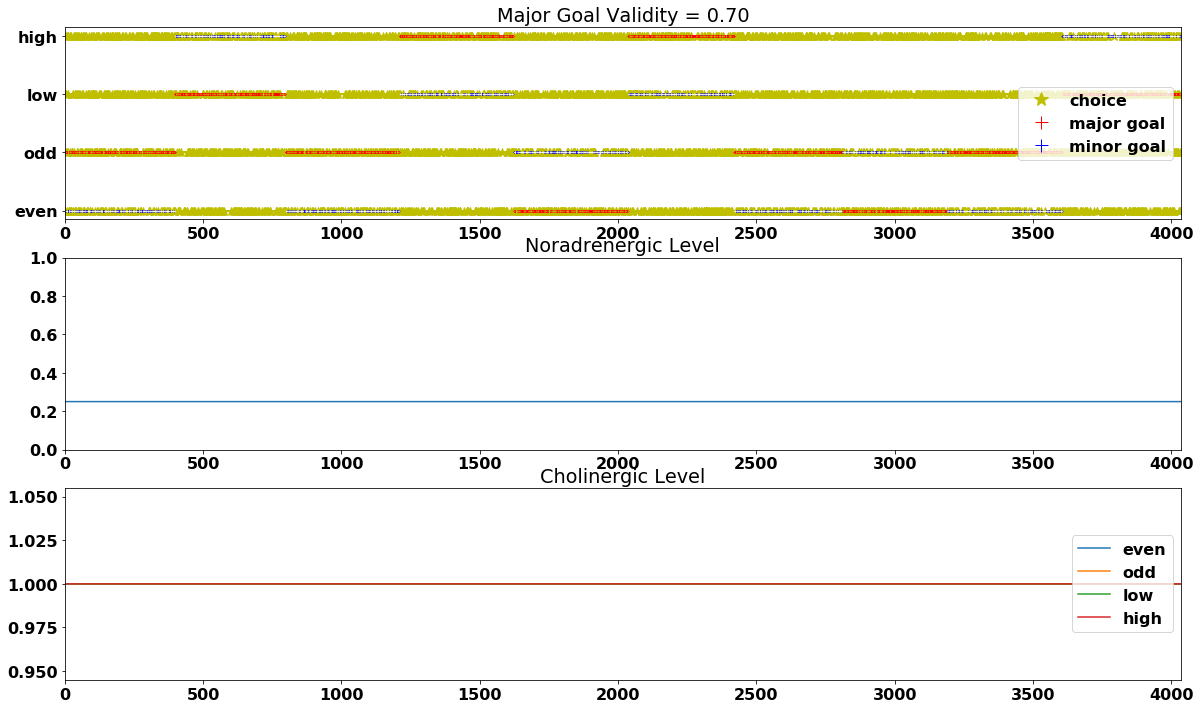

In [80]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_9a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3178/4034 = 78.8% trials occurred when the predicted digit did not match the cued digit.
    357/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3087/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
611/4034 = 15.1% trials occurred when the predicted digit matches the major cued digit and is valid
245/4034 = 6.1% trials occurred when the predicted digit matches the minor cued digit and is valid
274/4034 = 6.8% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

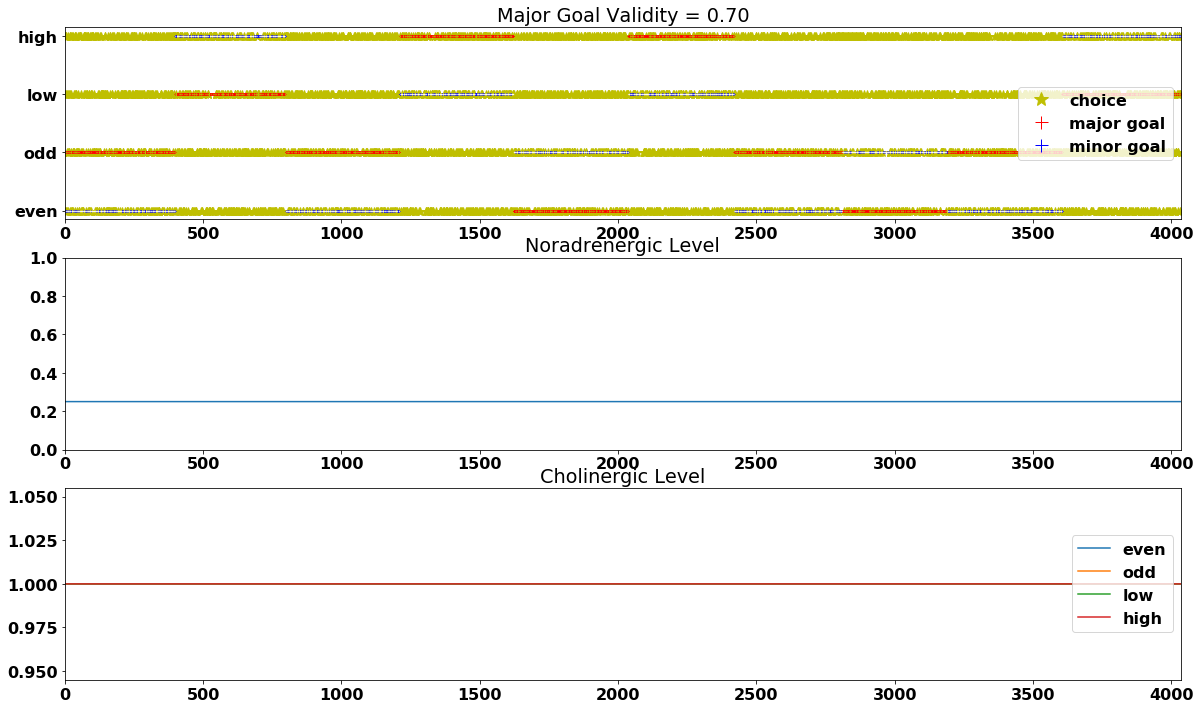

In [81]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_10a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


In [82]:
all_70a_case_probs = [all_prob_70_1a,all_prob_70_2a,all_prob_70_3a,all_prob_70_4a,all_prob_70_5a,\
                      all_prob_70_6a,all_prob_70_7a,all_prob_70_8a,all_prob_70_9a,all_prob_70_10a]
averages_70a = average_probs(all_70a_case_probs)


Average lag length is: 380
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.7702776400594943, 0.161378284581061, 0.06834407535944473, 0.0, 0.7471740208230045, 0.09040654437283094, 0.06683192860684184]


### 4.2.4: validity_choices=[0.99, 0.85, 0.70]

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3156/4034 = 78.2% trials occurred when the predicted digit did not match the cued digit.
    407/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3053/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
729/4034 = 18.1% trials occurred when the predicted digit matches the major cued digit and is valid
149/4034 = 3.7% trials occurred when the predicted digit matches the minor cued digit and is valid
146/4034 = 3.6% trials occurred when the predicted digit matches the major cued digit but is invalidly 

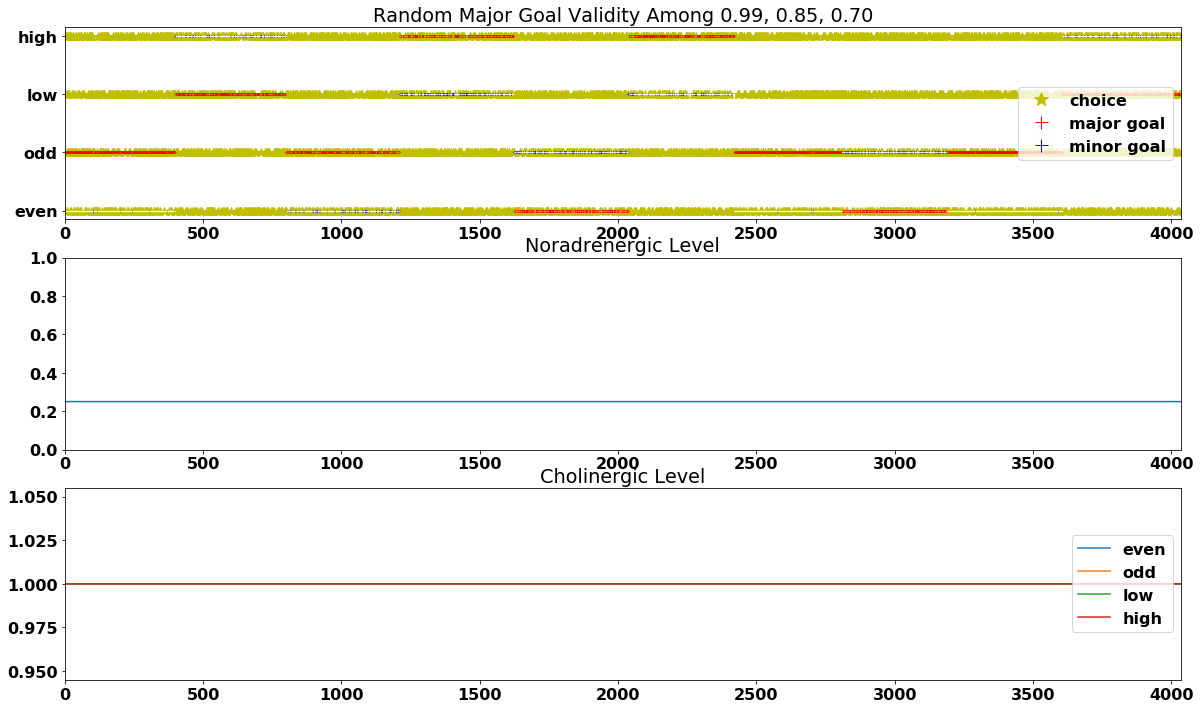

In [83]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3123/4034 = 77.4% trials occurred when the predicted digit did not match the cued digit.
    366/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3030/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
752/4034 = 18.6% trials occurred when the predicted digit matches the major cued digit and is valid
159/4034 = 3.9% trials occurred when the predicted digit matches the minor cued digit and is valid
148/4034 = 3.7% trials occurred when the predicted digit matches the major cued digit but is invalidly 

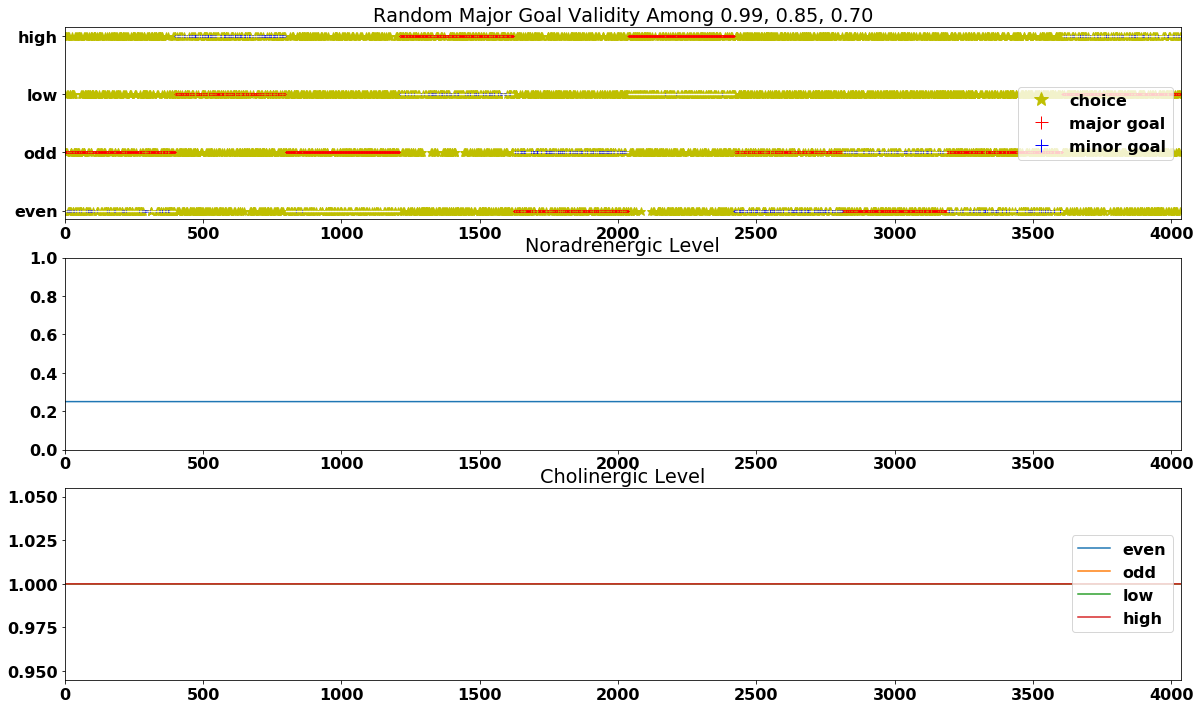

In [84]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3078/4034 = 76.3% trials occurred when the predicted digit did not match the cued digit.
    363/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2966/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
783/4034 = 19.4% trials occurred when the predicted digit matches the major cued digit and is valid
173/4034 = 4.3% trials occurred when the predicted digit matches the minor cued digit and is valid
145/4034 = 3.6% trials occurred when the predicted digit matches the major cued digit but is invalidly 

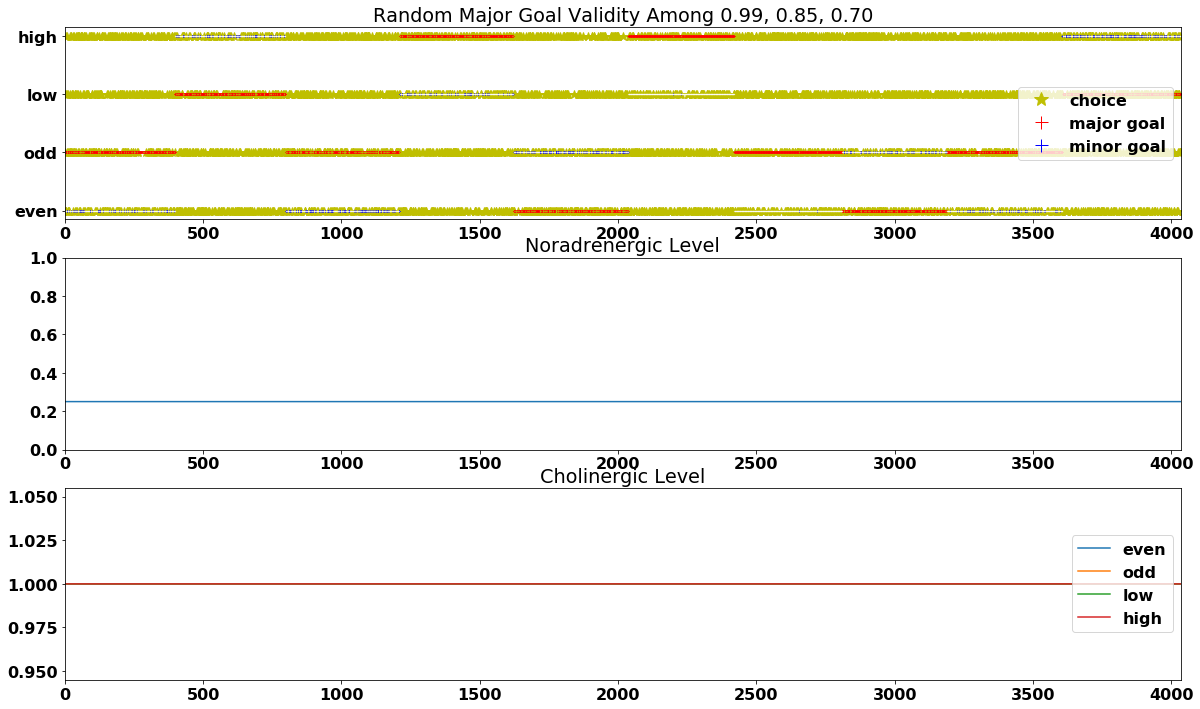

In [85]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3114/4034 = 77.2% trials occurred when the predicted digit did not match the cued digit.
    338/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3022/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
720/4034 = 17.8% trials occurred when the predicted digit matches the major cued digit and is valid
200/4034 = 5.0% trials occurred when the predicted digit matches the minor cued digit and is valid
180/4034 = 4.5% trials occurred when the predicted digit matches the major cued digit but is invalidly 

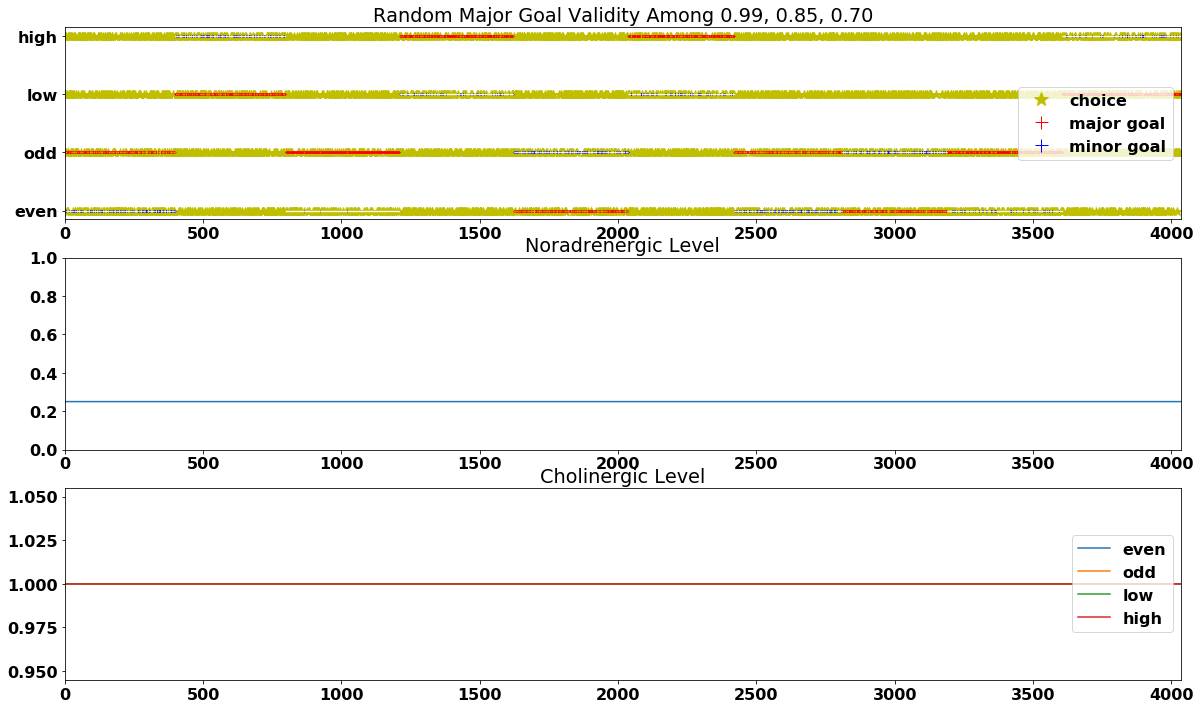

In [86]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3113/4034 = 77.2% trials occurred when the predicted digit did not match the cued digit.
    394/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3031/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
797/4034 = 19.8% trials occurred when the predicted digit matches the major cued digit and is valid
124/4034 = 3.1% trials occurred when the predicted digit matches the minor cued digit and is valid
112/4034 = 2.8% trials occurred when the predicted digit matches the major cued digit but is invalidly 

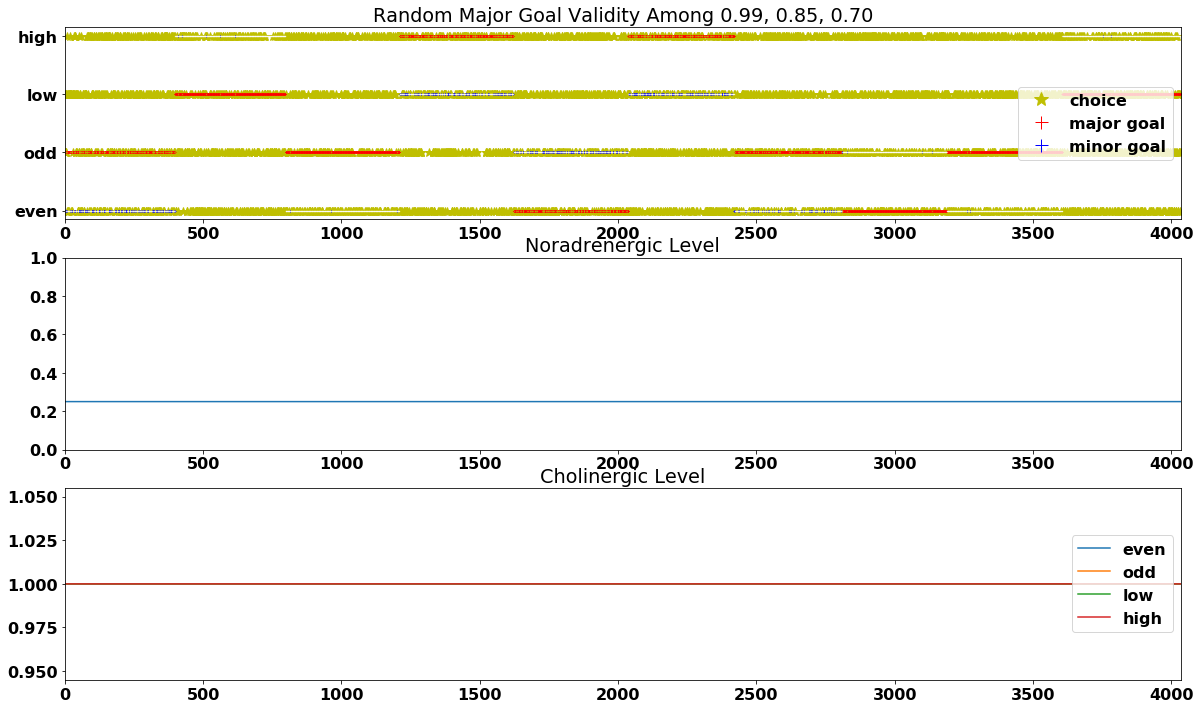

In [87]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3143/4034 = 77.9% trials occurred when the predicted digit did not match the cued digit.
    361/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3058/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
767/4034 = 19.0% trials occurred when the predicted digit matches the major cued digit and is valid
124/4034 = 3.1% trials occurred when the predicted digit matches the minor cued digit and is valid
99/4034 = 2.5% trials occurred when the predicted digit matches the major cued digit but is invalidly a

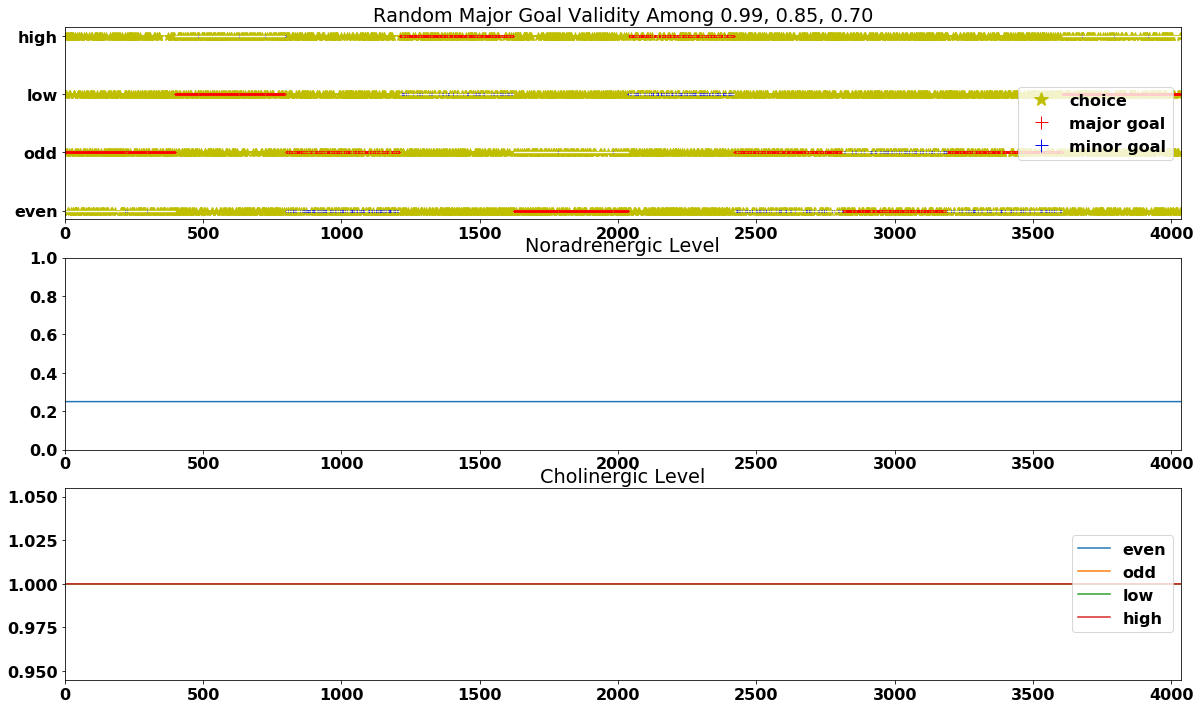

In [88]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3151/4034 = 78.1% trials occurred when the predicted digit did not match the cued digit.
    368/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3057/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
762/4034 = 18.9% trials occurred when the predicted digit matches the major cued digit and is valid
121/4034 = 3.0% trials occurred when the predicted digit matches the minor cued digit and is valid
131/4034 = 3.2% trials occurred when the predicted digit matches the major cued digit but is invalidly 

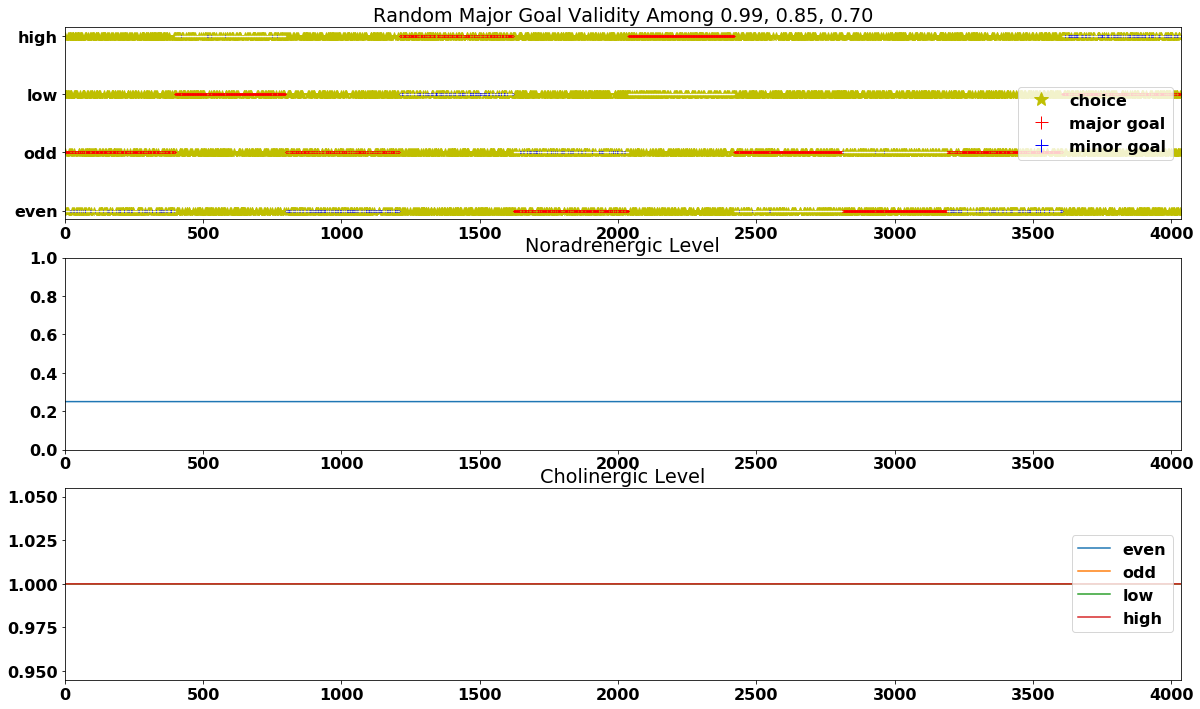

In [89]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3106/4034 = 77.0% trials occurred when the predicted digit did not match the cued digit.
    347/4034 trials occurred when the predicted digit did not match the guess-target digit.
    3030/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
831/4034 = 20.6% trials occurred when the predicted digit matches the major cued digit and is valid
97/4034 = 2.4% trials occurred when the predicted digit matches the minor cued digit and is valid
93/4034 = 2.3% trials occurred when the predicted digit matches the major cued digit but is invalidly al

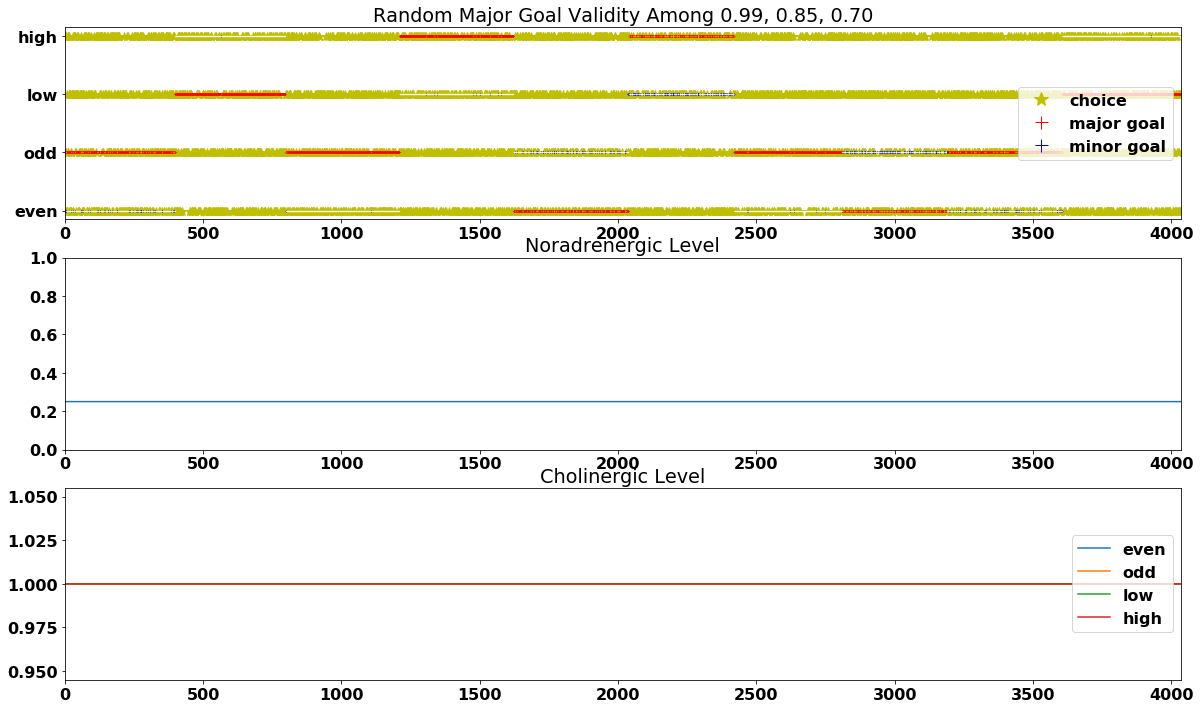

In [90]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3060/4034 = 75.9% trials occurred when the predicted digit did not match the cued digit.
    361/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2977/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
751/4034 = 18.6% trials occurred when the predicted digit matches the major cued digit and is valid
223/4034 = 5.5% trials occurred when the predicted digit matches the minor cued digit and is valid
181/4034 = 4.5% trials occurred when the predicted digit matches the major cued digit but is invalidly 

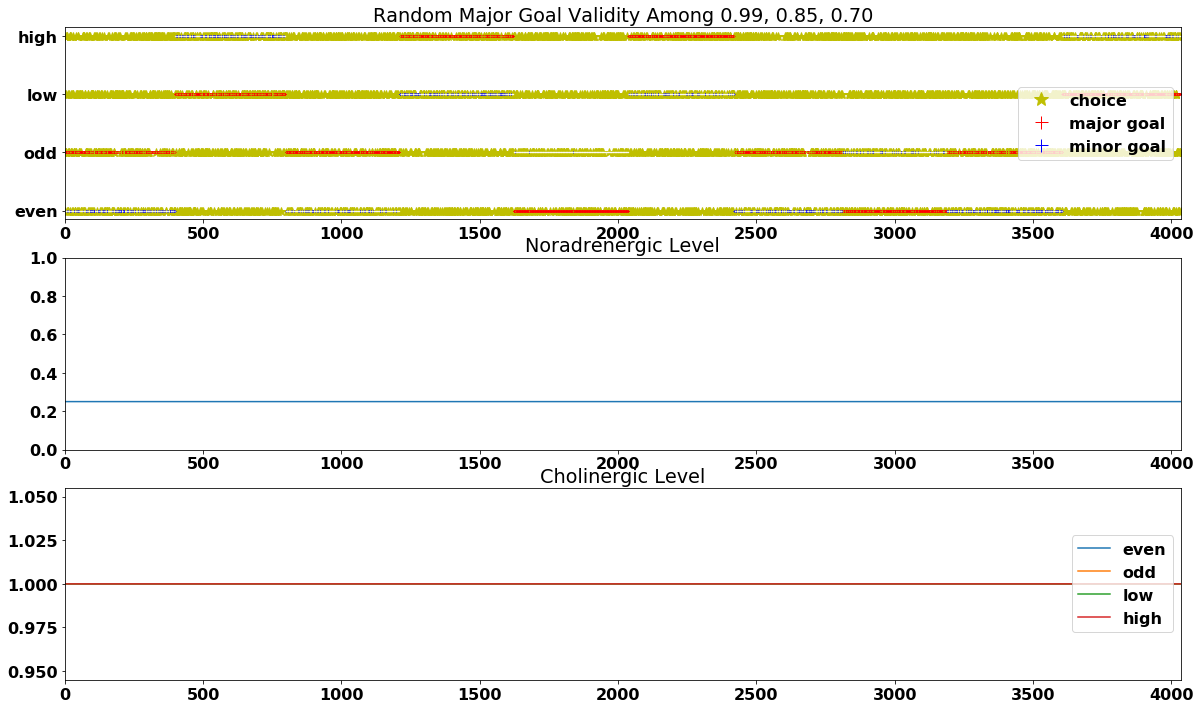

In [91]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4034 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
3093/4034 = 76.7% trials occurred when the predicted digit did not match the cued digit.
    371/4034 trials occurred when the predicted digit did not match the guess-target digit.
    2994/4034 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
878/4034 = 21.8% trials occurred when the predicted digit matches the major cued digit and is valid
63/4034 = 1.6% trials occurred when the predicted digit matches the minor cued digit and is valid
67/4034 = 1.7% trials occurred when the predicted digit matches the major cued digit but is invalidly al

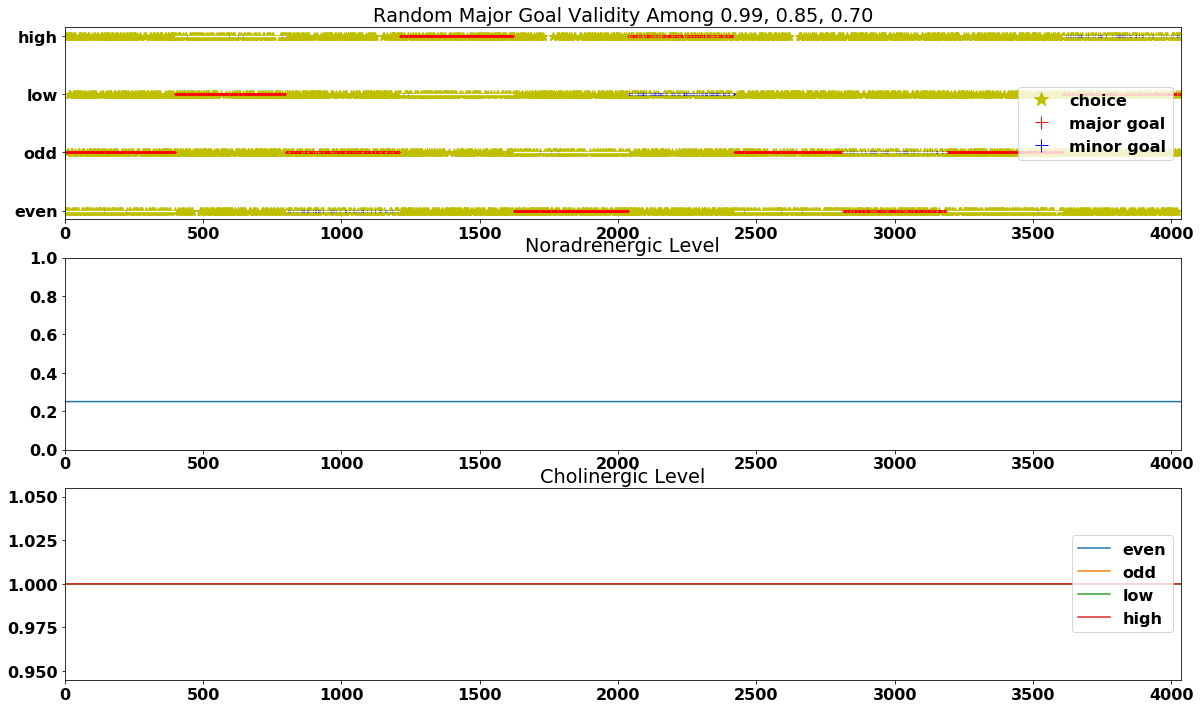

In [92]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


In [93]:
all_multia_case_probs = [all_prob_multia_1,all_prob_multia_2,all_prob_multia_3,all_prob_multia_4,all_prob_multia_5,\
                         all_prob_multia_6,all_prob_multia_7,all_prob_multia_8,all_prob_multia_9,all_prob_multia_10]
averages_multia = average_probs(all_multia_case_probs)


Average lag length is: 386
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.7718641546851759, 0.19261279127416955, 0.035523054040654437, 0.0, 0.7490827962320278, 0.09112543381259296, 0.032275656916212196]


plt.plot(np.arange(len(choice)),choice,'y*',markersize=9) #'y*',markersize=8
    plt.plot(ind_cue1,correct[ind_cue1],'r+',markersize=2) #'r+',markersize=1
    plt.plot(ind_cue2,correct[ind_cue2],'b+',markersize=2) #'b+',markersize=3
    if alterValid:
        alter = np.array([crt+1 if crt%2==0 else crt-1 for crt in correct.tolist()])
        plt.plot(ind_cue1,alter[ind_cue1],'w.',markersize=0.5)#1
        plt.plot(ind_cue2,alter[ind_cue2],'y.',markersize=0.5)#1
    plt.xlim(0,len(correct))